<a href="https://colab.research.google.com/github/D-US/portfolio/blob/master/final_ReportTemplate_19_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1: Domkap Njomou Ulrich - __[ulrich.domkap.njomou@ulb.be](mailto:ulrich.domkap.njomou@ulb.ac.be) - Student ID 000534415__
### Student 2: Fabrizio Carlo - __[carlo.fabrizio@ulb.be](mailto:carlo.fabrizio@ulb.be) - Student ID 000554019__
### Student 3: KOUKPAKI Ferdinand - __[ferdinand.koukpaki@ulb.be](mailto:ferdinand.koukpaki@ulb.be) - Student ID 000516264__

### Video presentation: https://youtu.be/bWcq36AgV3k

## Team name: **INFO_STAT_2022_2FS**


# Introduction


---
In the course of INFO-F-422 - Statistical foundations of machine learning, students are obliged to work on a project given by the lecturer. For the session of 2022, the project is: <a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/"> "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines" </a>

For this project, a set of questions have been proposed by the lecturer that we as student should answer.
To do so, we use our couse notes, lab sessions notes and some research in order to provide some good answer to the different questions.

On this project, we are going to use many different model to answer the problem of prediction of this multilabel question(label 1 = H1N1 VACCINE, label 2 = SEASONAL VACCINE).

As for the different models for this project, we worked with the following model:
* 1- Random Forest (section 5.1)
* 2- Neural Networks - (NN) (section 5.2)
* 3- Decision Trees (section 5.3)
* 4- Support Vector Machine - (SVM) (section 5.4)
* 5- Multilayer perceptron - (MLP)  (section 5.5)

(Other model)
* 6- Neural Network + PCA (Principal Components Analysis)(section 6.1)



*NB*:

In addition, we have well defined our table of contents to ease the navigation to the different section of the nootebook. We do recommend to run every cell gradually to avoid any error.

---

In [ ]:
#multi-class labele

#  1  Import packages 

In [ ]:
#do not forget to download ans upload the dummies_1.5.6.tar.gz available at https://cran.r-project.org/src/contrib/Archive/dummies/
#install.packages("/content/dummies_1.5.6.tar.gz", repos=NULL, type="source")

#install.packages("dummies")
install.packages("/content/dummies_1.5.6.tar.gz", repos=NULL, type="source")
library(dummies)
# Installing package
install.packages("caTools")	 # For sampling the dataset
install.packages("randomForest") # For implementing random forest algorithm
library("randomForest")
install.packages("Hmisc")
install.packages("nnet")
library("nnet")
library("Hmisc")
library(ggplot2)
install.packages("lattice")
library(lattice)
install.packages("caTools")
library(caTools)
install.packages("ROCR") #dealing with ROC curve
library(ROCR)
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummies-1.5.6 provided by Decision Patterns


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘Hmisc’


The f

In [ ]:
#for missing value imputation

install.packages("mice")

#install.packages("VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
install.packages("GGally")

install.packages("caret")	

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




#  2  Import data 

In [ ]:
set.seed(2)
library(readr) 

df_train_features<-read.csv('training_set_features.csv',stringsAsFactors = T)

df_train_labels<-read.csv('training_set_labels.csv',stringsAsFactors = T)

df_test_features<-read.csv('test_set_features.csv',stringsAsFactors = T)


### 2.1  View the csv data on a table form format 

In [ ]:
# View the first 2 row of the training dataset

head(df_train_features, 2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,0,1,0,0,0,0,0,0,1,1,⋯,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,
2,1,3,2,0,1,0,1,0,1,1,⋯,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe


In [ ]:
# Look at the dimension(size and length) of the data set. In fact we have 26707 row and 36 columns for the features data

dim(df_train_features)

[1] 26707    36

In [ ]:
# View the first 2 rows of the testing dataset

head(df_test_features, 2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,26707,2,2,0,1,0,1,1,0,1,⋯,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1,0,atmlpfrs,hfxkjkmi
2,26708,1,1,0,0,0,0,0,0,0,⋯,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3,0,atmlpfrs,xqwwgdyp


In [ ]:
# Look at the dimension(size and length) of the data set. In fact we have 26708 row and 36 columns for the features data

dim(df_test_features)

[1] 26708    36

In [ ]:
# Look at the two first rows of the   training dataset of the multi-lbel label

head(df_train_labels,2)

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<int>,<int>
1,0,0,0
2,1,0,1


In [ ]:
# Look at the dimension(size and length) of the data set. In fact we have 26707 row and 3 columns for the features data

dim(df_train_labels)

[1] 26707     3

In [ ]:
str(df_train_features)

'data.frame':	26707 obs. of  36 variables:
 $ respondent_id              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ h1n1_concern               : int  1 3 1 1 2 3 0 1 0 2 ...
 $ h1n1_knowledge             : int  0 2 1 1 1 1 0 0 2 1 ...
 $ behavioral_antiviral_meds  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_avoidance       : int  0 1 1 1 1 1 0 1 1 1 ...
 $ behavioral_face_mask       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ behavioral_wash_hands      : int  0 1 0 1 1 1 0 1 1 0 ...
 $ behavioral_large_gatherings: int  0 0 0 1 1 0 0 0 1 1 ...
 $ behavioral_outside_home    : int  1 1 0 0 0 0 0 0 1 0 ...
 $ behavioral_touch_face      : int  1 1 0 0 1 1 0 1 1 1 ...
 $ doctor_recc_h1n1           : int  0 0 NA 0 0 0 0 1 0 0 ...
 $ doctor_recc_seasonal       : int  0 0 NA 1 0 1 0 0 0 0 ...
 $ chronic_med_condition      : int  0 0 1 1 0 0 0 1 0 1 ...
 $ child_under_6_months       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ health_worker              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ health_insurance           : int  1 1

### 2.2 Assess the balance of the output

#### 2.2.1 h1n1

As we can see from the histogram below of the output h1n1_vaccine, the h1n1_vaccine problem is ***pretty unbalanced*** with more than ***78% of people who did not take the h1n1_vaccine***

In [ ]:
table(df_train_labels[,2])


    0     1 
21033  5674 

In [ ]:
# Checking the percentage of people who have taken or not the h1n1 vaccine

100* (table(df_train_labels[,2]) /length(df_train_labels[,2]))


       0        1 
78.75463 21.24537 

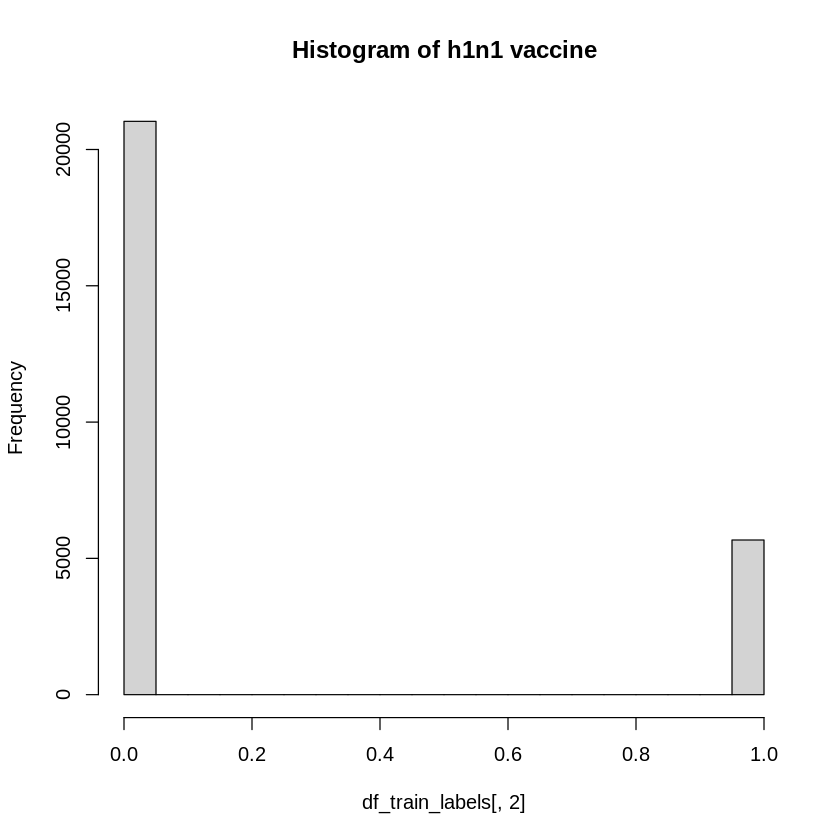

In [ ]:
hist(df_train_labels[,2],main=paste("Histogram of h1n1 vaccine")) 

#### 2.2.2 Seasonal

The seasonal vaccine problem instead, is ***quite balanced***. Here we have quite a nice distribution of value with 53.4% for non seasonal vaccinated person and 46.5% of seasonal vaccinated person

In [ ]:
table(df_train_labels[,3])


    0     1 
14272 12435 

In [ ]:
# Checking the percentage of people who have taken or not the seasonal vaccine

100* (table(df_train_labels[,3]) /length(df_train_labels[,3]))


       0        1 
53.43917 46.56083 

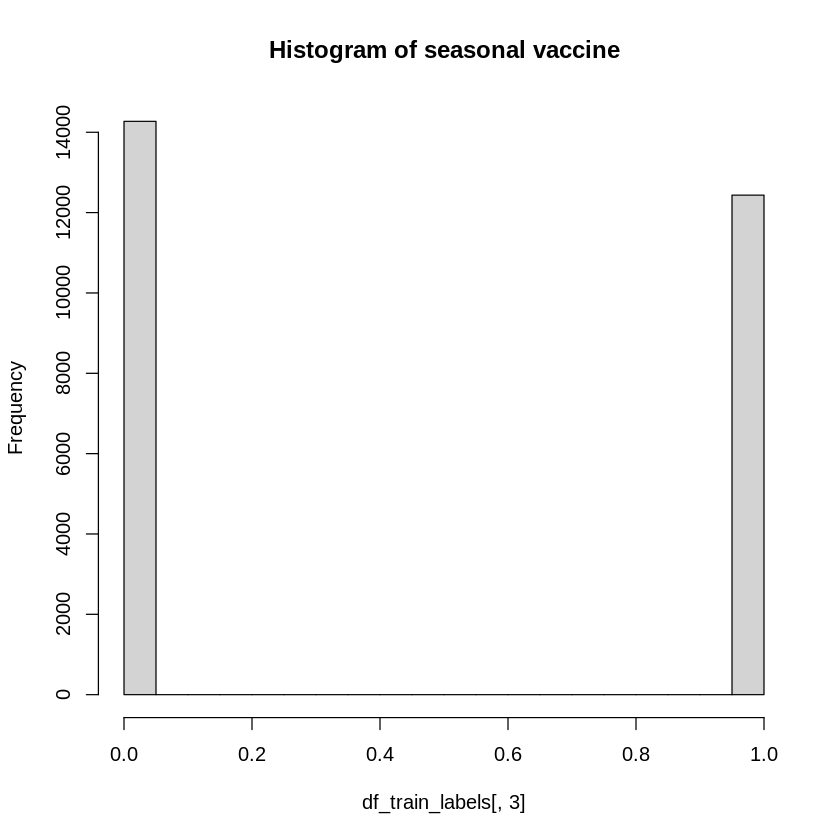

In [ ]:
hist(df_train_labels[,3],main=paste("Histogram of seasonal vaccine"))

#  3.Data preprocessing

- Categorical variables treatment.

For each categorical variable we computed the number of different values it could assume. We have found that "employment_industry" and "employment_industry" have a huge set of different values so we could have decided to delete them in order to speed up the computation. However, we decided to keep all the provided information, with the aim of increasing the accuracy of the models.

- Different datasets.

We decided to create 2 different datasets to better fit the original dataset to different model types.

   1. Everything one-hot encoded. (<font color="green">Fully-encoded Dataset </font>)</br>
         We noticed that a lot of numerical variables were just an integer              encoding of a categorical variable. We decided to one-hot encode                everything in order to encode categorical variables and to delete              the effect of the integer encoding we mention above.
         To fit to NN and linear model
         
   2.  Using the MICE packages to deal with missing values(<font color="green">MICE-dataset</font>)
    ( https://cran.r-project.org/web/packages/mice/mice.pdf or https://amices.org/mice/ )</br>
    This packages will deal with empty numerical and categorical values. There are many inherent functions to deal with the missing values and some of them: pmm (predictive mean matching), logistic regression,  in addition for unordered categorical data (polytomous logistic regression) and for ordered categorical data (proportional odds). The dataset where MICE has been applied will be used with the random forest model 

Work on categorical variables

In [ ]:
# Creation of a data.frame to show the categorical variables

factor_variables<-which(sapply(df_train_features[1,],class)=="factor")

categorical_idx <- data.frame (factor_variables)

categorical_idx <- cbind('columns' = rownames(categorical_idx), factor_variables )

rownames(categorical_idx) <- 1:nrow(categorical_idx)

categorical_idx <- as.data.frame(categorical_idx)

head(categorical_idx)

,columns,factor_variables
,<chr>,<chr>
1,age_group,23
2,education,24
3,race,25
4,sex,26
5,income_poverty,27
6,marital_status,28


In [ ]:
# Dataset of just categorical variables

df_train_features_categorical <- df_train_features[,factor_variables]

In [ ]:
# Function to return the set of different values that a vector presents

get_unique_values_func<-function(vec)
{
  return (unique(na.omit(vec)))
}

In [ ]:
# Creation of a new column to show all the different unique values of each categorical variable factors

categorical_idx$uni <- apply(df_train_features_categorical, 2, get_unique_values_func)

categorical_idx

,columns,factor_variables,uni
,<chr>,<chr>,<named list>
1,age_group,23,"55 - 64 Years, 35 - 44 Years, 18 - 34 Years, 65+ Years , 45 - 54 Years"
2,education,24,"< 12 Years , 12 Years , College Graduate, Some College ,"
3,race,25,"White , Black , Other or Multiple, Hispanic"
4,sex,26,"Female, Male"
5,income_poverty,27,"Below Poverty , <= $75,000, Above Poverty, > $75,000 ,"
6,marital_status,28,"Not Married, Married ,"
7,rent_or_own,29,"Own , Rent,"
8,employment_status,30,"Not in Labor Force, Employed , Unemployed ,"
9,hhs_geo_region,31,"oxchjgsf, bhuqouqj, qufhixun, lrircsnp, atmpeygn, lzgpxyit, fpwskwrf, mlyzmhmf, dqpwygqj, kbazzjca"


## 3.1 Features engineering
- **Creation of an additional column: "behaviors"**.</br>
This additional column takes into account the features regarding the infection avoidance behavior ('behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands',
 'behavioral_large_gatherings', 'behavioral_outside_home','behavioral_touch_face').</br>


    behaviors=1   if the sum of those columns is >=4  (the person takes care of infection avoidance)  \\

    behaviors=0   otherwise


- **Creation of two additional columns: "opinion_h1n1" and "opinion_seas"**.

1. opinion_h1n1:
This additional column takes into acount the features regarding the opinion about the h1n1 vaccine("opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc").
First of all we inverted the values of "opinion_h1n1_risk" and  "opinion_h1n1_sick_from_vacc" in order to have all of the three columns oriented in the same direction ( 5--> good opinion about h1n1 vaccine, 1--> bad opinion about h1n1 vaccine).
opinion_h1n1 assume the integer round value of the mean of those features.
</br>

2. opinion_seas:
This additional column is similar to the previous one but take into account features regarding the seasonal vaccine ('opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc')




### 3.1.1 Application on the training set

In [ ]:
# Creation of a dataset with interested columns

cols <- c('behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands',
 'behavioral_large_gatherings', 'behavioral_outside_home','behavioral_touch_face')
 
behavior_df <- df_train_features[, cols]

In [ ]:
# Function too return the value of behavior for a given row

behavior_boolean_function <-function(x)  
{ 
  sumv<-sum(na.omit(x))

  if(sumv>=4)
  {
    return (as.integer(1))
  }

   return (as.integer(0))
}

# Creation of "behaviors" column

df_train_features$behaviors <- apply(behavior_df, 1, behavior_boolean_function)

head(df_train_features, 5)      

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behaviors
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>
1,0,1,0,0,0,0,0,0,1,1,⋯,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,,0
2,1,3,2,0,1,0,1,0,1,1,⋯,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe,1
3,2,1,1,0,1,0,0,0,0,0,⋯,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo,0
4,3,1,1,0,1,0,1,1,0,0,⋯,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,,,0
5,4,2,1,0,1,0,1,1,0,1,⋯,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb,1


In [ ]:
# Opinion_h1n1

# Creation of a dataset with just the interested features

cols_opinion_h1n1 <- c('opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc')

df_opinion_h1n1 <- df_train_features[, cols_opinion_h1n1]

# Invertion of "opinion_h1n1_risk" and "opinion_h1n1_sick_from_vacc"

df_opinion_h1n1[,2]<-abs(5-df_opinion_h1n1[,2])

df_opinion_h1n1[,3]<-abs(5-df_opinion_h1n1[,3])

head(df_opinion_h1n1, 3)

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc
,<int>,<dbl>,<dbl>
1,3,4,3
2,5,1,1
3,3,4,4


In [ ]:
# Function to return the round(mean) of a given row

opinion_function <-function(x)  

  {   
   return (as.integer(round(mean(na.omit(x))),1))
  }

# Creation of the opinion_h1n1 column

df_train_features$opinion_h1n1 <- apply(df_opinion_h1n1, 1, opinion_function)

head(df_train_features, 5)      

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behaviors,opinion_h1n1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>
1,0,1,0,0,0,0,0,0,1,1,⋯,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,,0,3
2,1,3,2,0,1,0,1,0,1,1,⋯,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe,1,2
3,2,1,1,0,1,0,0,0,0,0,⋯,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo,0,4
4,3,1,1,0,1,0,1,1,0,0,⋯,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,,,0,2
5,4,2,1,0,1,0,1,1,0,1,⋯,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb,1,3


In [ ]:
# Opinion_seas

cols_opinion_seas <- c('opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc')

df_opinion_seas <- df_train_features[, cols_opinion_seas]

df_opinion_seas[,2]<-abs(5-df_opinion_seas[,2])

df_opinion_seas[,3]<-abs(5-df_opinion_seas[,3])

head(df_opinion_seas, 3)

# Creation of the opinion_seas column

df_train_features$opinion_seas <- apply(df_opinion_seas, 1, opinion_function)

head(df_train_features, 5)     


,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
,<int>,<dbl>,<dbl>
1,2,4,3
2,4,3,1
3,4,4,3


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behaviors,opinion_h1n1,opinion_seas
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,0,1,0,0,0,0,0,0,1,1,⋯,Not in Labor Force,oxchjgsf,Non-MSA,0,0,,,0,3,3
2,1,3,2,0,1,0,1,0,1,1,⋯,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe,1,2,3
3,2,1,1,0,1,0,0,0,0,0,⋯,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo,0,4,4
4,3,1,1,0,1,0,1,1,0,0,⋯,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,,,0,2,3
5,4,2,1,0,1,0,1,1,0,1,⋯,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb,1,3,3


### <font color="green"> 3.1.2 Application to the test set</font>

In [ ]:
                          # BEHAVIORS

# Creation of a dataset with interested columns

cols <- c('behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands',
 'behavioral_large_gatherings', 'behavioral_outside_home','behavioral_touch_face')

behavior_df <- df_test_features[, cols]

# Creation of "behaviors" column

df_test_features$behaviors <- apply(behavior_df, 1, behavior_boolean_function)





                         # OPINION_H1N1

# Creation of a dataset with just the interested features

cols_opinion_h1n1 <- c('opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc')

df_opinion_h1n1 <- df_test_features[, cols_opinion_h1n1]

# Invertion of "opinion_h1n1_risk" and "opinion_h1n1_sick_from_vacc"

df_opinion_h1n1[,2]<-abs(5-df_opinion_h1n1[,2])

df_opinion_h1n1[,3]<-abs(5-df_opinion_h1n1[,3])

# Creation of the opinion_h1n1 column

df_test_features$opinion_h1n1 <- apply(df_opinion_h1n1, 1, opinion_function)


                        # OPINION_SEAS

cols_opinion_seas <- c('opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc')

df_opinion_seas <- df_test_features[, cols_opinion_seas]

df_opinion_seas[,2]<-abs(5-df_opinion_seas[,2])

df_opinion_seas[,3]<-abs(5-df_opinion_seas[,3])

df_test_features$opinion_seas <- apply(df_opinion_seas, 1, opinion_function)

head(df_test_features, 5)     

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,behaviors,opinion_h1n1,opinion_seas
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,26707,2,2,0,1,0,1,1,0,1,⋯,Employed,mlyzmhmf,"MSA, Not Principle City",1,0,atmlpfrs,hfxkjkmi,1,4,4
2,26708,1,1,0,0,0,0,0,0,0,⋯,Employed,bhuqouqj,Non-MSA,3,0,atmlpfrs,xqwwgdyp,0,4,4
3,26709,2,2,0,0,1,1,1,1,1,⋯,Employed,lrircsnp,Non-MSA,1,0,nduyfdeo,pvmttkik,1,3,2
4,26710,1,1,0,0,0,0,0,0,0,⋯,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1,0,,,0,3,3
5,26711,3,1,1,1,0,1,1,1,1,⋯,Employed,lzgpxyit,Non-MSA,0,1,fcxhlnwr,mxkfnird,1,3,3


## 3.2  Missing value imputation

We can have many causes and types of missing data. Data can be missing randomly (MCAR), it is in fact the appreciate scenario type. In addition, data can be missing in a non random manner(MNAR), in which case, we oblige us to do some more data inspection from the gathering to the storage of data.

As for this project, we assume that the missing value are of type MCAR

### 3.2.1 Count missing values

The aim of counting missing values is to find features with high missing value rate in order to delete them.
As we can see from the code below,"health_insurance" has 46% of missing values, as a result, we deleted that feature from the training_set and from the test_set.

In [ ]:
# Function to count the percentage of missing values in a dataframe

df_count_missing_values<-function(data_frame)

 {
  # Count the number of NA values fo each column
  na_count_per_col <- colSums(is.na(data_frame))
 
  df <- data.frame(na_count_per_col)
 
  df_total_row <- nrow(data_frame)
 
  df <- cbind('features' = rownames(df), df, (df/df_total_row))
 
  rownames(df) <- 1:nrow(df)
 
  colnames(df) <- c('features','na_count_per_col','na_count_frequency')
 
  df

  }


In [ ]:
# Check NA for train_features

df <- df_count_missing_values(df_train_features)


# Show the missing value frequency in a descending order

df[order(-df$na_count_frequency), ]

,features,na_count_per_col,na_count_frequency
,<chr>,<dbl>,<dbl>
16,health_insurance,12274,0.459579885
11,doctor_recc_h1n1,2160,0.080877673
12,doctor_recc_seasonal,2160,0.080877673
13,chronic_med_condition,971,0.036357509
14,child_under_6_months,820,0.030703561
15,health_worker,804,0.030104467
22,opinion_seas_sick_from_vacc,537,0.020107088
21,opinion_seas_risk,514,0.019245891
20,opinion_seas_vacc_effective,462,0.017298836


###### Assess the importance of "healt_insurance"

In [ ]:
sum(df_train_labels[,2])/nrow(df_train_labels)

[1] 0.2124537

- Histogram

From the Histogram we can see that the feature is quite unbalanced

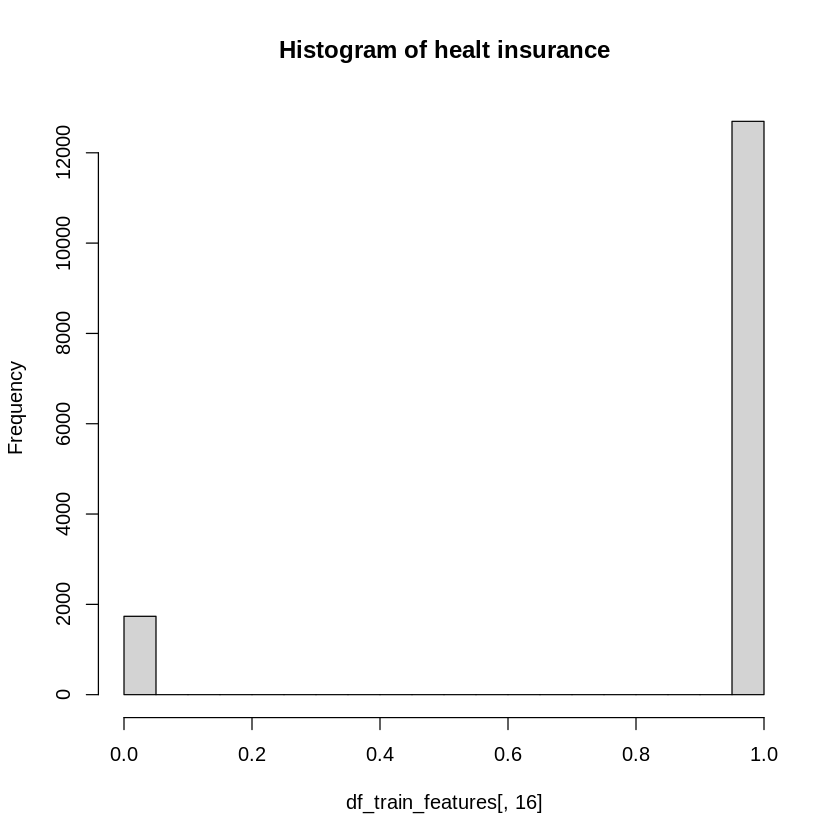

In [ ]:
hist(df_train_features[,16],main=paste("Histogram of healt insurance"))

- Pair plot

The feature seems to have a moderate "high" impact on the h1n1_output. In particular there is a strong correlation between "NA" values and h1n1_vaccine 0.
However, healt_insurance seems to have a pretty low impact on the seasonal_output since the pairs plot is really balanced.

Since the high correlation between NA values and h1n1_vaccine 0 we could have decided to substitute the NA values with a string value "MISSING" in order to keep the information of NA values.
However, we decided to delete "healt_insurance" feature because of the high rate of NA values and since the correlation NA-h1n1 0 might is just a random effect.

1. h1n1

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“Removed 12274 rows containing non-finite values (stat_g_gally_count).”


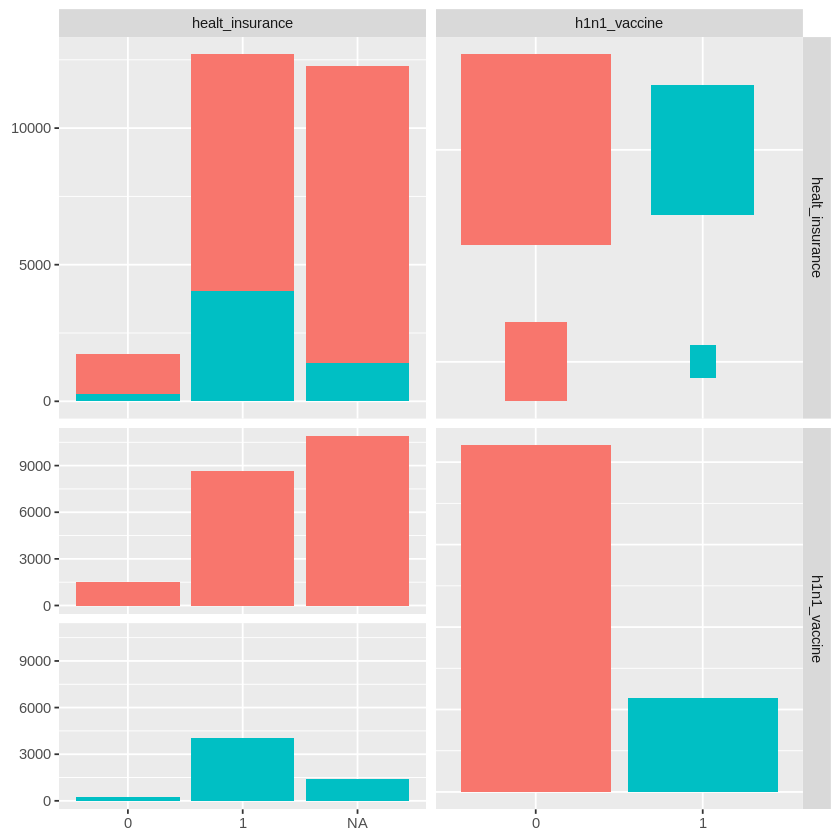

In [ ]:
# Libraries used
library("ggplot2"); library("GGally") 

# Copy of the df_train_labels
df_label_to_plot<-df_train_labels  

# Change the type of the output to categorical (we had warning error using a numerical output)
df_label_to_plot[sapply(df_label_to_plot, is.integer)] <-lapply(df_label_to_plot[sapply(df_label_to_plot, is.integer)], as.character)

# Creation of data.frame containing just healt_insurance and h1n1_vaccine
to_print<-data.frame(cbind(df_train_features[,c(16)],df_label_to_plot[,2]))
colnames(to_print)<-c("healt_insurance","h1n1_vaccine")

# Plot
ggpairs(to_print,aes(colour = h1n1_vaccine))

# Rebuild the original df_train_labels
df_train_labels<-read.csv('training_set_labels.csv',stringsAsFactors = T)


Warning message:
“Removed 12274 rows containing non-finite values (stat_g_gally_count).”


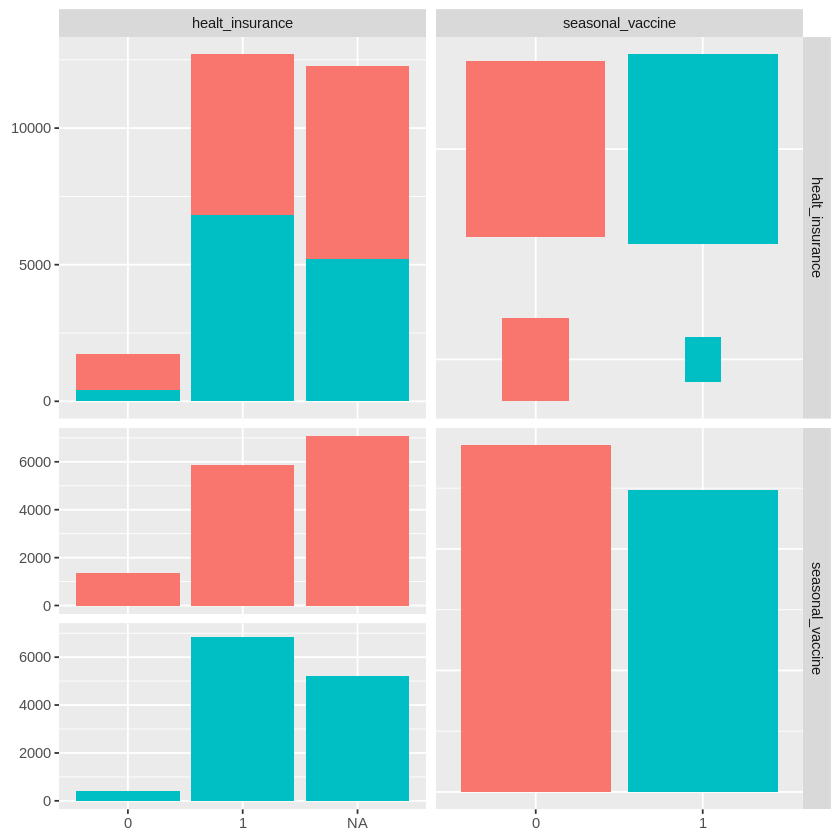

In [ ]:
# Libraries used
library("ggplot2"); library("GGally") 

# Copy of the df_train_labels
df_label_to_plot<-df_train_labels  

# Change the type of the output to categorical (we had warning error using a numerical output)
df_label_to_plot[sapply(df_label_to_plot, is.integer)] <-lapply(df_label_to_plot[sapply(df_label_to_plot, is.integer)], as.character)

# Creation of data.frame containing just healt_insurance and h1n1_vaccine
to_print<-data.frame(cbind(df_train_features[,c(16)],df_label_to_plot[,3]))
colnames(to_print)<-c("healt_insurance","seasonal_vaccine")

# Plot
ggpairs(to_print,aes(colour = seasonal_vaccine))

# Rebuild the original df_train_labels
df_train_labels<-read.csv('training_set_labels.csv',stringsAsFactors = T)


In [ ]:
df_train_features<-df_train_features[,-16]  # "healt insurance" is the 16-th column

# Application to the test set
df_test_features<-df_test_features[,-16]

### 3.2.2 Missing value imputation using "ONE-HOT ENCODING"  (Creation of first Dataset)

The "dummies" package for "one-hot encoding" deals with missing values by creating a specific column "fature_name_NA". We simply decided to delete those columns. The aim of this procedure is to increase the dimensions of the dataset using the one hot encoding, creating new dimensions for the NA values, and then, reduce the dimensions of the dataset by deleting those columns.

This procedure allows to keep all the informations of a row which has a missing value (including the missing value information. <font color="red">$$ </font> *explaination*) and treat categorical missing values in the same way of numerical missing values.

</br>
</br>
 <font color="red">$$ </font>     *explaination*
Having for example a binary feature "A", that present missing values, after the "one-hot encoding" there will be 3 columns: A_1, A_0 and A_NA.
Each row will have just a single value either "0" or "1". If we delete the column "A_NA", there will be rows like: 

    A_1     A_0
    0       0
As a consequence, the dataset will still have the information of "missing value" without having "NA" values or NA columns.

##### <font color="black"> 3.2.2.1 Application to the training set </font>

In [ ]:
# Store the first column "respondent_id" in another variable

# Remove from the dataset ("respondent_id" is useless for the one-hot-encoding and for predictions)

id<-df_train_features[,1]

df_train_features_co<-df_train_features[,-1]

# Change the type of every integer column to allow the one-hot-encoding of numerical

df_train_features_co[sapply(df_train_features_co, is.integer)] <-lapply(df_train_features_co[sapply(df_train_features_co, is.integer)], as.character)

# Encode the whole dataset using dummy.data.frame function

df_encoded<- dummy.data.frame(df_train_features_co, sep="_")

# Extract the indexes of columns that refeer to NA value

string<-colnames(df_encoded)

indexes<-grep("NA",string,ignore.case=FALSE)

indexes<-c(indexes)

# Delete those columns

df_encoded<-df_encoded[,-indexes]

Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE)

In [ ]:
head(df_encoded)

,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,h1n1_concern_3,h1n1_knowledge_0,h1n1_knowledge_1,h1n1_knowledge_2,behavioral_antiviral_meds_0,behavioral_antiviral_meds_1,behavioral_avoidance_0,⋯,opinion_h1n1_2,opinion_h1n1_3,opinion_h1n1_4,opinion_h1n1_5,opinion_seas_0,opinion_seas_1,opinion_seas_2,opinion_seas_3,opinion_seas_4,opinion_seas_5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,0,1,0,0,1,0,1,⋯,0,1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,0,⋯,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,1,0,1,0,0,⋯,0,1,0,0,0,0,0,1,0,0
6,0,0,0,1,0,1,0,1,0,0,⋯,0,0,1,0,0,0,1,0,0,0


##### <font color="green"> 3.2.2.2 Application to the test set </font>

In [ ]:
# Store the first column "respondent_id" in another variable

# Remove from the dataset ("respondent_id" is useless for the one-hot-encoding)

id_test<-df_test_features[,1]
df_test_features_co<-df_test_features[,-1]

# Change the type of every integer column to allow the one-hot-encoding of numerical

df_test_features_co[sapply(df_test_features_co, is.integer)] <-lapply(df_test_features_co[sapply(df_test_features_co, is.integer)], as.character)

# Encode the whole dataset using dummy.data.frame function

df_test_encoded<- dummy.data.frame(df_test_features_co, sep="_")

# Extract the indexes of columns that refeer to NA value

string<-colnames(df_test_encoded)

indexes<-grep("NA",string,ignore.case=FALSE)

indexes<-c(indexes)

# Delete those columns

df_test_encoded<-df_test_encoded[,-indexes]


head(df_test_encoded)

Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in dummy.classes == "ALL" || class(data[, nm]) %in% dummy.classes:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE)

,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,h1n1_concern_3,h1n1_knowledge_0,h1n1_knowledge_1,h1n1_knowledge_2,behavioral_antiviral_meds_0,behavioral_antiviral_meds_1,behavioral_avoidance_0,⋯,opinion_h1n1_2,opinion_h1n1_3,opinion_h1n1_4,opinion_h1n1_5,opinion_seas_0,opinion_seas_1,opinion_seas_2,opinion_seas_3,opinion_seas_4,opinion_seas_5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,0,1,1,0,0,⋯,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,1,⋯,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,1,0,1,⋯,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,0,1,⋯,0,1,0,0,0,0,0,1,0,0
5,0,0,0,1,0,1,0,0,1,0,⋯,0,1,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,1,1,0,0,⋯,0,1,0,0,0,0,0,1,0,0


### 3.2.3 Missing value imputation using the MICE package

The MICE package has many functions to deal with missing data (the different functions can be seen by typing this function on the code cell *methods(mice)*)
Our aim here is to substitute each value with the best possible estimate for the missing. It should be noted that with MIC, we can specify the method we one and we can also generate more dataset with different data value by simply specifying the value of the paramater m.

For our dataset, the *pmm (Predictive mean matching)* function will be applied automatically. And one of the advantages of this function is that it works with value that are either numeric or categorical.


<font color="gray"> Remarks from https://www.r-bloggers.com/2015/10/imputing-missing-data-with-r-mice-package/ : While some quick fixes such as mean-substitution may be fine in some cases, such simple approaches usually introduce bias into the data, for instance, applying mean substitution leaves the mean unchanged (which is desirable) but decreases variance, which may be undesirable. </font>

##### <font color="black"> 3.2.2.1 Application to the training set </font>

In [ ]:
library(mice)
#library(VIM)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




Looking at the missing data pattern, we can see through the result below that for example, there is 13506 missing data about health_insurance, and 9470 missing data about doctor_recc_seasonal for instance.

,respondent_id,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,⋯,opinion_seas,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,health_worker,child_under_6_months,chronic_med_condition,doctor_recc_h1n1,doctor_recc_seasonal,
22976,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
1827,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,0,2
194,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,0,1,1,1
27,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,0,0,0,3
13,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,0,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,0,1,0,0,3
10,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,0,1,1,2
38,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,1,1,1,2
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,1,0,0,4


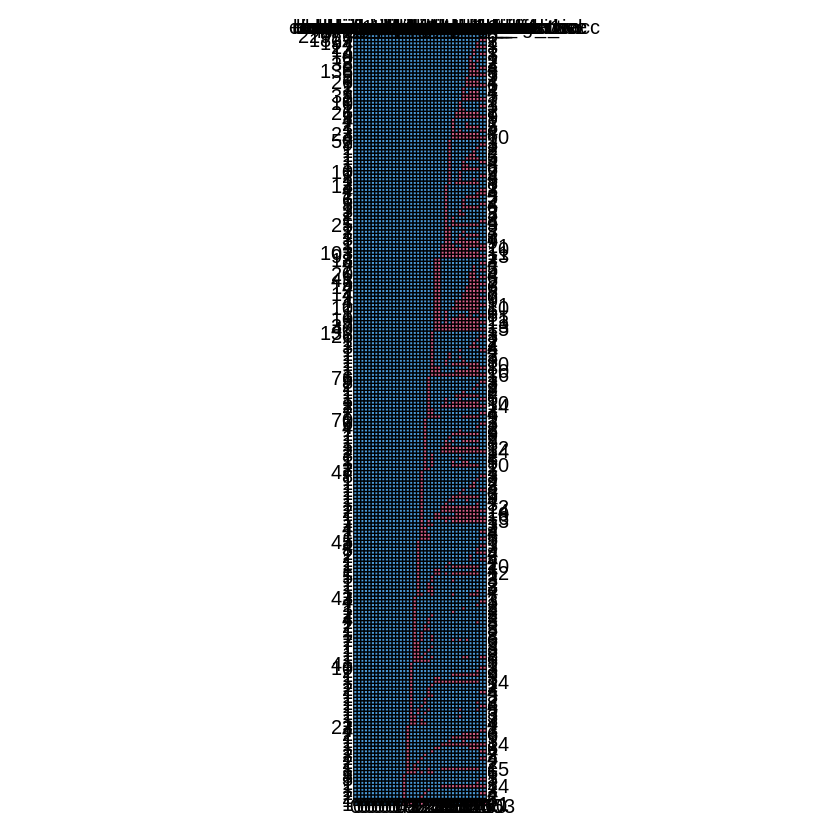

In [ ]:
#pattern_df <- as.data.frame(md.pattern(df_train_features))
#index <- as.numeric(row.names(pattern_df))
#head (pattern_df[-order(index), ] )
md.pattern(df_train_features)
 

In [ ]:
#apply the mice function
impute <- mice(df_train_features, m=3, seed = 123)


 iter imp variable
  1   1  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  household_children  opinion_h1n1  opinion_seas
  1   2  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sic

Warning message:
“Number of logged events: 360”


In [ ]:
print(impute)

Class: mids
Number of multiple imputations:  3 
Imputation methods:
              respondent_id                h1n1_concern 
                         ""                       "pmm" 
             h1n1_knowledge   behavioral_antiviral_meds 
                      "pmm"                       "pmm" 
       behavioral_avoidance        behavioral_face_mask 
                      "pmm"                       "pmm" 
      behavioral_wash_hands behavioral_large_gatherings 
                      "pmm"                       "pmm" 
    behavioral_outside_home       behavioral_touch_face 
                      "pmm"                       "pmm" 
           doctor_recc_h1n1        doctor_recc_seasonal 
                      "pmm"                       "pmm" 
      chronic_med_condition        child_under_6_months 
                      "pmm"                       "pmm" 
              health_worker opinion_h1n1_vacc_effective 
                      "pmm"                       "pmm" 
          opinion_h1

In [ ]:
#choose arbitraly the first dataset generate by mice
df_train_features_with_mice <- complete(impute, 1)

In [ ]:
#check if there are still missing value in our dataset
p <- function(x) {sum(is.na(x))/length(x)*100}
apply(df_train_features_with_mice, 2, p)

respondent_id                h1n1_concern 
                          0                           0 
             h1n1_knowledge   behavioral_antiviral_meds 
                          0                           0 
       behavioral_avoidance        behavioral_face_mask 
                          0                           0 
      behavioral_wash_hands behavioral_large_gatherings 
                          0                           0 
    behavioral_outside_home       behavioral_touch_face 
                          0                           0 
           doctor_recc_h1n1        doctor_recc_seasonal 
                          0                           0 
      chronic_med_condition        child_under_6_months 
                          0                           0 
              health_worker opinion_h1n1_vacc_effective 
                          0                           0 
          opinion_h1n1_risk opinion_h1n1_sick_from_vacc 
                          0                           0 
opinion_seas_vacc_effective           opinion_seas_risk 
                          0                           0 
opinion_seas_sick_from_vacc                   age_group 
                          0                           0 
                  education                        race 
                          0                           0 
                        sex              income_poverty 
                          0                           0 
             marital_status                 rent_or_own 
                          0                           0 
          employment_status              hhs_geo_region 
                          0                           0 
                 census_msa            household_adults 
                          0                           0 
         household_children         employment_industry 
                          0                           0 
      employment_occupation                   behaviors 
                          0                           0 
               opinion_h1n1                opinion_seas 
                          0                           0

##### <font color="green"> 3.2.2.2 Application to the test set </font>

In [ ]:
apply(df_test_features, 2, p)

respondent_id                h1n1_concern 
                 0.00000000                  0.31825670 
             h1n1_knowledge   behavioral_antiviral_meds 
                 0.45679197                  0.29579152 
       behavioral_avoidance        behavioral_face_mask 
                 0.79751385                  0.07113973 
      behavioral_wash_hands behavioral_large_gatherings 
                 0.14976786                  0.26958215 
    behavioral_outside_home       behavioral_touch_face 
                 0.30702411                  0.47925715 
           doctor_recc_h1n1        doctor_recc_seasonal 
                 8.08746443                  8.08746443 
      chronic_med_condition        child_under_6_months 
                 3.48959113                  3.04403175 
              health_worker opinion_h1n1_vacc_effective 
                 2.95417103                  1.49019021 
          opinion_h1n1_risk opinion_h1n1_sick_from_vacc 
                 1.42279467                  1.40407369 
opinion_seas_vacc_effective           opinion_seas_risk 
                 1.69237682                  1.86835405 
opinion_seas_sick_from_vacc                   age_group 
                 1.95072637                  0.00000000 
                  education                        race 
                 0.00000000                  0.00000000 
                        sex              income_poverty 
                 0.00000000                  0.00000000 
             marital_status                 rent_or_own 
                 0.00000000                  0.00000000 
          employment_status              hhs_geo_region 
                 0.00000000                  0.00000000 
                 census_msa            household_adults 
                 0.00000000                  0.84244421 
         household_children         employment_industry 
                 0.84244421                  0.00000000 
      employment_occupation                   behaviors 
                 0.00000000                  0.00000000 
               opinion_h1n1                opinion_seas 
                 1.11202636                  1.50891119

In [ ]:
#apply the mice function
impute2 <- mice(df_test_features, m=3, seed = 123)
df_test_features_with_mice <- complete(impute2, 1)


 iter imp variable
  1   1  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  household_children  opinion_h1n1  opinion_seas
  1   2  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  chronic_med_condition  child_under_6_months  health_worker  opinion_h1n1_vacc_effective  opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  opinion_seas_sic

# 3.3  Features' Selection

Feature selection for the "Fully-encoded Dataset".
</br>
</br>

Since the MICE-dataset will be applied on models that implement theirselves an Embedded method technique of feature selection (Random Forest, Decision Tree),
we applied feature selection techniques just on the "Fully-encoded Dataset".

Considering the fact that the "Fully-encoded Dataset" (172 features) will have almost 70 features after Filter methods, we decided not to aplly further Wrapper methods in order to speed up the computation of the project.


* Filter Methods 
We compared PCA technique and mRMR technique. As a result we opted for mRMR technique.


In [ ]:
# Analysis of PCA applied to the Fully-encoded Dataset

df_PCA<-prcomp(df_encoded,center = TRUE,scale. = TRUE)

# Compute the variance percentage for each PCA component (the variance of each PCA dimension compared to the total variance)

var_explained<-df_PCA$sdev^2 / sum(df_PCA$sdev^2)  


Plot of  "Variance explaination" in function of the PCA components

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


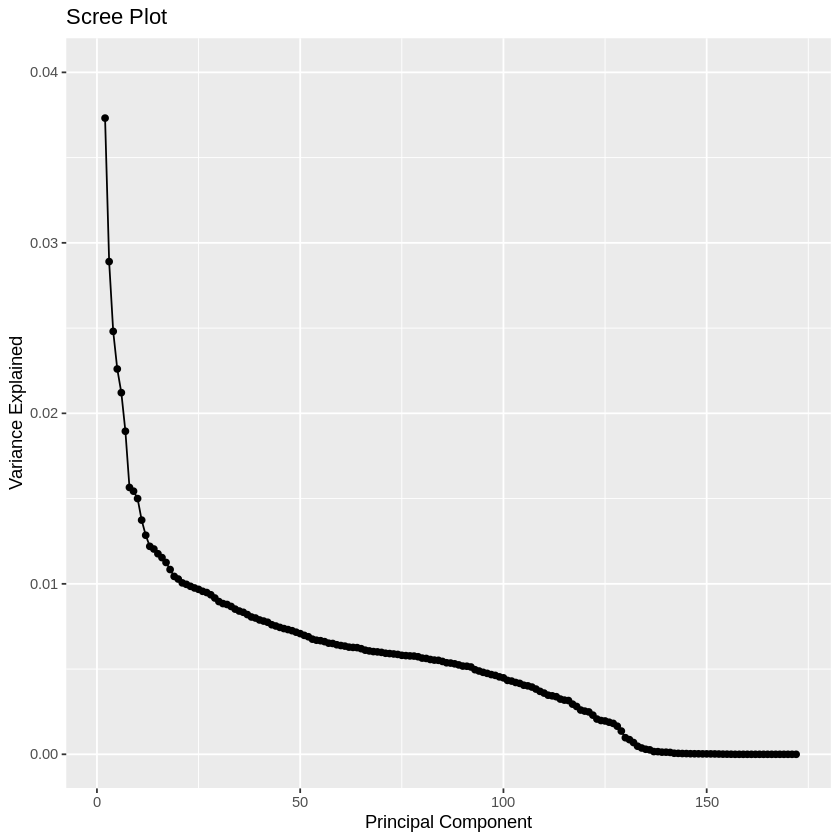

In [ ]:
# Plot the variance explaination for each component

qplot(c(1:ncol(df_encoded)), var_explained) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0,0.04)

In [ ]:
# Compute the PCA to transform the dataset into its transformed version

X_pca<-data.frame(prcomp(df_encoded,retx=T)$x)
head(X_pca)
dim(X_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-1.279015e-16,-5.793005e-16,-3.584278e-16,5.245323e-17,2.427485e-16,3.271303e-16,4.365262e-16,8.432238e-17,3.023991e-16,5.729281e-17
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,-2.787344e-16,-1.189303e-16,6.943232e-17,5.981814e-16,-3.649602e-16,-4.461218e-16,-3.759141e-16,-2.048940e-16,-1.327307e-16,7.071631e-17
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,7.506118e-17,-1.907225e-16,-1.936291e-16,-7.605629e-16,1.143789e-16,-1.652059e-16,6.030597e-16,6.784250e-17,-2.006707e-16,-6.543888e-17
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,1.670015e-16,2.984695e-16,-2.193247e-16,6.429814e-17,1.005012e-16,-1.824447e-16,-4.919634e-17,-4.144508e-17,1.774990e-16,-4.548956e-17
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-5.322030e-17,-5.301081e-17,1.267866e-16,-6.062859e-16,-1.776100e-16,-7.015599e-16,-1.955029e-16,-1.485155e-16,-1.476952e-17,1.370695e-16
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,1.930224e-16,6.697004e-16,3.991042e-16,-2.542405e-16,-1.770546e-16,-2.032614e-16,-1.463409e-16,1.059663e-17,-2.535798e-16,6.118468e-18


[1] 26707   172

## 3.3.1 For h1n1 vaccine

### 3.3.1.1 PCA

##### 3.3.1.1.1 Application of PCA to the trainin_set

PCA + cross Validation to evaluate the number of features to keep

In [ ]:
# Compute the cross-validation to return the best number of dimensions to take
# Using Linear Regression model


CV_folds <- 10

N<-nrow(df_encoded)

n<-ncol(df_encoded)

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)




for (i in 1:CV_folds)
 {
    # idx_ts represents the indices of the test set the i-th fold

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  

    X_ts<-X_pca[idx_ts,]  
    
    Y_ts<-df_train_labels[idx_ts,2]  

    # idx_tr represents  indices of the training sefor the i-th fold

    idx_tr<-setdiff(1:N,idx_ts)

    X_tr<-X_pca[idx_tr,]

    Y_tr<-df_train_labels[idx_tr,2]         
     
    for (nb_components in 1:n) 
    {
        # Create a dataset including only the first nb_components principal components
        
        DS<-cbind(X_tr[,1:nb_components,drop=F],h1n1=Y_tr)
        
        # Model fit (using lm function)

        model<- lm(h1n1~.,DS)
        
        # Model predict
        
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


  [1] "#Features:  1  ; CV error= 0.1646  ; std dev= 0.0029"  
  [2] "#Features:  2  ; CV error= 0.1618  ; std dev= 0.0027"  
  [3] "#Features:  3  ; CV error= 0.1526  ; std dev= 0.0024"  
  [4] "#Features:  4  ; CV error= 0.1509  ; std dev= 0.0023"  
  [5] "#Features:  5  ; CV error= 0.1414  ; std dev= 0.0028"  
  [6] "#Features:  6  ; CV error= 0.1413  ; std dev= 0.0028"  
  [7] "#Features:  7  ; CV error= 0.1408  ; std dev= 0.003"   
  [8] "#Features:  8  ; CV error= 0.1402  ; std dev= 0.0029"  
  [9] "#Features:  9  ; CV error= 0.1402  ; std dev= 0.003"   
 [10] "#Features:  10  ; CV error= 0.1399  ; std dev= 0.003"  
 [11] "#Features:  11  ; CV error= 0.1398  ; std dev= 0.003"  
 [12] "#Features:  12  ; CV error= 0.1396  ; std dev= 0.003"  
 [13] "#Features:  13  ; CV error= 0.1396  ; std dev= 0.0029" 
 [14] "#Features:  14  ; CV error= 0.1395  ; std dev= 0.003"  
 [15] "#Features:  15  ; CV error= 0.1394  ; std dev= 0.003"  
 [16] "#Features:  16  ; CV error= 0.1393  ; std dev= 0

Using 70 features, the CV error is around 12%. So we decided to reduce the dimensions of the Dataset to 70 features.

In [ ]:
X_PCA_train_h1n1<-X_pca[,1:70]

##### 3.3.1.1.2<font color="green">Application of PCA with 70 features to the test set </font>

In [ ]:
X_pca_test<-data.frame(prcomp(df_test_encoded,retx=T)$x)
X_PCA_test_h1n1<-X_pca_test[,1:70]
head(X_PCA_test_h1n1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.004447549,0.5093997,0.6412036,-2.2582454,0.62746735,0.570591658,1.0996816,0.275111274,-0.8313661,-0.8098140,⋯,0.008647237,0.03902064,0.00558088,-0.40049850,0.29364353,0.1162872,0.3529866,-0.06992486,-0.03174422,0.03180003
2,2.237417571,-1.4095789,1.7886779,-1.0373440,0.45609442,-0.335920592,-0.6962013,0.002419384,0.9597222,0.1185543,⋯,0.057031082,-0.03180180,0.21753375,0.08537928,-0.10978806,-0.3774484,0.2310139,-0.02676143,0.27672619,-0.18360765
3,-0.787460877,1.8195859,-0.1420523,-0.6845134,-0.06110708,-0.477649997,-0.7774399,-1.234074463,-1.6506156,0.2161288,⋯,-0.073473152,-0.38504769,-0.17928328,0.24052740,-0.54717372,0.1591852,-0.1995261,0.04962458,-0.10899500,0.04453355
4,0.453846377,-1.0018149,-1.6756657,1.9788968,-0.71049711,0.001069321,-1.3238366,0.207744062,1.1483900,1.1265404,⋯,-0.035067213,-0.26452695,-0.35471978,0.45364148,-0.58158842,0.1970665,0.1803231,-0.25207423,-0.09661076,0.04525079
5,-1.433494638,1.3740700,1.8916325,0.4302602,0.24585164,0.563613480,0.3060152,-0.051895672,-0.1381700,0.8649201,⋯,0.382277707,0.11678955,-0.10942428,0.12766279,-0.08848933,0.3391955,-0.3968616,0.39414196,0.22047392,-0.08124763
6,-0.279204385,1.4439452,0.4893557,-0.5035121,1.01792579,1.089399429,1.0949642,0.467268410,-1.2390252,0.7216937,⋯,0.068244872,0.37931013,0.22408238,-0.19756895,0.09599775,-0.1488288,0.4597797,-0.19617123,-0.54604758,-0.11082627


### 3.3.1.2 mRMR

####3.3.1.2.1 Application of mRMR to the training_set

mRMR + cross Validation to evaluate the number of features to keep

In [ ]:

# Number of groups for the cross-validation

CV_folds <- 10

# Storing variables for the dimension of the dataset

N<-nrow(df_encoded)
n<-ncol(df_encoded)

# Compute the number of elements per cross-validation-group

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    # idx_ts represents the indices of the test set the i-th fold
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV)) 
    X_ts<-df_encoded[idx_ts,]  
    Y_ts<-df_train_labels[idx_ts,2]  
    
    # idx_tr represents  indices of the training sefor the i-th fold
   
    idx_tr<-setdiff(1:N,idx_ts) 
    X_tr<-df_encoded[idx_tr,]
    Y_tr<-df_train_labels[idx_tr,2]                          
    
    # Computing the correlation between input variables and output variable on the training set
    
    correlation<-abs(cor(X_tr,Y_tr))
    
    # Initialization : No variables are selected and all the variables are candidates
   
    selected_h1n1<-c()
   
    candidates<-1:n
    
    # mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
   
    for (j in 1:n) {
       
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected_h1n1)>0) 
        {
            # Compute the correlation between the selected variables and the candidates on the training set
            
            cor_selected_candidates<-cor(X_tr[,selected_h1n1,drop=F],X_tr[,candidates,drop=F])
            
            # Compute the mean correlation for each candidate variable, across the selected variables
            
            redundancy_score<-apply(cor_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        
        mRMR_score<-correlation[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
       
        selected_current<-candidates[which.max(mRMR_score)]
       
        selected_h1n1<-c(selected_h1n1,selected_current)
        
        # Remove the selected variables from the candidates
       
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected_h1n1
     
    for (nb_features in 1:n)
     {
        # Create a dataset including only the first nb_features selected variables
        
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],h1n1=Y_tr)
        
        # Model fit (using lm function)
       
        model<- lm(h1n1~.,DS)
        
        # Model prediction
       
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
       
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts[, ranking[1:nb_features], drop = F]):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, X_ts

By choosing 70 features the CV error is around 12%, the same of PCA. We decided to use mRMR instead of PCA in order to mantain the name and the meaning of features.

In [ ]:
selected_h1n1

In [ ]:
df_train_mRMR_h1n1<-df_encoded[,selected_h1n1[1:70]]
head(df_train_mRMR_h1n1)

# Store the names of columns selected
names_selected<-colnames(df_train_mRMR_h1n1)

Pairs plot of the three most mRMR_important features with respect to the h1n1_output. As we can see those three features have a strong impact on the h1n1_output.

In [ ]:
to_print<-data.frame(cbind(df_train_mRMR_h1n1[,c(1,2,3)],df_label_to_plot[,2]))
colnames(to_print)<-c("doctor_recc_h1n1_1","doctor_recc_h1n1_0","opinion_h1n1_vacc_effective_5","h1n1_vaccine")
ggpairs(to_print,aes(colour = h1n1_vaccine))

#### 3.3.1.2.2 <font color="green">Application of mRMR with 70 features to the test set </font>

In [ ]:
# Select the columns with name in names_selected

df_test_mRMR_h1n1<-df_test_encoded[names_selected]
head(df_test_mRMR_h1n1)

## 3.3.2  Seasonal vaccine

### 3.3.2.1 PCA

#### 3.3.2.1.1 Application of PCA to the trainin_set

PCA + cross Validation to evaluate the number of features to keep

In [ ]:
# Compute the cross-validation to return the best number of dimensions to take
# Using Linear Regression model


CV_folds <- 10

N<-nrow(df_encoded)

n<-ncol(df_encoded)

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)




for (i in 1:CV_folds)
 {
    # idx_ts represents the indices of the test set the i-th fold

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  

    X_ts<-X_pca[idx_ts,]  
    
    Y_ts<-df_train_labels[idx_ts,3]  

    # idx_tr represents  indices of the training sefor the i-th fold

    idx_tr<-setdiff(1:N,idx_ts)

    X_tr<-X_pca[idx_tr,]

    Y_tr<-df_train_labels[idx_tr,3]         
     
    for (nb_components in 1:n) 
    {
        # Create a dataset including only the first nb_components principal components
        
        DS<-cbind(X_tr[,1:nb_components,drop=F],seasonal=Y_tr)
        
        # Model fit (using lm function)

        model<- lm(seasonal~.,DS)
        
        # Model predict
        
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


Using 70 features the CV error is around 16%.

In [ ]:
X_PCA_train_seasonal<-X_pca[,1:70]
head(X_PCA_train_seasonal)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-0.006504529,-0.20328269,-0.06894103,-0.155777845,0.25242657,-0.06971625,0.1948388,0.05142186,-0.2856737,0.3380586
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,0.078716388,-0.01714583,0.15873955,-0.060636987,-0.13854293,-0.45340568,-0.5577081,-0.39491714,-0.6926476,0.3863742
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,-0.043681375,-0.06738864,-0.21523263,0.062686805,-0.02090873,-0.30554022,-0.5626234,0.44451689,0.3142176,-0.2839355
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,-0.146837679,0.70154282,-0.00458771,0.005408905,0.33790379,-0.55334451,0.3501466,-0.16343472,-0.3004997,-0.4156425
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-0.125390690,-0.24879090,-0.05578605,-0.140938571,0.18720007,0.27190670,-0.1457682,-0.60041833,-0.4915466,-0.3452240
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,0.034821945,-0.07583087,-0.69276474,-0.374838617,-0.50510968,-0.29317742,0.1127710,-0.31550671,0.7410943,-0.3106621


##### 3.3.1.1.2<font color="green">Application of PCA with 70 features to the test set </font>

In [ ]:
X_pca_test<-data.frame(prcomp(df_test_encoded,retx=T)$x)
X_PCA_test_seasonal<-X_pca_test[,1:70]
head(X_PCA_test_seasonal)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.004447549,0.5093997,0.6412036,-2.2582454,0.62746735,0.570591658,1.0996816,0.275111274,-0.8313661,-0.8098140,⋯,0.008647237,0.03902064,0.00558088,-0.40049850,0.29364353,0.1162872,0.3529866,-0.06992486,-0.03174422,0.03180003
2,2.237417571,-1.4095789,1.7886779,-1.0373440,0.45609442,-0.335920592,-0.6962013,0.002419384,0.9597222,0.1185543,⋯,0.057031082,-0.03180180,0.21753375,0.08537928,-0.10978806,-0.3774484,0.2310139,-0.02676143,0.27672619,-0.18360765
3,-0.787460877,1.8195859,-0.1420523,-0.6845134,-0.06110708,-0.477649997,-0.7774399,-1.234074463,-1.6506156,0.2161288,⋯,-0.073473152,-0.38504769,-0.17928328,0.24052740,-0.54717372,0.1591852,-0.1995261,0.04962458,-0.10899500,0.04453355
4,0.453846377,-1.0018149,-1.6756657,1.9788968,-0.71049711,0.001069321,-1.3238366,0.207744062,1.1483900,1.1265404,⋯,-0.035067213,-0.26452695,-0.35471978,0.45364148,-0.58158842,0.1970665,0.1803231,-0.25207423,-0.09661076,0.04525079
5,-1.433494638,1.3740700,1.8916325,0.4302602,0.24585164,0.563613480,0.3060152,-0.051895672,-0.1381700,0.8649201,⋯,0.382277707,0.11678955,-0.10942428,0.12766279,-0.08848933,0.3391955,-0.3968616,0.39414196,0.22047392,-0.08124763
6,-0.279204385,1.4439452,0.4893557,-0.5035121,1.01792579,1.089399429,1.0949642,0.467268410,-1.2390252,0.7216937,⋯,0.068244872,0.37931013,0.22408238,-0.19756895,0.09599775,-0.1488288,0.4597797,-0.19617123,-0.54604758,-0.11082627


### 3.3.2.2 mRMR

#### 3.3.2.2.1 Application of mRMR to the training_set

mRMR + cross Validation to evaluate the number of features to keep

In [ ]:

CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  # idx_ts represents the indices of the test set the i-th fold
    X_ts<-df_encoded[idx_ts,]  
    Y_ts<-df_train_labels[idx_ts,3]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-df_encoded[idx_tr,]
    Y_tr<-df_train_labels[idx_tr,3]                          
    
    # Computing the correlation between input variables and output variable on the training set
    correlation<-abs(cor(X_tr,Y_tr))
    
    # Initialization : No variables are selected and all the variables are candidates
    selected_seas<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected_seas)>0) {
            # Compute the correlation between the selected variables and the candidates on the training set
            cor_selected_candidates<-cor(X_tr[,selected_seas,drop=F],X_tr[,candidates,drop=F])
            # Compute the mean correlation for each candidate variable, across the selected variables
            redundancy_score<-apply(cor_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-correlation[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected_seas<-c(selected_seas,selected_current)
        
        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected_seas
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],seasonal=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(seasonal~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

In [ ]:
selected_seas

In [ ]:
df_train_mRMR_seasonal<-df_encoded[,selected_seas[1:70]]
head(df_train_mRMR_seasonal)

# To store the names of columns selected

select_names<-colnames(df_train_mRMR_seasonal)

Pairs plot of the three most mRMR_important features with respect to the seasonal_output. As we can see those three features have a strong impact on the seasonal_output.

In [ ]:
to_print<-data.frame(cbind(df_train_mRMR_seasonal[,c(1,2,3)],df_label_to_plot[,3]))
colnames(to_print)<-c("opinion_seas_vacc_effective_5","opinion_seas_vacc_effective_4","opinion_seas_vacc_effective_2","seasonal_vaccine")
ggpairs(to_print,aes(colour = seasonal_vaccine))

#### 3.3.2.2.2 <font color="green">Application of mRMR with 70 features to the test set </font>

In [ ]:
df_test_mRMR_seasonal<-df_test_encoded[select_names]
head(df_test_mRMR_seasonal)


####################################################
# 4.DataSet Selected for the different model:
##################################################

## 4.1 Normal Dataset + missing values dealt with mice

In [ ]:
head(df_train_features_with_mice,2 )

## 4.2 One encoded DataSet columns

In [ ]:
#data with oneEncoding to deal with NA
head(df_train_mRMR_h1n1, 2)

head(df_train_mRMR_seasonal, 2)

# 5.Models


03 sets: 

* training set (it has been given to us)
* Validation set (we will generate through a sample of the training data)
* testing set (only one time, it has been given to us)

## 5.1 Random forest

documentation of random forest: https://cran.r-project.org/web/packages/randomForest/randomForest.pdf

In [ ]:
library(randomForest)
library(caret)

In [ ]:
str(df_train_labels)

### 5.1.1 Random custom functions

In [ ]:
set.seed(71)

In [ ]:
build_random_forest_prob <- function(data_frame,test_sample_data, factor_label, 
                  vec_label_name, weights=NULL, mtry=FALSE, ntree_val=500 ) {
  
  rf <- c(0)
  if (mtry != FALSE){
    rf <-randomForest(factor_label~.,data=data_frame, weights=weights, mtry=mtry, ntree=ntree_val) 
    #print("inside mtry not false")
  }
  else{
    rf <-randomForest(factor_label~.,data=data_frame, weights=weights, ntree=ntree_val) 
    #print("inside mtry for false")
  }
  pred1=predict(object = rf, newdata= test_sample_data,type = "prob")
  #print(pred1)
  dataframe_data=as.data.frame(pred1)
  ds <- as.data.frame(dataframe_data[,2]) #as.data.frame(apply(dataframe_data, 1, max))
  colnames(ds) <- vec_label_name
  #return more values
  return_value <- list("rf" = rf, "rf_df" = ds, "predict_vec" = pred1 )
  return( return_value )

}

#return the probability for each multi-class
build_random_forest_prob_multi_class <-function(data_frame,h1n1_vac_factor_label,
         seasonal_vac_factor_label, vec_label_name1, vec_label_name2 , ntree_val=500){

    h1n1_vac_df <- build_random_forest_prob(data_frame,h1n1_vac_factor_label, 
                  vec_label_name1, ntree_val)
    seasonal_vac_df <- build_random_forest_prob(data_frame,seasonal_vac_factor_label, 
                  vec_label_name2, ntree_val)
    result_df <- cbind(h1n1_vac_df, seasonal_vac_df)

    #return more values
    return_value <- list("rf_h1n1" = h1n1_vac_df$rf , "rf_seasonal" = seasonal_vac_df$rf , "rf_df" = result_df )

    return(return_value)

}


### 5.1.2 Random forest for the dataset that has been dealt with MICE

##### 5.1.2.1 Split the dataset in training and validation set

In [ ]:
random_df_with_mice <- cbind (df_train_features_with_mice, df_train_labels)
head(random_df_with_mice, 2)
print(dim(random_df_with_mice))

In [ ]:
# Splitting data into train
# and validation data
split <- sample.split(random_df_with_mice, SplitRatio = 0.7)
train_data_subset <- subset(random_df_with_mice, split == "TRUE")
val_data_subset <- subset(random_df_with_mice, split == "FALSE")

In [ ]:
# Building the training and validation set
label_vector <- c('h1n1_vaccine', 'seasonal_vaccine')
feature_col_len <- ncol(random_df_with_mice) #remove the last 02 columns for the label
feature_col_len <- feature_col_len - 3 # We do -3 intead of -2 in order to remove the 'respondent_id.1' column that has been created through split
train_dataset <- train_data_subset[,1:feature_col_len]
val_dataset <- val_data_subset[, 1:feature_col_len]


In [ ]:
head(train_dataset, 1)
names(train_dataset)

##### 5.1.2.1 Apply model

* For the seasonal vaccine

In [ ]:
seasonal_vaccine <- as.factor(train_data_subset$seasonal_vaccine)
seasonal_vaccine_df <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    seasonal_vaccine,
    c('seasonal_vaccine'),
    ntree_val = 500             
                  )
head(seasonal_vaccine_df$rf_df, 5)


In [ ]:
print(seasonal_vaccine_df$rf)

* For h1n1 vaccine

In [ ]:
h1n1_vaccine <- as.factor(train_data_subset$h1n1_vaccine)
h1n1_vaccine_df <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    h1n1_vaccine,
    c('h1n1_vaccine'),
    ntree_val = 500             
                  )
head(h1n1_vaccine_df$rf_df, 5)

* For h1n1 with a weight of 3 for (1) vaccinated individual

In [ ]:
## Using weights: make versicolors having 3 times larger weights
weight_wt <- ifelse( train_data_subset$h1n1_vaccine == 1, 3, 1 )
set.seed(15)
h1n1_vaccine_df_wt <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    h1n1_vaccine,
    c('h1n1_vaccine'),
    weights= weight_wt,
    ntree_val = 500             
                  )
head(h1n1_vaccine_df_wt$rf_df, 5)

#(data_frame,test_sample_data, factor_label, vec_label_name, weights=NULL, mtry=FALSE, ntree_val=500, ) 

---
* <font color="black"> From the analysis of the H1N1 class distribution, we have seen that the data are very unbalanced with more than 70% of people who have not taken the vaccin (0). Hence, it shows that there is a huge class repartition, and in order to try to balanced this binary class, we decided to increase the weight of the class of vaccinated (1) </font>

* Why do we add a weight to an unbalanced dataset? we do that to avoid the model to classify almost all the data to the class which mostly appear in the dataset. The weight will try to diminish the unbalancedness of the data by enabling the capacity of the model to distinguish between the different class and hence diminishing the wrongly classified data

* From the two cell below, we can clearly see the confusion matrix of the unbalanced h1n1 data with the one having a weight of 03. From the confusion matrix, we see that the weighted confusion has a good increase in the number of element in the True Positive section even though there is an increase in the error rate and the False Positive.

* For the moment, with the weight, we see an amelioration of the TP, There is indedd a need to tune this weight parameter.

---

In [ ]:
print(h1n1_vaccine_df$rf)
names(h1n1_vaccine_df$rf)

In [ ]:
print(h1n1_vaccine_df_wt$rf)
names(h1n1_vaccine_df_wt$rf)

In [ ]:
#build the result table


#### 5.1.2.1 Evaluation of parameters

##### 5.1.2.1.2 Calculate Performance Metrics

In [ ]:

varaibles_importance_function <- function(random_forest_model, number_of_row=15){
   #Evaluate variable importance in descending order
  df_imp <- importance(random_forest_model)
  df_imp <- as.data.frame(df_imp)
  df_total_row <- nrow(df_imp)
  df_imp <- cbind('features' = rownames(df_imp), df_imp,  (df_imp/df_total_row))
  rownames(df_imp) <- 1:nrow(df_imp)
  colnames(df_imp) <- c('features','MeanDecreaseGini','frequency')
  #head(df_imp)
  test <- df_imp[order(-df_imp$MeanDecreaseGini), ] 
  dim(df_imp)
  head(test, number_of_row  )
  varImpPlot(random_forest_model)
}


###### 5.1.2.1.2.1 Seasonal vaccine

In [ ]:
varaibles_importance_function(seasonal_vaccine_df$rf, number_of_row=15)

###### 5.1.2.1.2.2 H1N1 vaccine

In [ ]:
#For this case, we are going to work with the weighted h1n1
varaibles_importance_function(h1n1_vaccine_df_wt$rf, number_of_row=15)

##### 5.1.2.1.3 the ROC & PR Curves

In [ ]:
plot_ROC<-function(Y_pred,Y)
{
    val_Y<-Y
    thresholds <- seq(0,0.99,0.05)
    TPR_vec <- c()
    FPR_vec <- c()
    
    for(threshold in thresholds){
   
      # A. Compute Y_hat based on the threshold
      Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
        
      # B. Compute the Sensitivity and the Precision 
      confusion_matrix <- table(Y_hat,val_Y[,1])
        
      if(dim(confusion_matrix)[1] < 2){ 
          if(rownames(confusion_matrix) == "0"){
              confusion_matrix <- rbind(confusion_matrix,c(0,0))
              rownames(confusion_matrix)[2] <- "1"
          }
          else {
              confusion_matrix <- rbind(c(0,0),confusion_matrix)
              rownames(confusion_matrix)[1] <- "0"
          }
    }
    FP <- confusion_matrix[2,1]
    TP <- confusion_matrix[2,2]
    N_N <- sum(confusion_matrix[,1]) 
    N_P <- sum(confusion_matrix[,2]) 
    

  

    TPR_vec <- c(TPR_vec,TP/N_P)
    FPR_vec <- c(FPR_vec,FP/N_N)

    #AUC #error 
    require(pracma)
    #AUC <- trapz(FPR,TPR)
    #AUC
    #AUC <- sum(abs(diff(FPR)) * (head(TPR,-1)+tail(TPR,-1)))/2
    #AUC  
  }
      
    
  plot(FPR_vec,TPR_vec)
  lines(FPR_vec,TPR_vec,col="blue")
  lines(thresholds,thresholds,lty=2)
  title("ROC Curve")
  
}

In [ ]:
# Range of thresholds
plot_PR<-function(Y_pred,Y){
    
    val_Y<-Y
thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()




for(threshold in thresholds){
   
   # A. Compute Y_hat based on the threshold
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2){ 
       if(rownames(confusion_matrix) == "0"){
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           rownames(confusion_matrix)[2] <- "1"
       }
       else 
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           rownames(confusion_matrix)[1] <- "0"
       }
   }
   TP <- confusion_matrix[2,2] 
   FN <- confusion_matrix[1,2] 
   FP <- confusion_matrix[2,1]
   
  

   Precision_vec <- c(Precision_vec,TP/(TP+FN))
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}

plot(Sensitivity_vec,Precision_vec)
lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

}

In [ ]:
#The ROC curve using the given package
roc_curve_from_package <- function(prediction_vec, validation_label, title = "ROC Curve for Random Forest"){
  perf = prediction( prediction_vec, validation_label )
  # 1. Area under curve
  auc = performance(perf, "auc")
  auc
  # 2. True Positive and Negative Rate
  pred3 = performance(perf, "tpr","fpr")
  # 3. Plot the ROC curve
  plot(pred3,main=title,col=2,lwd=2)
  abline(a=0,b=1,lwd=2,lty=2,col="gray")
}


###### 5.1.2.1.3.1 For H1N1 vaccin

* H1N1 without weight

In [ ]:
pred1 <- h1n1_vaccine_df$predict_vec
prediction_vec <- pred1[,2]
validation_label <- val_data_subset[ "h1n1_vaccine"]
roc_curve_from_package(prediction_vec, validation_label, title = "h1n1_vaccine ROC Curve for Random Forest")

In [ ]:
#PR Curve
Y_pred<- h1n1_vaccine_df$rf_df
Y<- val_data_subset[ "h1n1_vaccine"]
dim(Y_pred)
dim(Y)
plot_PR(Y_pred,Y)

* H1N1 with weight

In [ ]:
pred1 <- h1n1_vaccine_df_wt$predict_vec
prediction_vec <- pred1[,2]
validation_label <- val_data_subset[ "h1n1_vaccine"]
roc_curve_from_package(prediction_vec, validation_label, title = "h1n1_vaccine with weight ROC Curve for Random Forest")

In [ ]:
#PR Curve
Y_pred<- h1n1_vaccine_df_wt$rf_df
Y<- val_data_subset[ "h1n1_vaccine"]
dim(Y_pred)
dim(Y)
plot_PR(Y_pred,Y)

###### 5.1.2.1.3.2 For Seasonal vaccin

In [ ]:
pred1 <- seasonal_vaccine_df$predict_vec
prediction_vec <- pred1[,2]
validation_label <- val_data_subset[ "seasonal_vaccine"]
roc_curve_from_package(prediction_vec, validation_label, title = "seasonal_vaccine ROC Curve for Random Forest")

In [ ]:
#ROC Curve using the code from the lab session
Y_pred<- seasonal_vaccine_df$rf_df
Y<- val_data_subset[ "seasonal_vaccine"]
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)

In [ ]:
#PR Curve
Y_pred<- seasonal_vaccine_df$rf_df
Y<- val_data_subset[ "seasonal_vaccine"]
dim(Y_pred)
dim(Y)
plot_PR(Y_pred,Y)

#### 5.1.2.3 Tune random forest parameter (mtry and ntree)

##### 5.1.2.3.1 Tune the mtry and ntree using tuneRF

* mtry: Number of variables randomly sampled as candidates at each split.
* ntree: Number of trees to grow.

We will choose the ntree with the smallest OOBError (Out-of-bag error)

In [ ]:
# Algorithm Tune (tuneRF)
set.seed(0)
list_ntree=c(500, 1000)
#sample dataset of our data
x <- train_dataset
y<- as.factor( train_data_subset[,feature_col_len+1] )
 
for (val_ntree in list_ntree)
{
  bestmtry <- tuneRF(x, y, stepFactor=1.5, improve=1e-5, ntree=val_ntree)
  bestmtry$ntree <- val_ntree
  print(bestmtry)
}

---

* **From the tuning exercise done on the cell above,** we infer the following information according to the lowest OOBError **16.98%**:
  * <font color="green">mtry = 9 </font>
  * <font color="green">ntree = 1000 </font>
---

##### 5.1.2.3.2 Tune the best weight parameter for the H1N1 VACCINE SINCE IT IS UNBALANCED

In [ ]:
weight_list <- 1:5
set.seed(15)
for(w in weight_list){
  weight_wt <- ifelse( train_data_subset$h1n1_vaccine == 1, w, 1 )

  h1n1_vaccine_df_wt <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    h1n1_vaccine,
    c('h1n1_vaccine'),
    weights= weight_wt,
    ntree_val = 500             
                  )
    sprintf(" **** confusion matrix for weight = %s ******* ", w)
    print(h1n1_vaccine_df_wt$rf$confusion)
}


##### 5.1.2.3.2 Tune the best weight parameter for the seasonal VACCINE

In [ ]:
weight_list <- 1:5
set.seed(15)
for(w in weight_list){
  weight_wt <- ifelse( train_data_subset$seasonal_vaccine == 1, w, 1 )

  seasonal_vaccine_df_wt <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    seasonal_vaccine,
    c('seasonal_vaccine'),
    weights= weight_wt,
    ntree_val = 500             
                  )
    sprintf(" **** confusion matrix for weight = %s ******* ", w)
    print(seasonal_vaccine_df_wt$rf$confusion)
}


#### 5.1.2.4 Update the training model with the Tune mtry and ntree paramters

In [ ]:
mtry <- 9
ntree <- 1000
weights_seasonal <- 1
weights_h1n1 <- 5

##### 5.1.2.4.1 seasonal vaccine

In [ ]:
weight_wt <- ifelse( train_data_subset$seasonal_vaccine == 1, weights_seasonal, 1 )

seasonal_vaccine_df_wt <- build_random_forest_prob(
  train_dataset,
  val_dataset,
  seasonal_vaccine,
  c('seasonal_vaccine'),
  mtry = mtry,
  weights= weight_wt,
  ntree_val = ntree             
                  )
    
print(seasonal_vaccine_df_wt$rf)

##### 5.1.2.4.2 H1N1 vaccine

In [ ]:
 weight_wt <- ifelse( train_data_subset$h1n1_vaccine == 1, weights_h1n1, 1 )

  h1n1_vaccine_df_wt <- build_random_forest_prob(
    train_dataset,
    val_dataset,
    h1n1_vaccine,
    c('h1n1_vaccine'),
    mtry = mtry,
    weights= weight_wt,
    ntree_val = ntree             
                  )
    
    print(h1n1_vaccine_df_wt$rf)

##### 5.1.2.4.3 Comments

In general, the classification for the TP has increase a bit eventhough the OOB error rate has risen a little bit. 

#### 5.1.2.5 Update the confusion matrix, ROC and PR curves with the tune parameters

##### 5.1.2.5.1 ROC and PR curves for tune seasonal dataset

In [ ]:
pred1 <- seasonal_vaccine_df_wt$predict_vec
prediction_vec <- pred1[,2]
validation_label <- val_data_subset[ "seasonal_vaccine"]
roc_curve_from_package(prediction_vec, validation_label, title = "Tune seasonal_vaccine ROC Curve for Random Forest")

In [ ]:
#PR Curve
Y_pred<- seasonal_vaccine_df_wt$rf_df
Y<- val_data_subset[ "seasonal_vaccine"]
dim(Y_pred)
dim(Y)
plot_PR(Y_pred,Y)

##### 5.1.2.5.2 ROC curve for tune H1N1 dataset

In [ ]:
pred1 <- h1n1_vaccine_df_wt$predict_vec
prediction_vec <- pred1[,2]
validation_label <- val_data_subset[ "h1n1_vaccine"]
roc_curve_from_package(prediction_vec, validation_label, title = "Tune h1n1_vaccine ROC Curve for Random Forest")

In [ ]:
#PR Curve
Y_pred<- h1n1_vaccine_df_wt$rf_df
Y<- val_data_subset[ "h1n1_vaccine"]
dim(Y_pred)
dim(Y)
plot_PR(Y_pred,Y)

#### 5.1.2.6 Cross-validation

* For H1N1 VACCINE

In [ ]:
random_cross_val <- rfcv(trainx = df_train_features_with_mice, trainy = as.factor (df_train_labels$h1n1_vaccine),
 cv.fold=5, scale="log", step=0.5 )

In [ ]:
print(random_cross_val)

* FOR SEASONAL VACCINE

In [ ]:
random_cross_val <- rfcv(trainx = df_train_features_with_mice, trainy = as.factor (df_train_labels$seasonal_vaccine),
 cv.fold=5, scale="log", step=0.5 )

In [ ]:
print(random_cross_val)

### <font color="green">5.1.3 Apply random Forest on the test set dataset </font>

#### <font color="green">5.1.3.1 Seasonal dataset</font>

In [ ]:
pred_seasonal=predict(object = seasonal_vaccine_df_wt$rf, newdata= df_test_features_with_mice,type = "prob")
dataframe_data=as.data.frame(pred_seasonal)
pred_seasonal_df <- as.data.frame(dataframe_data[,2]) 
colnames(pred_seasonal_df) <- c('seasonal_vaccine')

In [ ]:
head(pred_seasonal_df, 3)

#### <font color="green">5.1.3.2 H1N1 dataset</font>

In [ ]:
pred_h1n1=predict(object = h1n1_vaccine_df_wt$rf, newdata= df_test_features_with_mice,type = "prob") 
dataframe_data=as.data.frame(pred_h1n1)
pred_h1n1_df <- as.data.frame(dataframe_data[,2]) 
colnames(pred_h1n1_df) <- c('h1n1_vaccine')

In [ ]:
head(pred_h1n1_df, 3)

#### <font color="green">5.1.3.3 Overall view of the dataset </font>

In [ ]:
final_df <- cbind(df_test_features_with_mice[ 'respondent_id'], pred_h1n1_df,pred_seasonal_df )
head(final_df, 5)

#### <font color="green">5.1.3.4 Save to csv </font>

In [ ]:
write.csv(final_df, "submission_random_forest.csv", row.names=FALSE)

## 5.2 Neural Networks

### 5.2.1 - h1n1

In [ ]:
# Dataset result of mRMR applied to h1n1

dataset<-df_train_mRMR_h1n1  

# Output: labels of h1n1

Y<-df_train_labels[,2]  

# Creation of a complete dataset (features + Output)

complete_set<-cbind(dataset,h1n1=Y)

# Dimension parameters

N<-nrow(dataset)
n<-ncol(dataset)



head(complete_set)


#### 5.2.1.1 Creation of training_set and validation_set  (50% - 50% division)

In [ ]:
# Number of rows of train_set

N1<-floor(N/2)  

# Number of rows of validation set

N2<-N-N1  

# Assess the index of the output in the complete_set

n<-ncol(complete_set)

# Sample of the dataset to avoid order correlation

complete_set<-complete_set[sample(N,N),]    





                               # TRAINING_SET (train_set)

# first half of dataset=train_set

train_set<-complete_set[seq(1,N1),]         

# Rename the rows

rownames(train_set)<-seq(1,N1)              





                            # VALIDATION_SET (  val_set,  val_features,  val_Y  )

# Second half of dataset=validation_set

val_set<-complete_set[-seq(1,N1),]         

rownames(val_set)<-seq(1,N2)     

respondent_id_val<-val_set[,1]

# Isolation of features and output from the validation set

val_features<-val_set[,-n]                  

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("h1n1")

In [ ]:
# Table representation of trainin_set and validation_sets

head(train_set)
head(val_features)
head(val_Y)
head(val_set)

#### 5.2.1.2 Tune of Neural Network

Implementation of internal Cross_validation to assess the best number of units in the hidden layer (Using the train_set)</br>
</br>

1. Split the dataset into K groups
</br>

2. Creation of hidden_nodes vector
</br>

3. For each value (number) in hidden_nodes vector
  
   3.A. Creation of nnet model with size=number </br>
   
   3.B. Prediction on the train_set (without the output) --> Sample_error</br>
   
   3.C. Prediction on the val_features --> Out_of_sample_error </br>
   
   3.D. Internal Cross_validation (on the train_set) --> Cross_validation_error</br>
   </br>
4. Table the results 



In [ ]:
                                # 1. SPLIT THE DATASET INTO K GROUPS

# Number of groups

K<-5   

# Creation of groups

max <- ceiling(nrow(train_set)/K)

idx<-seq(1,nrow(train_set))

groups <- split(idx, ceiling(seq_along(idx)/max))

                                 


                                # 2. CREATION OF HIDDEN_NODES VECTOR

hidden_nodes<-c(1,2,3)




Sample_error<-c()

Out_of_sample_error<-c()

Internal_Cross_validation_error<-c()

target_variable<-ncol(train_set)


                               # 3. FOR EACH NUMBER IN HIDDEN_NODES

for (number in hidden_nodes)
    {
    
                               # 3.A. CREATION OF NNET MODEL WITH SIZE=NUMBER
    
    model <- nnet(h1n1~., data=train_set, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

                               # 3.B. PREDICTION ON THE TRAIN_SET (WITHOUT THE OUTPUT)
    
    Y_pred_train<-predict(model,train_set[,-target_variable])

                               # 3.C. PREDICTION ON THE VAL_FEATURES
    
    Y_pred_test<-predict(model,val_features)
    
    
    
    # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,1])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,1])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
                  
                  
                                # 3.D. INTERNAL CROSS_VALIDATION (ON THE TRAIN_SET)
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(h1n1~., data=training, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions)^2))
        
        
        
         
  
     }
Internal_Cross_validation_error<-c(Internal_Cross_validation_error,mean(MSE))


    
}

                            # 4. TABLE THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Internal_Cross_validation_error)

rownames(result)<-hidden_nodes



Table output:
- rows= size of the Artificial Neural Network
- columns= "Sample_error" , "Out_of_sample_error","Internal-Cross_validation_error"

In [ ]:
result

From the result above, the best number of units in the hidden layer seems to be 1

#### 5.2.1.3 Evaluation of the model

##### 5.2.1.3.1 External Cross validation to evaluate the MISE (Using the val_set)

In [ ]:
                                          #CREATION OF GROUPS
# number of groups
 
K<-5   
    
# Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)

idx<-seq(1,nrow(val_set))

groups <- split(idx, ceiling(seq_along(idx)/max))


# Assess the index of the output

target_variable<-ncol(val_set)


    
                                        # CROSS VALIDATION
    
MISE<-c()   

for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(h1n1~., data=training, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-mean((test[,target_variable]-predictions)^2)
        
         MISE<-c(MISE,MSE)     
         
  
     }

MISE<-mean(MISE)

result1<-data.frame(MISE)


In [ ]:
result1

Complete table result for Generalization error (size=1)

In [ ]:
Generalization_error_result<-cbind(result[1,],result1)
Generalization_error_result

##### 5.2.1.3.2 Classification accuracy

A. ROC curve

B. PR curve

###### 5.2.1.3.2.1 ROC curve

1. Create the NN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the True Positive Rate (TPR=TP/N_P)  and the False Positive Rate (FPR=FP/N_N) 
     
  C.  Add TPR to TPR_vec and FPR to FPR_vec 
         


4. Plot y=TPR  x=FPR


In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of TPR_vec and FPR_vec

TPR_vec <- c()
FPR_vec <- c()


                              # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(h1n1~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                              # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                              # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   FP <- confusion_matrix[2,1]
    
   TP <- confusion_matrix[2,2]
    
   N_N <- sum(confusion_matrix[,1]) 
    
   N_P <- sum(confusion_matrix[,2]) 
  
   # C. Add TPR to TPR_vec, FPR to FPR_vec
    
   TPR_vec <- c(TPR_vec,TP/N_P)
    
   FPR_vec <- c(FPR_vec,FP/N_N)
}
    

In [ ]:
                          # 4. PLOT OF ROC CURVE 
plot(FPR_vec,TPR_vec)

lines(FPR_vec,TPR_vec,col="blue")

lines(thresholds,thresholds,lty=2)

title("ROC Curve")

######  5.2.1.3.2.2 PR curve

Since the h1n1 output is really unbalanced, we prefered to plot the PR curve instead of the ROC curve.
  
1. Create the ANN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the Precision (TP/(TP+FN))  and the Sensitivity (TPR=TP/(TP+FP)) 
     
  C.  Add Precision to Precision_vec and Sensitivity to Sensitivity_vec 
         


4. Plot y=Precision_vec  x=Sensitivity_vec


In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()


                            # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(h1n1~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                            # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                            # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   TP <- confusion_matrix[2,2] 
    
   FN <- confusion_matrix[1,2] 
    
   FP <- confusion_matrix[2,1]
   
  
   # C. Add precision and sensitivity to their vectors
    
   Precision_vec <- c(Precision_vec,TP/(TP+FN))
    
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}

In [ ]:
                                    # 4. PLOT OF ROC CURVE 
plot(Sensitivity_vec,Precision_vec)

lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

### 5.2.2 - Seasonal

In [ ]:
# Dataset result of mRMR applied to h1n1

dataset<-df_train_mRMR_seasonal 

# Output: labels of h1n1

Y<-df_train_labels[,3]  

# Creation of a complete dataset (features + Output)

complete_set<-cbind(dataset,seasonal=Y)

# Dimension parameters

N<-nrow(dataset)
n<-ncol(dataset)



head(complete_set)


#### 5.2.2.1 Creation of training_set and validation_set  (50% - 50% division)

In [ ]:
# Number of rows of train_set

N1<-floor(N/2)  

# Number of rows of validation set

N2<-N-N1  

# Assess the index of the output in the complete_set

n<-ncol(complete_set)

# Sample of the dataset to avoid order correlation

complete_set<-complete_set[sample(N,N),]    





                               # TRAINING_SET (train_set)

# first half of dataset=train_set

train_set<-complete_set[seq(1,N1),]         

# Rename the rows

rownames(train_set)<-seq(1,N1)              





                            # VALIDATION_SET (  val_set,  val_features,  val_Y  )

# Second half of dataset=validation_set

val_set<-complete_set[-seq(1,N1),]         

rownames(val_set)<-seq(1,N2)     

respondent_id_val<-val_set[,1]

# Isolation of features and output from the validation set

val_features<-val_set[,-n]                  

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("seasonal")

In [ ]:
# Table representation of trainin_set and validation_sets

head(train_set)
head(val_features)
head(val_Y)
head(val_set)

#### 5.2.2.2 Tune of Neural Network

Implementation of internal Cross_validation to assess the best number of units in the hidden layer (Using the train_set)</br>
</br>

1. Split the dataset into K groups
</br>

2. Creation of hidden_nodes vector
</br>

3. For each value (number) in hidden_nodes vector
  
   3.A. Creation of nnet model with size=number </br>
   
   3.B. Prediction on the train_set (without the output) --> Sample_error</br>
   
   3.C. Prediction on the val_features --> Out_of_sample_error </br>
   
   3.D. Internal Cross_validation (on the train_set) --> Cross_validation_error</br>
   </br>
4. Table the results 


In [ ]:
                        # 1. SPLIT THE DATASET INTO K GROUPS

# Number of groups

K<-5   

# Creation of groups

max <- ceiling(nrow(train_set)/K)

idx<-seq(1,nrow(train_set))

groups <- split(idx, ceiling(seq_along(idx)/max))

                                 


                                # 2. CREATION OF HIDDEN_NODES VECTOR

hidden_nodes<-c(1,2,3)




Sample_error<-c()

Out_of_sample_error<-c()

Internal_Cross_validation_error<-c()

target_variable<-ncol(train_set)


                               # 3. FOR EACH NUMBER IN HIDDEN_NODES

for (number in hidden_nodes)
    {
    
                               # 3.A. CREATION OF NNET MODEL WITH SIZE=NUMBER
    
    model <- nnet(seasonal~., data=train_set, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

                               # 3.B. PREDICTION ON THE TRAIN_SET (WITHOUT THE OUTPUT)
    
    Y_pred_train<-predict(model,train_set[,-target_variable])

                               # 3.C. PREDICTION ON THE VAL_FEATURES
    
    Y_pred_test<-predict(model,val_features)
    
    
    
    # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,1])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,1])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
                  
                  
                                # 3.D. INTERNAL CROSS_VALIDATION (ON THE TRAIN_SET)
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(seasonal~., data=training, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions)^2))
        
        
        
         
  
     }
Internal_Cross_validation_error<-c(Internal_Cross_validation_error,mean(MSE))


    
}

                            # 4. TABLE THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Internal_Cross_validation_error)

rownames(result)<-hidden_nodes

Table output:
- rows= size of the Artificial Neural Network
- columns= "Sample_error" , "Out_of_sample_error","Internal-Cross_validation_error"

In [ ]:
result

From the result above, the best number of units in the hidden layer seems to be 1


#### 5.2.2.3 Evaluation of the model

##### 5.2.2.3.1 External Cross validation to evaluate the MISE (Using the val_set)

In [ ]:
                                       #CREATION OF GROUPS
# number of groups
 
K<-5   
    
# Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)

idx<-seq(1,nrow(val_set))

groups <- split(idx, ceiling(seq_along(idx)/max))


# Assess the index of the output

target_variable<-ncol(val_set)


    
                                        # CROSS VALIDATION
    
MISE<-c()   

for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(seasonal~., data=training, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-mean((test[,target_variable]-predictions)^2)
        
         MISE<-c(MISE,MSE)     
         
  
     }

MISE<-mean(MISE)

result1<-data.frame(MISE)


In [ ]:
result1

Complete table result for Generalization error (size=1)

In [ ]:
Generalization_error_result<-cbind(result[1,],result1)
Generalization_error_result

##### 5.2.2.3.2 Classification accuracy

A. ROC curve

B. PR curve

###### 5.2.2.3.2.1 ROC curve

1. Create the NN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the True Positive Rate (TPR=TP/N_P)  and the False Positive Rate (FPR=FP/N_N) 
     
  C.  Add TPR to TPR_vec and FPR to FPR_vec 
         


4. Plot y=TPR  x=FPR

In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of TPR_vec and FPR_vec

TPR_vec <- c()
FPR_vec <- c()


                              # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(seasonal~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                              # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                              # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   FP <- confusion_matrix[2,1]
    
   TP <- confusion_matrix[2,2]
    
   N_N <- sum(confusion_matrix[,1]) 
    
   N_P <- sum(confusion_matrix[,2]) 
  
   # C. Add TPR to TPR_vec, FPR to FPR_vec
    
   TPR_vec <- c(TPR_vec,TP/N_P)
    
   FPR_vec <- c(FPR_vec,FP/N_N)
}
    

In [ ]:
   # 4. PLOT OF ROC CURVE 
plot(FPR_vec,TPR_vec)

lines(FPR_vec,TPR_vec,col="blue")

lines(thresholds,thresholds,lty=2)

title("ROC Curve")

######  5.2.2.3.2.2 PR curve

Since the h1n1 output is really unbalanced, we prefered to plot the PR curve instead of the ROC curve.
  
1. Create the ANN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the Precision (TP/(TP+FN))  and the Sensitivity (TPR=TP/(TP+FP)) 
     
  C.  Add Precision to Precision_vec and Sensitivity to Sensitivity_vec 
         


4. Plot y=Precision_vec  x=Sensitivity_vec


In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()


                            # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(seasonal~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                            # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                            # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   TP <- confusion_matrix[2,2] 
    
   FN <- confusion_matrix[1,2] 
    
   FP <- confusion_matrix[2,1]
   
  
   # C. Add precision and sensitivity to their vectors
    
   Precision_vec <- c(Precision_vec,TP/(TP+FN))
    
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}
    

In [ ]:
                                     # 4. PLOT OF ROC CURVE 
plot(Sensitivity_vec,Precision_vec)

lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

### 5.2.1 Application of models to the test_set

In [ ]:
training_set_h1n1<-cbind(df_train_mRMR_h1n1,h1n1=df_train_labels[,2])

training_set_seasonal<-cbind(df_train_mRMR_seasonal,seasonal=df_train_labels[,3])

In [ ]:
# Visualization of different sets
head(training_set_h1n1)
head(df_test_mRMR_h1n1)
head(training_set_seasonal)
head(df_test_mRMR_seasonal)

- Creation of the model based on the df_train_mRMR_h1n1  (training)
- Creation of the model based on the df_train_mRMR_seasonal (training)

In [ ]:
model_h1n1<-nnet(h1n1~., data=training_set_h1n1, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)
model_seasonal<-nnet(seasonal~., data=training_set_seasonal, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

- h1n1_vaccine predictions using df_test_mRMR_h1n1
- seasonal_vaccine predictions using df_test_mRMR_seasonal


In [ ]:
Y_pred_h1n1<-predict(model_h1n1,df_test_mRMR_h1n1)
Y_pred_seasonal<-predict(model_seasonal,df_test_mRMR_seasonal)
head(Y_pred_h1n1)
head(Y_pred_seasonal)

- Creation of csv file to submit

In [ ]:
res<-cbind("respondent_id"=id_test,"h1n1_vaccine"=Y_pred_h1n1,"seasonal_vaccine"=Y_pred_seasonal)
res<-data.frame(res)
colnames(res)<-c("respondent_id","h1n1_vaccine","seasonal_vaccine")
write.csv(res, "submission_Neural_Network.csv", row.names=FALSE)


In [ ]:
res

## 5.3 Decision Tree

### 5.3.1 -h1n1

#### 5.3.1.1 Creation of Datasets

In [ ]:
df_train_features_with_mice<-df_train_features_with_mice[,-1]

dataset<-cbind(df_train_features_with_mice,h1n1=df_train_labels[,2])

head(dataset)

In [ ]:
N<-nrow(dataset)

N1<-floor(N/2)     # Dimension of train_set
N2<-N-N1           # Dimension of validation set
n<-ncol(dataset)
dataset<-dataset[sample(N,N),]    # Sample of the dataset to avoid order correlations


# Training set

train_set<-dataset[seq(1,N1),]         # first half of dataset=train_set

rownames(train_set)<-seq(1,N1)              # Rename the rows




# Validation Set

val_set<-dataset[-seq(1,N1),]         # Second half of dataset=validation_set

rownames(val_set)<-seq(1,N2)     


val_features<-val_set[,-(n)]                  # Isolation of features and output from the validation set

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("h1n1")

In [ ]:
# Table visualization of the sets

head(train_set)
head(val_features)
head(val_Y)

#### 5.3.1.2 Model tuning

- Assess the best number of maxdepth (1,2,3,4,5,6)
 1. for each maxdepth (number)</br>
      A. Create decision tree with maxdepth=number</br>
      B. Prediction on the train_set --> Sample_error</br>
      C. Prediction on the val_set --> Out_of_sample_error</br>
      
      D. Internal Cross validation (on the train_set) --> Cross_validation_error 
      
 2. View the results and choose the best-minimum maxdepth
   
  
- Assess the best CP in seq(0.0005,0.1,0.0005)

 1. for each cp (number)</br>
      A. Create decision tree with cp=number</br>
      B. Prediction on the train_set --> Sample_error</br>
      C. Prediction on the val_set --> Out_of_sample_error</br>
      
      D. Internal Cross validation (on the train_set) --> Cross_validation_error 
     
 2. View the results and choose the best-maximum cp





In [ ]:
# MAXDEPTHS

set.seed(2)

maxdepths<-c(1,2,3,4,5,6,7)

    # Creation of groups

# number of groups
K<-5   
 
   
# Split the dataset into k groups

max <- ceiling(nrow(train_set)/K)
idx<-seq(1,nrow(train_set))
groups <- split(idx, ceiling(seq_along(idx)/max))


Sample_error<-c()
Out_of_sample_error<-c()
Cross_validation_error<-c()

target_variable<-ncol(train_set)

                                 # 1. FOR EACH MAXDEPTH (NUMBER)

for (number in maxdepths)
    {
    
    # 1.A creation of the model
    
     model1<-rpart(h1n1~.,data=train_set, method="class",control=rpart.control(maxdepth=number))
   
    # 1.B Prediction on the train_set
    
    Y_pred_train<-predict(model1,train_set[,-target_variable])

    # 1.C Prediction on the val_set
    
    Y_pred_test<-predict(model1,val_features)
    
# Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,2])^2)
    
# Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,2])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
    
                  
                  
      # 1.D Internal Cross validation (on the train_set)
    
    MSE<-c()

    for( i in 1:K)
       {
# Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
# Creation of the model based on the training
    
        model2<-rpart(h1n1~.,data=training, method="class",control=rpart.control(maxdepth=number))

# Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     }
Cross_validation_error<-c(Cross_validation_error,mean(MSE))


    
}

                               # 2. VIEW THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Cross_validation_error)

rownames(result)<-maxdepths

result

Best-minumum maxdepth is  4

In [ ]:
# CPS

set.seed(2)

cps<-seq(0.0052,0.0060,0.0001)

K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(train_set)/K)
idx<-seq(1,nrow(train_set))
groups <- split(idx, ceiling(seq_along(idx)/max))


Sample_error<-c()
Out_of_sample_error<-c()
Cross_validation_error<-c()

target_variable<-ncol(train_set)

for (number in cps)
    {
    
    # creation of the model
    
    
    model1<-rpart(h1n1~.,data=train_set, method="class",control=rpart.control(maxdepth=4,cp=number))
   
    # Prediction on the train_set
    
    Y_pred_train<-predict(model1,train_set[,-target_variable])

    # Prediction on the val_set
    
    Y_pred_test<-predict(model1,val_features)
    
     # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,2])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,2])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
    
                  
                  
# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(h1n1~.,data=training, method="class",control=rpart.control(maxdepth=4,cp=number))

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     }
Cross_validation_error<-c(Cross_validation_error,mean(MSE))


    
}


result<-data.frame(Sample_error,Out_of_sample_error,Cross_validation_error)
rownames(result)<-cps
head(result)

In [ ]:
result[1:10,]

maxdepth=4 </br>
cp=0.054

#### 5.3.1.3 Accurancy of the decision tree  (comparison TUNED vs DEFAULT PARAMETERS)
(comparison between default parameters and found parameters)

- external cross validation to compute the MISE  
  
- ROC curve,  PR curve


We had an higher accurancy using the default parameters. 

In [ ]:
# "Parameters" cross validation


K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)
idx<-seq(1,nrow(val_set))
groups <- split(idx, ceiling(seq_along(idx)/max))





target_variable<-ncol(val_set)


# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(h1n1~.,data=training, method="class",control=rpart.control(maxdepth=4,cp=0.054))

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     


}
    
MISE<-mean(MSE)

print("found parameters cv error:" )

MISE

In [ ]:
# "Default" cross validation


K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)
idx<-seq(1,nrow(val_set))
groups <- split(idx, ceiling(seq_along(idx)/max))





target_variable<-ncol(val_set)


# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(h1n1~.,data=training, method="class")

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     


}
    
MISE<-mean(MSE)

print("default parameters cv error:" )

MISE


In [ ]:
# Creation of the model built with parameters

model_par<-rpart(h1n1~.,data=train_set, method="class",control=rpart.control(maxdepth=4,cp=0.054))

# Predictions using the parameters_model

Y_pred_par<-predict(model_par,val_features)

# Creation of the model built with default parameters

model_def<-rpart(h1n1~.,data=train_set, method="class")

# Predictions using the default_model

Y_pred_def<-predict(model_def,val_features)


###### 5.3.1.3.1 ROC curve and PR curve

In [ ]:
# Function to plot the ROC curve given Y_pred (probabilities of output being 1) and Y (Real output)

plot_ROC<-function(Y_pred,Y)
    {
    
    val_Y<-Y
    
    thresholds <- seq(0,0.99,0.05)
    TPR_vec <- c()
    FPR_vec <- c()
    
    for(threshold in thresholds){
   
   # A. Compute Y_hat based on the threshold
   Y_hat <- ifelse(Y_pred > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0"){
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           rownames(confusion_matrix)[2] <- "1"
       }
       else 
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           rownames(confusion_matrix)[1] <- "0"
       }
   }
   FP <- confusion_matrix[2,1]
   TP <- confusion_matrix[2,2]
   N_N <- sum(confusion_matrix[,1]) 
   N_P <- sum(confusion_matrix[,2]) 
  

   TPR_vec <- c(TPR_vec,TP/N_P)
   FPR_vec <- c(FPR_vec,FP/N_N)
}
    
   
plot(FPR_vec,TPR_vec)
lines(FPR_vec,TPR_vec,col="blue")
lines(thresholds,thresholds,lty=2)
title("ROC Curve")
    
}



# Function to plot the PR curve given Y_pred (probabilities of output being 1) and Y (Real output)


plot_PR<-function(Y_pred,Y){
    
    val_Y<-Y
thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()




for(threshold in thresholds){
   
   # A. Compute Y_hat based on the threshold
   Y_hat <- ifelse(Y_pred > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2){ 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           rownames(confusion_matrix)[2] <- "1"
       }
       else 
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           rownames(confusion_matrix)[1] <- "0"
       }
   }
   TP <- confusion_matrix[2,2] 
   FN <- confusion_matrix[1,2] 
   FP <- confusion_matrix[2,1]
   
  

   Precision_vec <- c(Precision_vec,TP/(TP+FN))
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}

plot(Sensitivity_vec,Precision_vec)
lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

}


In [ ]:
# Plot ROC curve and PR curve of the parameters_model

plot_ROC(Y_pred_par[,2],val_Y)
plot_PR(Y_pred_par[,2],val_Y)

In [ ]:
# Plot ROC curve and PR curve of the default_model

plot_ROC(Y_pred_def[,2],val_Y)
plot_PR(Y_pred_def[,2],val_Y)

### 5.3.2 -Seasonal

#### 5.3.2.1 Creation of Datasets

In [ ]:
df_train_features_with_mice<-df_train_features_with_mice[,-1]

dataset<-cbind(df_train_features_with_mice,seasonal=df_train_labels[,3])

head(dataset)

In [ ]:
N<-nrow(dataset)

N1<-floor(N/2)     # Dimension of train_set
N2<-N-N1           # Dimension of validation set
n<-ncol(dataset)
dataset<-dataset[sample(N,N),]    # Sample of the dataset to avoid order correlations


# Training set

train_set<-dataset[seq(1,N1),]         # first half of dataset=train_set

rownames(train_set)<-seq(1,N1)              # Rename the rows




# Validation Set

val_set<-dataset[-seq(1,N1),]         # Second half of dataset=validation_set

rownames(val_set)<-seq(1,N2)     


val_features<-val_set[,-(n)]                  # Isolation of features and output from the validation set

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("seasonal")

In [ ]:
# Table visualization of the sets

head(train_set)
head(val_features)
head(val_Y)

#### 5.3.2.2 Model tuning

- Assess the best number of maxdepth (1,2,3,4,5,6)
 1. for each maxdepth (number)</br>
      A. Create decision tree with maxdepth=number</br>
      B. Prediction on the train_set --> Sample_error</br>
      C. Prediction on the val_set --> Out_of_sample_error</br>
      
      D. Internal Cross validation (on the train_set) --> Cross_validation_error 
      
 2. View the results and choose the best-minimum maxdepth
   
  
- Assess the best CP in seq(0.0005,0.1,0.0005)

 1. for each cp (number)</br>
      A. Create decision tree with cp=number</br>
      B. Prediction on the train_set --> Sample_error</br>
      C. Prediction on the val_set --> Out_of_sample_error</br>
      
      D. Internal Cross validation (on the train_set) --> Cross_validation_error 
     
 2. View the results and choose the best-maximum cp

</br>
</br>


In [ ]:
# MAXDEPTHS

set.seed(2)

maxdepths<-c(1,2,3,4,5,6,7)

    # Creation of groups

# number of groups
K<-5   
 
   
# Split the dataset into k groups

max <- ceiling(nrow(train_set)/K)
idx<-seq(1,nrow(train_set))
groups <- split(idx, ceiling(seq_along(idx)/max))


Sample_error<-c()
Out_of_sample_error<-c()
Cross_validation_error<-c()

target_variable<-ncol(train_set)

                                 # 1. FOR EACH MAXDEPTH (NUMBER)

for (number in maxdepths)
    {
    
    # 1.A creation of the model
    
     model1<-rpart(seasonal~.,data=train_set, method="class",control=rpart.control(maxdepth=number))
   
    # 1.B Prediction on the train_set
    
    Y_pred_train<-predict(model1,train_set[,-target_variable])

    # 1.C Prediction on the val_set
    
    Y_pred_test<-predict(model1,val_features)
    
# Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,2])^2)
    
# Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,2])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
    
                  
                  
      # 1.D Internal Cross validation (on the train_set)
    
    MSE<-c()

    for( i in 1:K)
       {
# Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
# Creation of the model based on the training
    
        model2<-rpart(seasonal~.,data=training, method="class",control=rpart.control(maxdepth=number))

# Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     }
Cross_validation_error<-c(Cross_validation_error,mean(MSE))


    
}

                               # 2. VIEW THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Cross_validation_error)

rownames(result)<-maxdepths

result

Best-minumum maxdepth is  4

In [ ]:
# CPS

set.seed(2)

cps<-seq(0.0040,0.0055,0.0001)

K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(train_set)/K)
idx<-seq(1,nrow(train_set))
groups <- split(idx, ceiling(seq_along(idx)/max))


Sample_error<-c()
Out_of_sample_error<-c()
Cross_validation_error<-c()

target_variable<-ncol(train_set)

for (number in cps)
    {
    
    # creation of the model
    
    
    model1<-rpart(seasonal~.,data=train_set, method="class",control=rpart.control(maxdepth=4,cp=number))
   
    # Prediction on the train_set
    
    Y_pred_train<-predict(model1,train_set[,-target_variable])

    # Prediction on the val_set
    
    Y_pred_test<-predict(model1,val_features)
    
     # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,2])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,2])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
    
                  
                  
# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(seasonal~.,data=training, method="class",control=rpart.control(maxdepth=4,cp=number))

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     }
Cross_validation_error<-c(Cross_validation_error,mean(MSE))


    
}


result<-data.frame(Sample_error,Out_of_sample_error,Cross_validation_error)
rownames(result)<-cps
head(result)

In [ ]:
result[1:10,]

maxdepth=4 </br>
cp=0.0057


#### 5.3.2.3 Accurancy of the decision tree  (comparison TUNED vs DEFAULT PARAMETERS)
(comparison between default parameters and found parameters)

- external cross validation to compute the MISE  
  
- ROC curve,  PR curve

We had an higher accurancy usign default parameters

In [ ]:
# "Parameters" cross validation


K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)
idx<-seq(1,nrow(val_set))
groups <- split(idx, ceiling(seq_along(idx)/max))





target_variable<-ncol(val_set)


# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(seasonal~.,data=training, method="class",control=rpart.control(maxdepth=4,cp=0.057))

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     


}
    
MISE<-mean(MSE)

print("found parameters cv error:" )

MISE

In [ ]:
# "Default" cross validation


K<-5   # number of groups
 
    #CREATION OF GROUPS
    # 2. Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)
idx<-seq(1,nrow(val_set))
groups <- split(idx, ceiling(seq_along(idx)/max))





target_variable<-ncol(val_set)


# cross-validation
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
        model2<-rpart(seasonal~.,data=training, method="class")

        # Prediction 
    
         predictions<-predict(model2,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions[,2])^2))
        
        
        
         
  
     


}
    
MISE<-mean(MSE)

print("default parameters cv error:" )

MISE


In [ ]:
# Creation of the model built with parameters

model_par<-rpart(seasonal~.,data=train_set, method="class",control=rpart.control(maxdepth=4,cp=0.057))

# Predictions using the parameters_model

Y_pred_par<-predict(model_par,val_features)

# Creation of the model built with default parameters

model_def<-rpart(seasonal~.,data=train_set, method="class")

# Predictions using the default_model

Y_pred_def<-predict(model_def,val_features)


###### 5.3.2.3.1 ROC curve and PR curve

In [ ]:
# Plot ROC curve and PR curve of the parameters_model

plot_ROC(Y_pred_par[,2],val_Y)
plot_PR(Y_pred_par[,2],val_Y)

In [ ]:
# Plot ROC curve and PR curve of the default_model

plot_ROC(Y_pred_def[,2],val_Y)
plot_PR(Y_pred_def[,2],val_Y)

In [ ]:
dim(train_set)

In [ ]:
random_df <- cbind (df_train_features, df_train_labels)
head(random_df, 5)

In [ ]:
# Installing package
install.packages("caTools")	 # For sampling the dataset
install.packages("randomForest") # For implementing random forest algorithm
library("randomForest")

In [ ]:
print(dim(random_df))
random_df <- na.omit(random_df)
print(dim(random_df))

## 5.4 SVM model

We are going to use a the classification algorithms of the Support Vector Networks or SVM (Support Vector Machine). SVM can classify features in a training set into categories that use either a linear or non-linear model.

The package used will be e1071 (SVM)

In [ ]:
install.packages("kernlab")
library(kernlab)      # SVM methodology
install.packages("e1071")
library(e1071)        # SVM methodology
install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 5.4.1 SVM on the MICE dataset

The mice dataset is the dataset which missing have been dealt with the mice package. For this section for instance, we are going to work without the categorical variables

#### 5.4.1.1 Constructing the training and validation set

In [ ]:
#Remove the categorical variable
factor_variables<-which(sapply(df_train_features_with_mice[1,],class)=="factor")
data_preprocessed<-df_train_features_with_mice[,-factor_variables]
jointdataset <- merge(data_preprocessed, df_train_labels, by = 'respondent_id')


In [ ]:
# Splitting data into train
# and test data
split <- sample.split(jointdataset, SplitRatio = 0.7)
train_cl <- subset(jointdataset, split == "TRUE")
test_cl <- subset(jointdataset, split == "FALSE")

In [ ]:
# Feature Scaling
label_vector <- c('h1n1_vaccine', 'seasonal_vaccine')
feature_col_len <- ncol(jointdataset) #remove the last 02 columns for the label
feature_col_len <- feature_col_len - 2
train_scale <- train_cl[, 2:feature_col_len]
test_scale <- test_cl[, 2:feature_col_len]
head(test_scale, 2)
names(train_cl)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviors,opinion_h1n1,opinion_seas
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,3,2,0,1,0,1,0,1,1,0,⋯,4,4,4,2,4,0,0,1,2,3
5,2,1,0,1,0,1,1,0,1,0,⋯,3,2,3,1,4,1,0,1,3,3


[1] "respondent_id"               "h1n1_concern"               
 [3] "h1n1_knowledge"              "behavioral_antiviral_meds"  
 [5] "behavioral_avoidance"        "behavioral_face_mask"       
 [7] "behavioral_wash_hands"       "behavioral_large_gatherings"
 [9] "behavioral_outside_home"     "behavioral_touch_face"      
[11] "doctor_recc_h1n1"            "doctor_recc_seasonal"       
[13] "chronic_med_condition"       "child_under_6_months"       
[15] "health_worker"               "opinion_h1n1_vacc_effective"
[17] "opinion_h1n1_risk"           "opinion_h1n1_sick_from_vacc"
[19] "opinion_seas_vacc_effective" "opinion_seas_risk"          
[21] "opinion_seas_sick_from_vacc" "household_adults"           
[23] "household_children"          "behaviors"                  
[25] "opinion_h1n1"                "opinion_seas"               
[27] "h1n1_vaccine"                "seasonal_vaccine"

#### 5.4.1.2 Applying on the h1n1_vaccine

In [ ]:
y <- train_cl[,'h1n1_vaccine']
y <- as.factor(y)
x <- train_scale

In [ ]:
svm_model1 <- svm(x,y, probability=TRUE)
summary(svm_model1)


Call:
svm.default(x = x, y = y, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  7900

 ( 4530 3370 )


Number of Classes:  2 

Levels: 
 0 1




##### 5.4.1.2.1 Probabilities on the validation set

In [ ]:
pred <- predict(svm_model1,test_scale, probability=TRUE)
pred_prob <- attr(pred, "probabilities")
head(pred_prob)

,0,1
2,0.8666503,0.1333497
5,0.8708360,0.1291640
6,0.8877360,0.1122640
8,0.6150901,0.3849099
13,0.8793249,0.1206751
16,0.8791004,0.1208996


##### 5.4.1.2.2 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'h1n1_vaccine']
#y <- train_cl[feature_col_len+1]
table(pred,y_pred) #confusion matrix

    y_pred
pred    0    1
   0 6444 1217
   1  270  655

##### 5.4.1.2.3 Plot of ROC curve

[1] 8586    1

[1] 8586    1

Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.retur

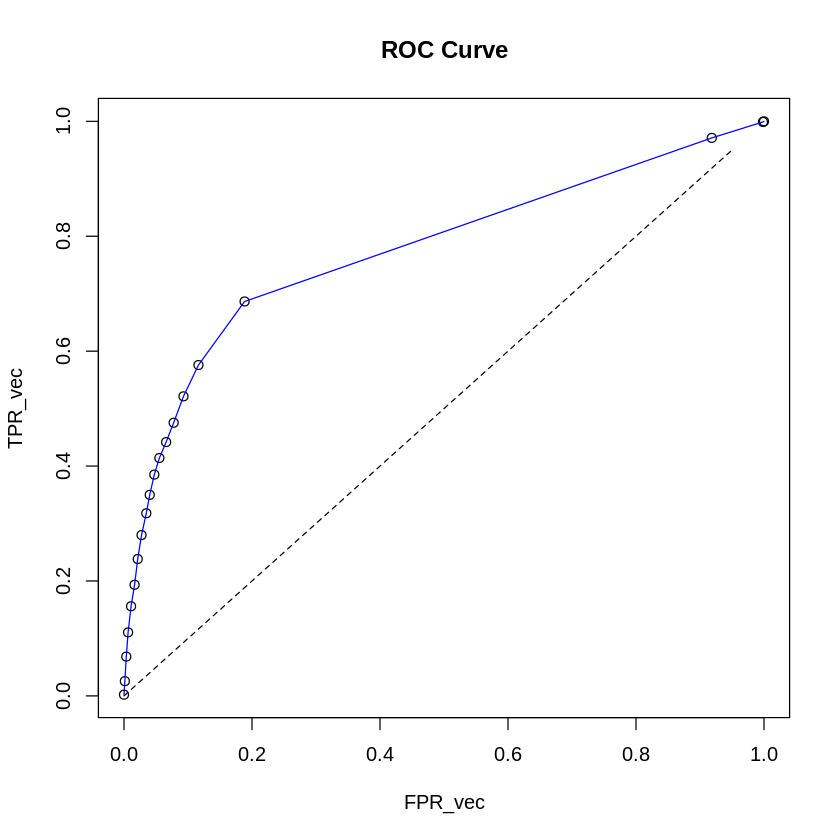

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['h1n1_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)

##### 5.4.1.2.4 Plot of PR curve

The PR curve is very important for unbalanced set as the one of the h1n1 label

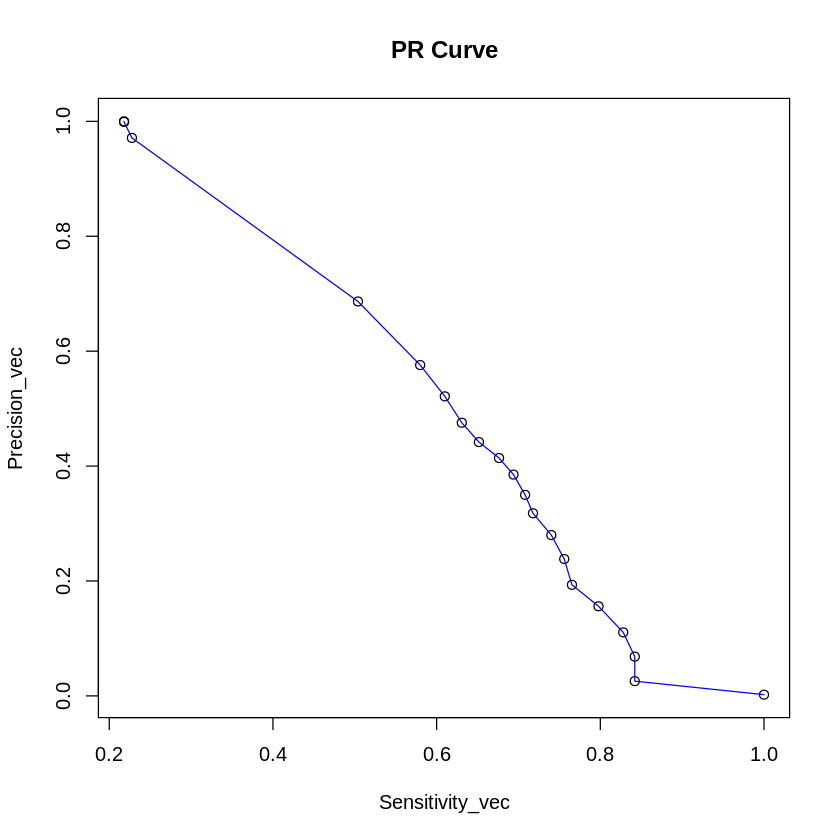

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['h1n1_vaccine']
plot_PR(Y_pred,Y)

#### 5.4.1.3 Applying on the seasonal_vaccine

In [ ]:
y <- train_cl[,'seasonal_vaccine'] 
y <- as.factor(y)
x <- train_scale


In [ ]:
svm_model2 <- svm(x,y, probability=TRUE)
summary(svm_model2)


Call:
svm.default(x = x, y = y, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  10614

 ( 5345 5269 )


Number of Classes:  2 

Levels: 
 0 1




##### 5.4.1.2.1 Probabilities on the validation set

In [ ]:
pred <- predict(svm_model2,test_scale, probability=TRUE)
pred_prob <- attr(pred, "probabilities")
head(pred_prob)

,0,1
2,0.7569235,0.24307653
5,0.9392174,0.06078261
6,0.2757141,0.72428588
8,0.8841661,0.11583391
13,0.0728116,0.92718840
16,0.6367416,0.36325837


##### 5.4.1.2.2 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'seasonal_vaccine']

table(pred,y_pred) #confusion matrix

    y_pred
pred    0    1
   0 3616 1130
   1  934 2906

##### 5.4.1.2.3 Plot of ROC curve

[1] 8586    1

[1] 8586    1

Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.retur

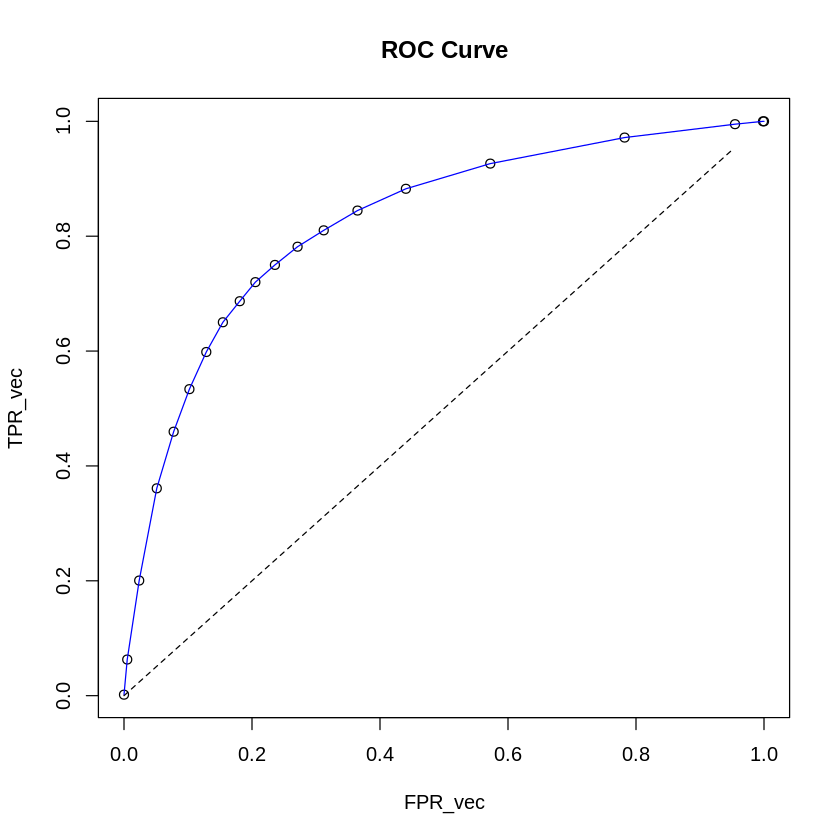

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['seasonal_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)

##### 5.4.1.2.4 Plot of PR curve

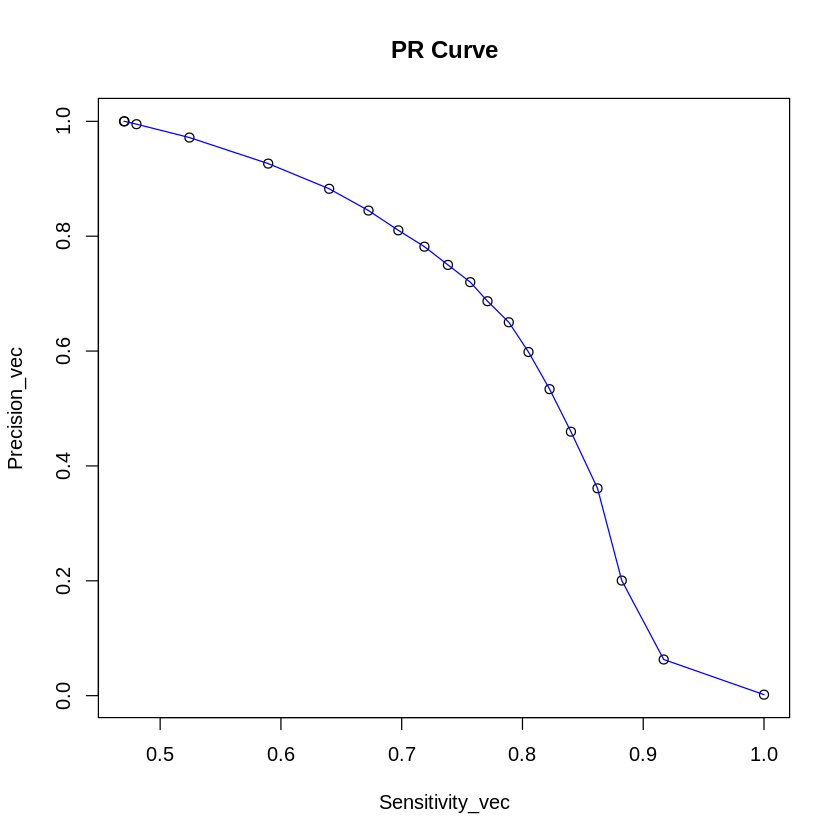

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['seasonal_vaccine']
plot_PR(Y_pred,Y)

### 5.4.2 SVM on the one hot dataset

The one hot dataset is the one on which we applied the onehot  encoding

#### 5.4.2.1 H1N1 vaccine

##### 5.4.2.1.1 Constructing the training and validation set

In [ ]:
#Remove the categorical variable
jointdataset <- cbind(df_train_mRMR_h1n1, df_train_labels)


In [ ]:
# Splitting data into train
# and test data
split <- sample.split(jointdataset, SplitRatio = 0.7)
train_cl <- subset(jointdataset, split == "TRUE")
test_cl <- subset(jointdataset, split == "FALSE")

In [ ]:
# Feature Scaling
label_vector <- c('h1n1_vaccine', 'seasonal_vaccine')
feature_col_len <- ncol(jointdataset) #remove the last 02 columns for the label and the respondent.id
feature_col_len <- feature_col_len - 3
train_scale <- train_cl[, 1:feature_col_len]
test_scale <- test_cl[, 1:feature_col_len]
head(test_scale, 2)
names(train_cl)

,doctor_recc_h1n1_1,doctor_recc_h1n1_0,opinion_h1n1_vacc_effective_5,opinion_h1n1_vacc_effective_4,opinion_h1n1_vacc_effective_3,opinion_h1n1_risk_1,opinion_h1n1_risk_4,opinion_h1n1_risk_5,opinion_h1n1_risk_2,opinion_seas_risk_1,⋯,"income_poverty_> $75,000",income_poverty_,behavioral_antiviral_meds_0,behavioral_antiviral_meds_1,employment_occupation_xgwztkwe,race_Black,race_White,education_12 Years,opinion_seas_3,education_< 12 Years
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,0,1,1,0,0,0,1,0,0,0,⋯,0,0,1,0,1,0,1,1,1,0
3,0,0,0,0,1,1,0,0,0,1,⋯,0,0,1,0,0,0,1,0,0,0


[1] "doctor_recc_h1n1_1"             "doctor_recc_h1n1_0"            
 [3] "opinion_h1n1_vacc_effective_5"  "opinion_h1n1_vacc_effective_4" 
 [5] "opinion_h1n1_vacc_effective_3"  "opinion_h1n1_risk_1"           
 [7] "opinion_h1n1_risk_4"            "opinion_h1n1_risk_5"           
 [9] "opinion_h1n1_risk_2"            "opinion_seas_risk_1"           
[11] "doctor_recc_seasonal_1"         "doctor_recc_seasonal_0"        
[13] "opinion_seas_vacc_effective_5"  "health_worker_1"               
[15] "health_worker_0"                "opinion_h1n1_vacc_effective_2" 
[17] "opinion_seas_risk_4"            "opinion_seas_risk_5"           
[19] "opinion_seas_risk_2"            "employment_industry_fcxhlnwr"  
[21] "opinion_seas_vacc_effective_4"  "opinion_seas_vacc_effective_2" 
[23] "opinion_h1n1_vacc_effective_1"  "employment_occupation_cmhcxjea"
[25] "opinion_h1n1_4"                 "opinion_h1n1_2"                
[27] "h1n1_knowledge_2"               "h1n1_knowledge_1"              
[29] "chronic_med_condition_1"        "chronic_med_condition_0"       
[31] "h1n1_knowledge_0"               "opinion_seas_4"                
[33] "h1n1_concern_3"                 "opinion_seas_vacc_effective_1" 
[35] "opinion_h1n1_sick_from_vacc_2"  "opinion_h1n1_sick_from_vacc_4" 
[37] "behavioral_wash_hands_0"        "behavioral_wash_hands_1"       
[39] "behavioral_touch_face_0"        "behavioral_touch_face_1"       
[41] "behavioral_face_mask_0"         "behavioral_face_mask_1"        
[43] "h1n1_concern_0"                 "h1n1_concern_1"                
[45] "employment_industry_haxffmxo"   "h1n1_concern_2"                
[47] "opinion_seas_2"                 "opinion_seas_vacc_effective_3" 
[49] "child_under_6_months_1"         "education_College Graduate"    
[51] "marital_status_"                "child_under_6_months_0"        
[53] "employment_occupation_dcjcmpih" "behaviors_1"                   
[55] "behaviors_0"                    "behavioral_avoidance_1"        
[57] "behavioral_avoidance_0"         "marital_status_Married"        
[59] "marital_status_Not Married"     "opinion_h1n1_sick_from_vacc_5" 
[61] "income_poverty_> $75,000"       "income_poverty_"               
[63] "behavioral_antiviral_meds_0"    "behavioral_antiviral_meds_1"   
[65] "employment_occupation_xgwztkwe" "race_Black"                    
[67] "race_White"                     "education_12 Years"            
[69] "opinion_seas_3"                 "education_< 12 Years"          
[71] "respondent_id"                  "h1n1_vaccine"                  
[73] "seasonal_vaccine"

In [ ]:
y <- train_cl[,'h1n1_vaccine']
y <- as.factor(y)
x <- train_scale

In [ ]:
svm_model1_h1n1_vaccine <- svm(x,y, probability=TRUE)
summary(svm_model1_h1n1_vaccine)


Call:
svm.default(x = x, y = y, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  8519

 ( 5045 3474 )


Number of Classes:  2 

Levels: 
 0 1




##### 5.4.2.1.2 Probabilities on the validation set

In [ ]:
pred <- predict(svm_model1_h1n1_vaccine,test_scale, probability=TRUE)
pred_prob <- attr(pred, "probabilities")
head(pred_prob)

,0,1
2,0.8958977,0.10410233
3,0.9137019,0.08629806
7,0.8942558,0.10574417
14,0.9077362,0.09226382
17,0.8135492,0.18645081
18,0.8710080,0.12899199


##### 5.4.2.1.3 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'h1n1_vaccine']
#y <- train_cl[feature_col_len+1]
table(pred,y_pred) #confusion matrix

    y_pred
pred    0    1
   0 6081 1001
   1  279  688

##### 5.4.2.1.4 Plot of ROC curve

[1] 8049    1

[1] 8049    1

Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.retur

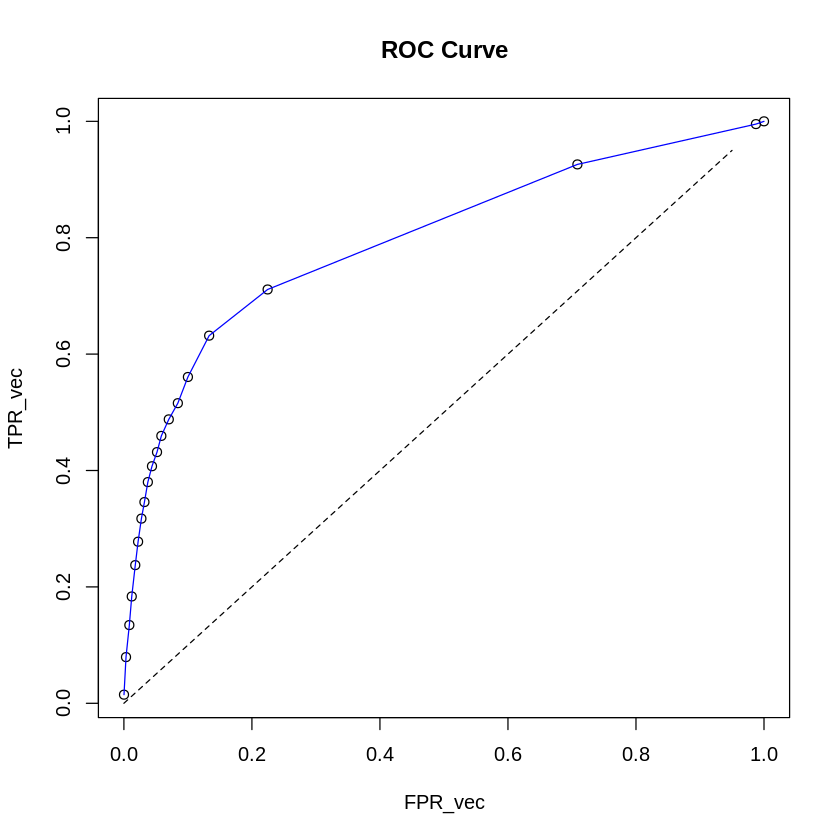

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['h1n1_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)

##### 5.4.2.1.5 Plot of PR curve

The PR curve is very important for unbalanced set as the one of the h1n1 label

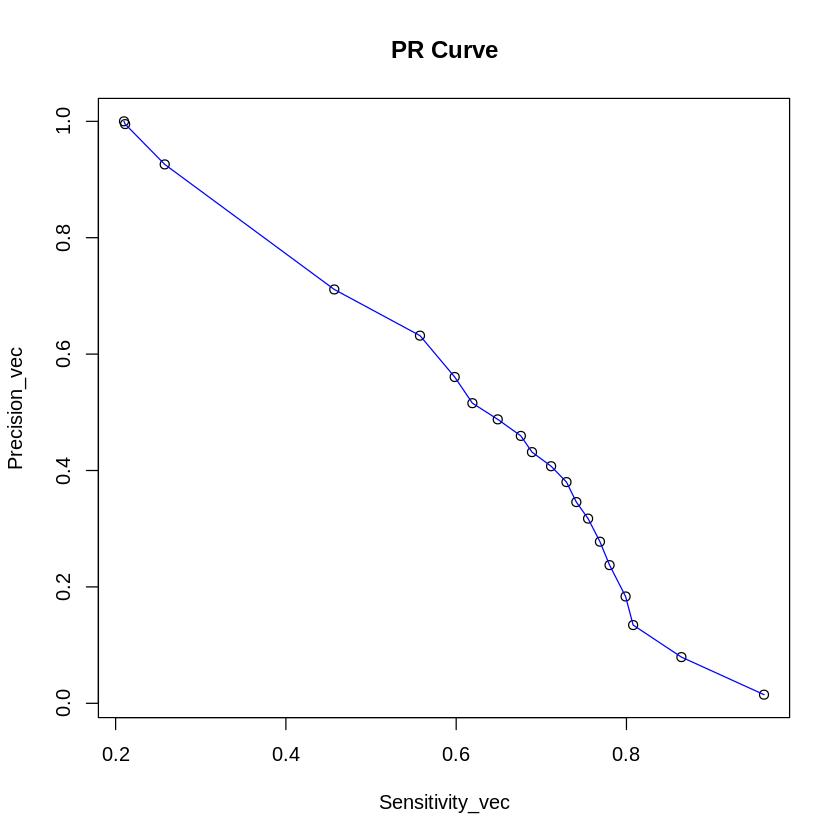

In [ ]:
Y_pred<- as.data.frame(pred_prob[,2])
Y<- test_cl['h1n1_vaccine']
plot_PR(Y_pred,Y)

#### 5.4.2.2 Seasonal vaccine

In [ ]:
jointdataset <- cbind(df_train_mRMR_seasonal, df_train_labels)


In [ ]:
# Splitting data into train
# and test data
split <- sample.split(jointdataset, SplitRatio = 0.7)
train_cl <- subset(jointdataset, split == "TRUE")
test_cl <- subset(jointdataset, split == "FALSE")

In [ ]:
# Feature Scaling
label_vector <- c('h1n1_vaccine', 'seasonal_vaccine')
feature_col_len <- ncol(jointdataset) #remove the last 02 columns for the label and the respondent.id
feature_col_len <- feature_col_len - 3
train_scale <- train_cl[, 1:feature_col_len]
test_scale <- test_cl[, 1:feature_col_len]
head(test_scale, 2)
names(train_cl)

,opinion_seas_vacc_effective_5,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_2,doctor_recc_seasonal_1,doctor_recc_seasonal_0,opinion_seas_risk_1,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_risk_2,age_group_65+ Years,⋯,employment_industry_rucpziij,h1n1_knowledge_0,employment_occupation_qxajmpny,behavioral_large_gatherings_0,behavioral_large_gatherings_1,employment_occupation_uqqtjvyb,marital_status_Married,household_children_3,household_children_1,household_children_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,1,1,0,0,0,0,⋯,0,1,0,1,0,0,0,0,0,0
8,0,1,0,0,1,0,0,0,1,0,⋯,0,1,0,1,0,0,1,0,0,0


[1] "opinion_seas_vacc_effective_5"       
 [2] "opinion_seas_vacc_effective_4"       
 [3] "opinion_seas_vacc_effective_2"       
 [4] "doctor_recc_seasonal_1"              
 [5] "doctor_recc_seasonal_0"              
 [6] "opinion_seas_risk_1"                 
 [7] "opinion_seas_risk_4"                 
 [8] "opinion_seas_risk_5"                 
 [9] "opinion_seas_risk_2"                 
[10] "age_group_65+ Years"                 
[11] "age_group_18 - 34 Years"             
[12] "doctor_recc_h1n1_1"                  
[13] "doctor_recc_h1n1_0"                  
[14] "opinion_h1n1_risk_1"                 
[15] "opinion_h1n1_risk_4"                 
[16] "opinion_h1n1_vacc_effective_5"       
[17] "opinion_seas_vacc_effective_1"       
[18] "chronic_med_condition_1"             
[19] "chronic_med_condition_0"             
[20] "behavioral_touch_face_0"             
[21] "behavioral_touch_face_1"             
[22] "health_worker_1"                     
[23] "employment_status_Not in Labor Force"
[24] "employment_status_Employed"          
[25] "household_children_0"                
[26] "age_group_35 - 44 Years"             
[27] "behavioral_wash_hands_0"             
[28] "behavioral_wash_hands_1"             
[29] "opinion_h1n1_vacc_effective_2"       
[30] "opinion_seas_vacc_effective_3"       
[31] "h1n1_knowledge_2"                    
[32] "health_worker_0"                     
[33] "h1n1_concern_0"                      
[34] "h1n1_knowledge_1"                    
[35] "employment_industry_fcxhlnwr"        
[36] "employment_occupation_"              
[37] "race_White"                          
[38] "rent_or_own_Rent"                    
[39] "rent_or_own_Own"                     
[40] "h1n1_concern_3"                      
[41] "h1n1_concern_2"                      
[42] "h1n1_concern_1"                      
[43] "opinion_h1n1_vacc_effective_1"       
[44] "employment_status_"                  
[45] "employment_occupation_cmhcxjea"      
[46] "employment_status_Unemployed"        
[47] "employment_industry_xicduogh"        
[48] "opinion_h1n1_risk_5"                 
[49] "behaviors_0"                         
[50] "behaviors_1"                         
[51] "sex_Male"                            
[52] "sex_Female"                          
[53] "behavioral_avoidance_1"              
[54] "behavioral_avoidance_0"              
[55] "race_Black"                          
[56] "age_group_45 - 54 Years"             
[57] "employment_industry_"                
[58] "opinion_seas_sick_from_vacc_1"       
[59] "race_Hispanic"                       
[60] "education_College Graduate"          
[61] "employment_industry_rucpziij"        
[62] "h1n1_knowledge_0"                    
[63] "employment_occupation_qxajmpny"      
[64] "behavioral_large_gatherings_0"       
[65] "behavioral_large_gatherings_1"       
[66] "employment_occupation_uqqtjvyb"      
[67] "marital_status_Married"              
[68] "household_children_3"                
[69] "household_children_1"                
[70] "household_children_2"                
[71] "respondent_id"                       
[72] "h1n1_vaccine"                        
[73] "seasonal_vaccine"

In [ ]:
y <- train_cl[,'seasonal_vaccine']
y <- as.factor(y)
x <- train_scale

In [ ]:
svm_model2_seasonal_vaccine <- svm(x,y, probability=TRUE)
summary(svm_model2_seasonal_vaccine)


Call:
svm.default(x = x, y = y, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  10435

 ( 5053 5382 )


Number of Classes:  2 

Levels: 
 0 1




##### 5.4.2.2.2 Probabilities on the validation set

In [ ]:
pred <- predict(svm_model2_seasonal_vaccine,test_scale, probability=TRUE)
pred_prob <- attr(pred, "probabilities")
head(pred_prob)

,1,0
1,0.04924095,0.95075905
8,0.17237442,0.82762558
9,0.28789948,0.71210052
14,0.12375327,0.87624673
17,0.92067343,0.07932657
18,0.34696883,0.65303117


##### 5.4.2.2.3 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'seasonal_vaccine']
#y <- train_cl[feature_col_len+1]
table(pred,y_pred) #confusion matrix

    y_pred
pred    0    1
   0 3454  999
   1  868 2729

##### 5.4.2.2.4 Plot of ROC curve

[1] 8050    1

[1] 8050    1

Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pracma’”
Loading required package: pracma

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.retur

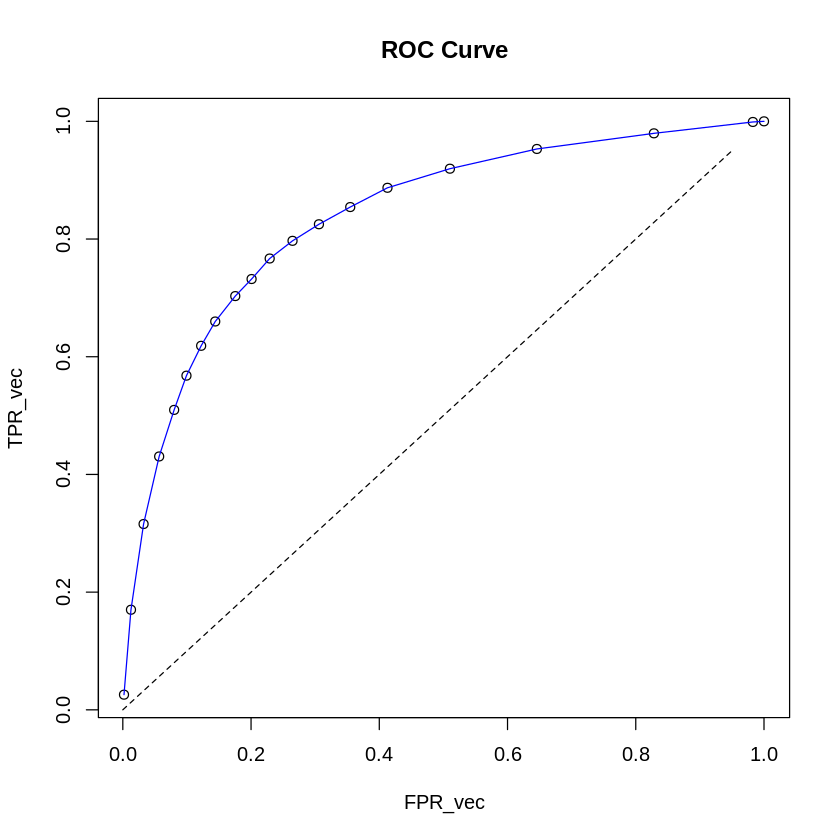

In [ ]:
Y_pred<- as.data.frame(pred_prob[,1])
Y<- test_cl['seasonal_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)

##### 5.4.2.2.5 Plot of PR curve

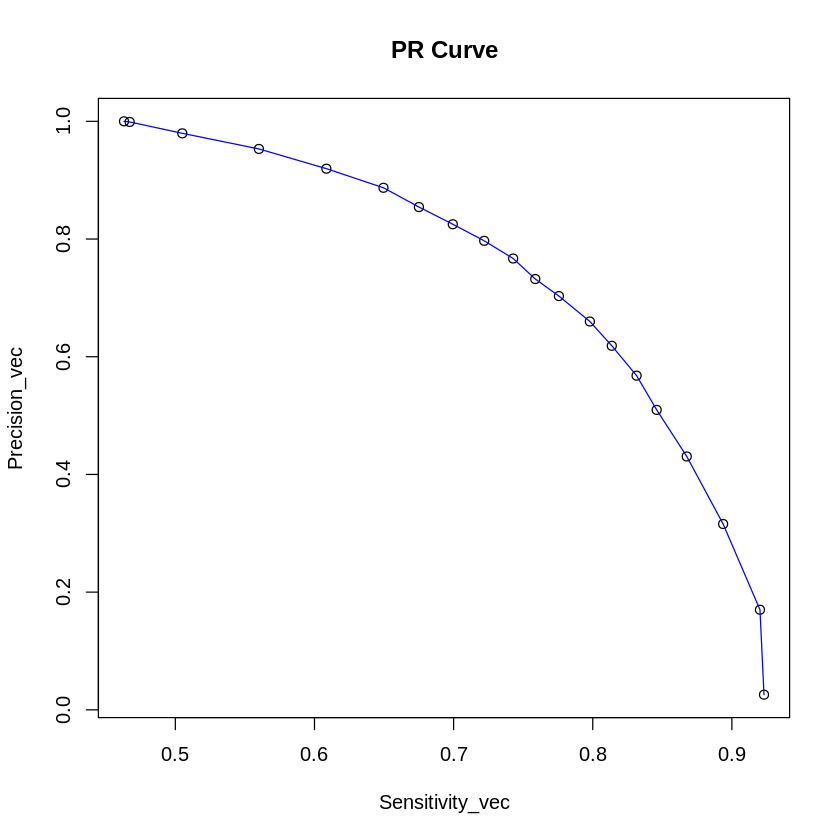

In [ ]:
Y_pred<- as.data.frame(pred_prob[,1])
Y<- test_cl['seasonal_vaccine']
plot_PR(Y_pred,Y)

### <font color="green">5.4.3 Apply on the testing set

#### <font color="green">5.4.3.1 Seasonal dataset</font>

* one encoded model

In [ ]:
pred_seasonal_onehot <- predict(svm_model2_seasonal_vaccine,df_test_mRMR_seasonal, probability=TRUE)
pred_prob <- attr(pred_seasonal_onehot, "probabilities")
dataframe_data <- as.data.frame(pred_prob)
#head(dataframe_data)
pred_seasonal_onehot_df <- as.data.frame(dataframe_data[,1]) 
colnames(pred_seasonal_onehot_df) <- c('seasonal_vaccine')
head(pred_seasonal_onehot_df, 5)

,1,0
,<dbl>,<dbl>
1,0.15533017,0.84466983
2,0.06258266,0.93741734
3,0.82754894,0.17245106
4,0.83499213,0.16500787
5,0.37026889,0.62973111
6,0.94229503,0.05770497


,seasonal_vaccine
,<dbl>
1,0.15533017
2,0.06258266
3,0.82754894
4,0.83499213
5,0.37026889


* mice model

In [ ]:
mice_final_test_set <- df_test_features_with_mice[,-c(1,factor_variables)]
head(mice_final_test_set, 1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,behaviors,opinion_h1n1,opinion_seas
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,2,0,1,0,1,1,0,1,0,⋯,1,1,5,1,1,1,0,1,4,4


In [ ]:
pred_seasonal <- predict(svm_model2,mice_final_test_set, probability=TRUE)
pred_prob <- attr(pred_seasonal, "probabilities")
dataframe_data <- as.data.frame(pred_prob)
pred_seasonal_df <- as.data.frame(dataframe_data[,2]) 
colnames(pred_seasonal_df) <- c('seasonal_vaccine')
head(pred_seasonal_df, 5)

,seasonal_vaccine
,<dbl>
1,0.2854736
2,0.1579346
3,0.7218053
4,0.8000261
5,0.6075931


#### <font color="green">5.4.3.2 H1N1 dataset</font>

* one hot encoded model

In [ ]:
pred_h1n1_onehot <- predict(svm_model1_h1n1_vaccine,df_test_mRMR_h1n1, probability=TRUE)
pred_prob <- attr(pred_h1n1_onehot, "probabilities")
dataframe_data <- as.data.frame(pred_prob)
pred_h1n1_onehot_df <- as.data.frame(dataframe_data[,2]) 
colnames(pred_h1n1_onehot_df) <- c('h1n1_vaccine')
head(pred_h1n1_onehot_df, 5)

,h1n1_vaccine
,<dbl>
1,0.09086713
2,0.11810362
3,0.31047426
4,0.69312251
5,0.33923016


* mice model

In [ ]:
pred_h1n1 <- predict(svm_model1,mice_final_test_set, probability=TRUE)
pred_prob <- attr(pred_h1n1, "probabilities")
dataframe_data <- as.data.frame(pred_prob)
pred_h1n1_df <- as.data.frame(dataframe_data[,2]) 
colnames(pred_h1n1_df) <- c('h1n1_vaccine')
head(pred_h1n1_df, 5)

,h1n1_vaccine
,<dbl>
1,0.1039707
2,0.1353022
3,0.1765350
4,0.6546898
5,0.2550650


#### <font color="green">5.4.3.3 Overall view of the dataset </font>

* onehot final

In [ ]:
final_onehot_df <- cbind(df_test_features_with_mice[ 'respondent_id'], pred_h1n1_onehot_df,pred_seasonal_onehot_df )
head(final_onehot_df, 5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<dbl>,<dbl>
1,26707,0.09086713,0.15533017
2,26708,0.11810362,0.06258266
3,26709,0.31047426,0.82754894
4,26710,0.69312251,0.83499213
5,26711,0.33923016,0.37026889


* mice final

In [ ]:
final_mice_df <- cbind(df_test_features_with_mice[ 'respondent_id'], pred_h1n1_df,pred_seasonal_df )
head(final_mice_df, 5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<dbl>,<dbl>
1,26707,0.1039707,0.2854736
2,26708,0.1353022,0.1579346
3,26709,0.1765350,0.7218053
4,26710,0.6546898,0.8000261
5,26711,0.2550650,0.6075931


#### <font color="green">5.4.3.4 Save to csv </font>

* one hot csv

In [ ]:
write.csv(final_onehot_df, "submission_svm_onehot.csv", row.names=FALSE)

* mice csv

In [ ]:
write.csv(final_mice_df, "submission_svm_mice.csv", row.names=FALSE)

## 5.5 MLP

For this model, we are going to use the onehot encoded data since this model works only with numerical values

The one hot dataset is the one on which we applied the onehot  encoding

MLP on the one hot dataset

In [ ]:
# Installing Packages
install.packages("RSNNS")
   
# Loading package
library(class)
library(RSNNS)


### 5.5.1 H1N1 vaccine

#### 5.5.1.1 Constructing the training and validation set

In [ ]:
# Creation of the complete dataset (feature + labels)
jointdataset <- cbind(df_train_mRMR_h1n1, df_train_labels)
head(jointdataset)

In [ ]:
# Splitting data into train
# and test data
split <- sample.split(jointdataset, SplitRatio = 0.7)
train_cl <- subset(jointdataset, split == "TRUE")
test_cl <- subset(jointdataset, split == "FALSE")

In [ ]:
# Feature Scaling
label_vector <- c('h1n1_vaccine')
feature_col_len <- ncol(jointdataset) #remove the last 3 columns for the label and the respondent.id
feature_col_len <- feature_col_len - 3
train_scale <- train_cl[, 1:feature_col_len]
test_scale <- test_cl[, 1:feature_col_len]
head(test_scale, 2)
names(train_cl)

In [ ]:
model_h1n1_vaccine <- mlp(train_scale,train_cl[,label_vector], 
              size=5, learnFuncParams=c(0.1), 
              maxit=50, hiddenActFunc="Act_Logistic", 
              outputActFunc="Act_Logistic", 
              inputsTest=test_scale, targetsTest=test_cl[,label_vector])

#### 5.5.1.2 Probabilities on the validation set

In [ ]:
predictions<-  predict(model_h1n1_vaccine,test_scale)
predictions

#### 5.5.1.3 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'h1n1_vaccine']
#y <- train_cl[feature_col_len+1]
table(predictions,y_pred) #confusion matrix

#### 5.5.1.4 Plot of ROC curve

In [ ]:
Y_pred<- as.data.frame(predictions) #as.data.frame(predictions[,2])
Y<- test_cl['h1n1_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)


#### 5.5.1.5 Plot of PR curve

The PR curve is very important for unbalanced set as the one of the h1n1 label

In [ ]:
Y_pred<- as.data.frame(predictions) #as.data.frame(pred_prob[,2])
Y<- test_cl['h1n1_vaccine']
plot_PR(Y_pred,Y)

### 5.5.2 Seasonal vaccine

In [ ]:
jointdataset <- cbind(df_train_mRMR_seasonal, df_train_labels)


In [ ]:
# Splitting data into train
# and test data
split <- sample.split(jointdataset, SplitRatio = 0.7)
train_cl <- subset(jointdataset, split == "TRUE")
test_cl <- subset(jointdataset, split == "FALSE")

In [ ]:
# Feature Scaling
label_vector <- c('seasonal_vaccine')
feature_col_len <- ncol(jointdataset) #remove the last 02 columns for the label and the respondent.id
feature_col_len <- feature_col_len - 3
train_scale <- train_cl[, 1:feature_col_len]
test_scale <- test_cl[, 1:feature_col_len]
head(test_scale, 2)
names(train_cl)

In [ ]:
 model_seasonal_vaccine <- mlp(train_scale,train_cl[,label_vector], 
              size=5, learnFuncParams=c(0.1), 
              maxit=50, hiddenActFunc="Act_Logistic", 
              outputActFunc="Act_Logistic", 
              inputsTest=test_scale, targetsTest=test_cl[,label_vector])

#### 5.5.2.1 Probabilities on the validation set

In [ ]:
predictions<-  predict(model_seasonal_vaccine,test_scale)
head(predictions)

#### 5.5.2.2 Confusion Matrix

In [ ]:
y_pred <- test_cl[,'seasonal_vaccine']
table(predictions,y_pred)

#### 5.5.2.3 Plot of ROC curve

In [ ]:
Y_pred<- as.data.frame(predictions)
Y<- test_cl['seasonal_vaccine']
dim(Y_pred)
dim(Y)
plot_ROC(Y_pred,Y)


#### 5.5.2.4 Plot of PR curve

In [ ]:
Y_pred<- as.data.frame(predictions)
Y<- test_cl['seasonal_vaccine']
plot_PR(Y_pred,Y)

### <font color="green">5.5.3 Apply on the testing set

#### <font color="green">5.5.3.1 Seasonal dataset</font>

* one encoded model

In [ ]:
pred_seasonal_onehot <- predict(model_seasonal_vaccine,df_test_mRMR_seasonal, probability=TRUE)
#pred_prob <- attr(pred_seasonal_onehot, "probabilities")
#dataframe_data <- as.data.frame(pred_prob)
dataframe_data <- as.data.frame(pred_seasonal_onehot)
pred_seasonal_onehot_df <- as.data.frame(dataframe_data[,1]) 
colnames(pred_seasonal_onehot_df) <- c('seasonal_vaccine')
head(pred_seasonal_onehot_df, 5)

#### <font color="green">5.5.3.2 H1N1 dataset</font>

* one hot encoded model

In [ ]:
pred_h1n1_onehot <- predict(model_h1n1_vaccine,df_test_mRMR_h1n1, probability=TRUE)
#pred_prob <- attr(pred_h1n1_onehot, "probabilities")
#dataframe_data <- as.data.frame(pred_prob)
dataframe_data <- as.data.frame(pred_h1n1_onehot)
pred_h1n1_onehot_df <- as.data.frame(dataframe_data) 
colnames(pred_h1n1_onehot_df) <- c('h1n1_vaccine')
head(pred_h1n1_onehot_df, 5)

#### <font color="green">5.5.3.3 Overall view of the dataset </font>

* onehot final

In [ ]:
final_onehot_df <- cbind(df_test_features_with_mice[ 'respondent_id'], pred_h1n1_onehot_df,pred_seasonal_onehot_df )
head(final_onehot_df, 5)

#### <font color="green">5.5.3.4 Save to csv </font>

* one hot csv

In [ ]:
write.csv(final_onehot_df, "submission_MLP_onehot.csv", row.names=FALSE)

# 6.OTHER MODELS

## 6.1 Neaural Network with PCA

### 6.1.1 h1n1

In [ ]:
# Dataset result of mRMR applied to h1n1

dataset<-X_PCA_train_h1n1  

# Output: labels of h1n1

Y<-df_train_labels[,2]  

# Creation of a complete dataset (features + Output)

complete_set<-cbind(dataset,h1n1=Y)

# Dimension parameters

N<-nrow(dataset)
n<-ncol(dataset)



head(complete_set)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,h1n1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-0.20328269,-0.06894103,-0.155777845,0.25242657,-0.06971625,0.1948388,0.05142186,-0.2856737,0.3380586,0
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,-0.01714583,0.15873955,-0.060636987,-0.13854293,-0.45340568,-0.5577081,-0.39491714,-0.6926476,0.3863742,0
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,-0.06738864,-0.21523263,0.062686805,-0.02090873,-0.30554022,-0.5626234,0.44451689,0.3142176,-0.2839355,0
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,0.70154282,-0.00458771,0.005408905,0.33790379,-0.55334451,0.3501466,-0.16343472,-0.3004997,-0.4156425,0
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-0.24879090,-0.05578605,-0.140938571,0.18720007,0.27190670,-0.1457682,-0.60041833,-0.4915466,-0.3452240,0
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,-0.07583087,-0.69276474,-0.374838617,-0.50510968,-0.29317742,0.1127710,-0.31550671,0.7410943,-0.3106621,0


#### 6.1.1.1 Creation of training_set and validation_set  (50% - 50% division)

In [ ]:
# Number of rows of train_set

N1<-floor(N/2)  

# Number of rows of validation set

N2<-N-N1  

# Assess the index of the output in the complete_set

n<-ncol(complete_set)

# Sample of the dataset to avoid order correlation

complete_set<-complete_set[sample(N,N),]    





                               # TRAINING_SET (train_set)

# first half of dataset=train_set

train_set<-complete_set[seq(1,N1),]         

# Rename the rows

rownames(train_set)<-seq(1,N1)              



                            # VALIDATION_SET (  val_set,  val_features,  val_Y  )

# Second half of dataset=validation_set

val_set<-complete_set[-seq(1,N1),]         

rownames(val_set)<-seq(1,N2)     

respondent_id_val<-val_set[,1]

# Isolation of features and output from the validation set

val_features<-val_set[,-n]                  

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("h1n1")

In [ ]:
# Table representation of trainin_set and validation_sets

head(train_set)
head(val_features)
head(val_Y)
head(val_set)

#### 6.1.1.2 Tune of Neural Network

Implementation of internal Cross_validation to assess the best number of units in the hidden layer (Using the train_set)</br>
</br>

1. Split the dataset into K groups
</br>

2. Creation of hidden_nodes vector
</br>

3. For each value (number) in hidden_nodes vector
  
   3.A. Creation of nnet model with size=number </br>
   
   3.B. Prediction on the train_set (without the output) --> Sample_error</br>
   
   3.C. Prediction on the val_features --> Out_of_sample_error </br>
   
   3.D. Internal Cross_validation (on the train_set) --> Cross_validation_error</br>
   </br>
4. Table the results 



In [ ]:
 # 1. SPLIT THE DATASET INTO K GROUPS

# Number of groups

K<-5   

# Creation of groups

max <- ceiling(nrow(train_set)/K)

idx<-seq(1,nrow(train_set))

groups <- split(idx, ceiling(seq_along(idx)/max))

                                 


                                # 2. CREATION OF HIDDEN_NODES VECTOR

hidden_nodes<-c(1,2,3)




Sample_error<-c()

Out_of_sample_error<-c()

Internal_Cross_validation_error<-c()

target_variable<-ncol(train_set)


                               # 3. FOR EACH NUMBER IN HIDDEN_NODES

for (number in hidden_nodes)
    {
    
                               # 3.A. CREATION OF NNET MODEL WITH SIZE=NUMBER
    
    model <- nnet(h1n1~., data=train_set, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

                               # 3.B. PREDICTION ON THE TRAIN_SET (WITHOUT THE OUTPUT)
    
    Y_pred_train<-predict(model,train_set[,-target_variable])

                               # 3.C. PREDICTION ON THE VAL_FEATURES
    
    Y_pred_test<-predict(model,val_features)
    
    
    
    # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,1])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,1])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
                  
                  
                                # 3.D. INTERNAL CROSS_VALIDATION (ON THE TRAIN_SET)
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(h1n1~., data=training, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions)^2))
        
        
        
         
  
     }
Internal_Cross_validation_error<-c(Internal_Cross_validation_error,mean(MSE))


    
}

                            # 4. TABLE THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Internal_Cross_validation_error)

rownames(result)<-hidden_nodes


# weights:  143
initial  value 3699.804698 
iter  10 value 2533.540674
iter  20 value 2335.110160
iter  30 value 2242.365373
iter  40 value 2209.662346
iter  50 value 2179.260715
iter  60 value 2135.714656
iter  70 value 2120.761729
iter  80 value 2104.353846
iter  90 value 2079.076968
iter 100 value 2051.343235
iter 110 value 2032.255627
iter 120 value 2008.230896
iter 130 value 1985.869145
iter 140 value 1924.082142
iter 150 value 1869.736430
iter 160 value 1693.709526
iter 170 value 1569.439990
iter 180 value 1544.479687
iter 190 value 1542.531251
iter 200 value 1540.619711
iter 210 value 1539.182443
iter 220 value 1536.937662
iter 230 value 1534.947553
iter 240 value 1533.054600
iter 250 value 1530.501914
iter 260 value 1528.003919
iter 270 value 1525.914717
iter 280 value 1524.827051
iter 290 value 1523.569195
iter 300 value 1522.961638
iter 310 value 1522.846478
iter 320 value 1522.698148
iter 330 value 1522.555585
iter 340 value 1522.308838
iter 350 value 1522.069059
iter 360 va

Table output:
- rows= size of the Artificial Neural Network
- columns= "Sample_error" , "Out_of_sample_error","Internal-Cross_validation_error"

In [ ]:
result

,Sample_error,Out_of_sample_error,Internal_Cross_validation_error
,<dbl>,<dbl>,<dbl>
1,0.1135612,0.1221999,0.1204078
2,0.1110473,0.1251044,0.1412115
3,0.1296242,0.1696280,0.1593865


From the result above, the best number of units in the hidden layer seems to be 1

#### 6.1.1.3 Evaluation of the model

##### 6.1.1.3.1 External Cross validation to evaluate the MISE (Using the val_set)

In [ ]:
                       #CREATION OF GROUPS
# number of groups
 
K<-5   
    
# Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)

idx<-seq(1,nrow(val_set))

groups <- split(idx, ceiling(seq_along(idx)/max))


# Assess the index of the output

target_variable<-ncol(val_set)


    
                                        # CROSS VALIDATION
    
MISE<-c()   

for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(h1n1~., data=training, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-mean((test[,target_variable]-predictions)^2)
        
         MISE<-c(MISE,MSE)     
         
  
     }

MISE<-mean(MISE)

result1<-data.frame(MISE)


# weights:  143
initial  value 3627.120602 
iter  10 value 1986.864876
iter  20 value 1892.693784
iter  30 value 1860.911079
iter  40 value 1839.902110
iter  50 value 1830.208751
iter  60 value 1818.837091
iter  70 value 1810.839596
iter  80 value 1805.156919
iter  90 value 1795.691019
iter 100 value 1781.239203
iter 110 value 1760.649452
iter 120 value 1743.195313
iter 130 value 1721.804493
iter 140 value 1696.505659
iter 150 value 1684.706729
iter 160 value 1672.549780
iter 170 value 1655.321519
iter 180 value 1638.359480
iter 190 value 1629.257092
iter 200 value 1589.002014
iter 210 value 1529.947418
iter 220 value 1484.570115
iter 230 value 1329.605688
iter 240 value 1256.708247
iter 250 value 1254.227596
iter 260 value 1253.770260
iter 270 value 1252.127791
iter 280 value 1251.136277
iter 290 value 1249.994229
iter 300 value 1249.204268
iter 310 value 1248.196216
iter 320 value 1246.528848
iter 330 value 1243.607024
iter 340 value 1240.571196
iter 350 value 1238.919384
iter 360 va

Complete table result for Generalization error (size=1)

In [ ]:
Generalization_error_result<-cbind(result[1,],result1)
Generalization_error_result

,Sample_error,Out_of_sample_error,Internal_Cross_validation_error,MISE
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1135612,0.1221999,0.1204078,0.1232202


##### 6.1.1.3.2 Classification accuracy

A. ROC curve

B. PR curve

###### 6.1.1.3.2.1 ROC curve

1. Create the NN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the True Positive Rate (TPR=TP/N_P)  and the False Positive Rate (FPR=FP/N_N) 
     
  C.  Add TPR to TPR_vec and FPR to FPR_vec 
         


4. Plot y=TPR  x=FPR


In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of TPR_vec and FPR_vec

TPR_vec <- c()
FPR_vec <- c()


                              # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(h1n1~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                              # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                              # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   FP <- confusion_matrix[2,1]
    
   TP <- confusion_matrix[2,2]
    
   N_N <- sum(confusion_matrix[,1]) 
    
   N_P <- sum(confusion_matrix[,2]) 
  
   # C. Add TPR to TPR_vec, FPR to FPR_vec
    
   TPR_vec <- c(TPR_vec,TP/N_P)
    
   FPR_vec <- c(FPR_vec,FP/N_N)
}
    

# weights:  143
initial  value 5604.935371 
iter  10 value 2598.019419
iter  20 value 2519.309083
iter  30 value 2479.496513
iter  40 value 2455.428646
iter  50 value 2437.708145
iter  60 value 2415.047422
iter  70 value 2392.545388
iter  80 value 2362.903157
iter  90 value 2352.641470
iter 100 value 2342.576709
iter 110 value 2325.282718
iter 120 value 2263.736609
iter 130 value 2216.043006
iter 140 value 2182.106432
iter 150 value 2145.941042
iter 160 value 2110.861387
iter 170 value 2083.680041
iter 180 value 2075.503360
iter 190 value 2063.501807
iter 200 value 2043.440527
iter 210 value 2029.913234
iter 220 value 2019.853305
iter 230 value 1908.049019
iter 240 value 1689.328821
iter 250 value 1576.132155
iter 260 value 1547.380655
iter 270 value 1544.803471
iter 280 value 1544.675077
iter 290 value 1544.383364
iter 300 value 1543.706360
iter 310 value 1543.440698
iter 320 value 1542.417586
iter 330 value 1540.717509
iter 340 value 1538.052362
iter 350 value 1535.575379
iter 360 va

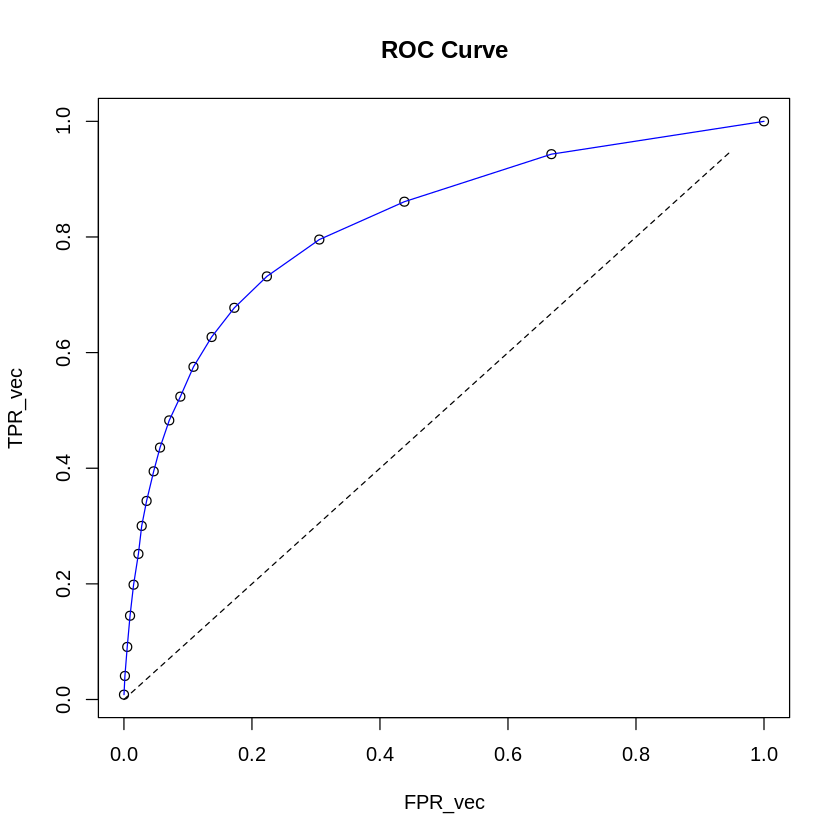

In [ ]:
# 4. PLOT OF ROC CURVE 
plot(FPR_vec,TPR_vec)

lines(FPR_vec,TPR_vec,col="blue")

lines(thresholds,thresholds,lty=2)

title("ROC Curve")

######  6.1.1.3.2.2 PR curve

Since the h1n1 output is really unbalanced, we prefered to plot the PR curve instead of the ROC curve.
  
1. Create the ANN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the Precision (TP/(TP+FN))  and the Sensitivity (TPR=TP/(TP+FP)) 
     
  C.  Add Precision to Precision_vec and Sensitivity to Sensitivity_vec 
         


4. Plot y=Precision_vec  x=Sensitivity_vec

In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()


                            # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(h1n1~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                            # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                            # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   TP <- confusion_matrix[2,2] 
    
   FN <- confusion_matrix[1,2] 
    
   FP <- confusion_matrix[2,1]
   
  
   # C. Add precision and sensitivity to their vectors
    
   Precision_vec <- c(Precision_vec,TP/(TP+FN))
    
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}

# weights:  143
initial  value 4488.890264 
iter  10 value 2532.641664
iter  20 value 2491.535886
iter  30 value 2413.755817
iter  40 value 2367.502591
iter  50 value 2291.559826
iter  60 value 2243.980293
iter  70 value 2199.331789
iter  80 value 2165.731673
iter  90 value 2111.818917
iter 100 value 2085.471670
iter 110 value 2074.485355
iter 120 value 2067.758102
iter 130 value 2051.807817
iter 140 value 2026.936915
iter 150 value 1996.274192
iter 160 value 1969.373135
iter 170 value 1949.175794
iter 180 value 1943.763212
iter 190 value 1939.324393
iter 200 value 1936.590101
iter 210 value 1933.477134
iter 220 value 1930.469754
iter 230 value 1925.705612
iter 240 value 1922.653043
iter 250 value 1919.599199
iter 260 value 1918.718214
iter 270 value 1917.382691
iter 280 value 1916.087086
iter 290 value 1915.374312
iter 300 value 1914.917516
iter 310 value 1913.676729
iter 320 value 1911.257627
iter 330 value 1909.481115
iter 340 value 1908.185544
iter 350 value 1907.345933
iter 360 va

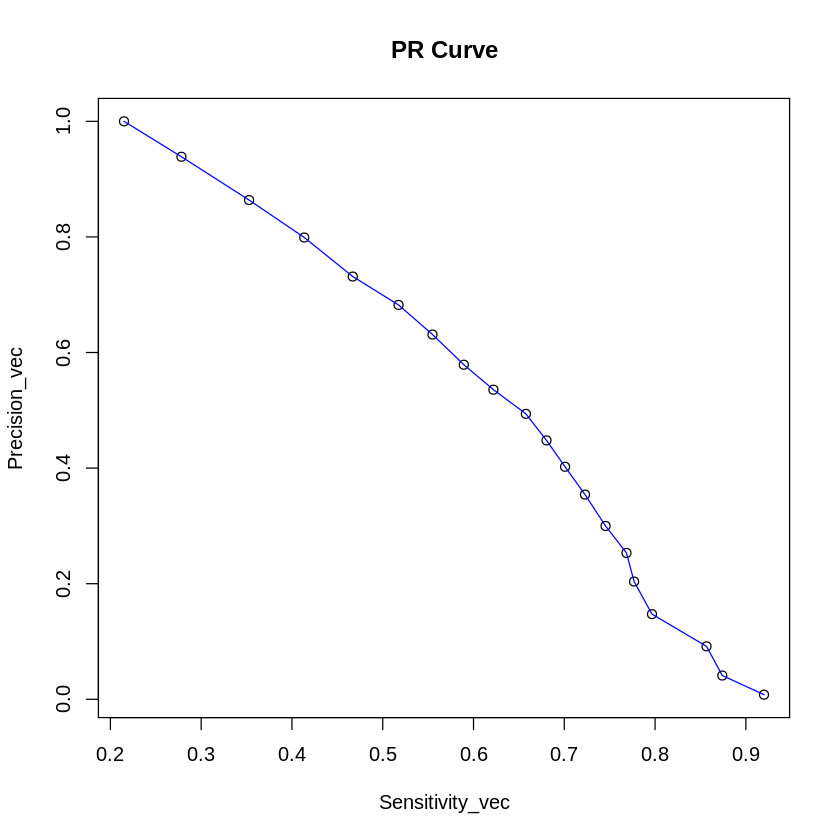

In [ ]:
                        # 4. PLOT OF ROC CURVE 
plot(Sensitivity_vec,Precision_vec)

lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

### 6.1.2 - Seasonal

In [ ]:
# Dataset result of mRMR applied to h1n1

dataset<-X_PCA_train_seasonal 

# Output: labels of h1n1

Y<-df_train_labels[,3]  

# Creation of a complete dataset (features + Output)

complete_set<-cbind(dataset,seasonal=Y)

# Dimension parameters

N<-nrow(dataset)
n<-ncol(dataset)



head(complete_set)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,seasonal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-0.20328269,-0.06894103,-0.155777845,0.25242657,-0.06971625,0.1948388,0.05142186,-0.2856737,0.3380586,0
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,-0.01714583,0.15873955,-0.060636987,-0.13854293,-0.45340568,-0.5577081,-0.39491714,-0.6926476,0.3863742,1
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,-0.06738864,-0.21523263,0.062686805,-0.02090873,-0.30554022,-0.5626234,0.44451689,0.3142176,-0.2839355,0
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,0.70154282,-0.00458771,0.005408905,0.33790379,-0.55334451,0.3501466,-0.16343472,-0.3004997,-0.4156425,1
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-0.24879090,-0.05578605,-0.140938571,0.18720007,0.27190670,-0.1457682,-0.60041833,-0.4915466,-0.3452240,0
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,-0.07583087,-0.69276474,-0.374838617,-0.50510968,-0.29317742,0.1127710,-0.31550671,0.7410943,-0.3106621,0


#### 6.1.2.1 Creation of training_set and validation_set  (50% - 50% division)

In [ ]:
# Number of rows of train_set

N1<-floor(N/2)  

# Number of rows of validation set

N2<-N-N1  

# Assess the index of the output in the complete_set

n<-ncol(complete_set)

# Sample of the dataset to avoid order correlation

complete_set<-complete_set[sample(N,N),]    





                               # TRAINING_SET (train_set)

# first half of dataset=train_set

train_set<-complete_set[seq(1,N1),]         

# Rename the rows

rownames(train_set)<-seq(1,N1)              





                            # VALIDATION_SET (  val_set,  val_features,  val_Y  )

# Second half of dataset=validation_set

val_set<-complete_set[-seq(1,N1),]         

rownames(val_set)<-seq(1,N2)     

respondent_id_val<-val_set[,1]

# Isolation of features and output from the validation set

val_features<-val_set[,-n]                  

val_Y<-data.frame(val_set[,n])

colnames(val_Y)<-c("seasonal")

In [ ]:
# Table representation of trainin_set and validation_sets

head(train_set)
head(val_features)
head(val_Y)
head(val_set)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,seasonal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.5058963,0.30645188,0.4524326,1.4371407,0.5964150,0.3023951,0.5326040,0.69575076,-0.6780624,1.1093462,⋯,-0.20776695,-0.12237898,0.4507741176,-0.07919706,0.136825961,0.06936049,-0.02514935,0.12082321,0.16112085,0
2,1.5142032,-0.09541583,1.1626843,1.1220639,0.2259057,0.7210342,0.2267903,0.09025352,0.5268705,-0.4716627,⋯,-0.11782943,0.09662365,0.0007231794,0.02037971,-0.163560851,0.01876367,-0.01268031,-0.22414942,0.12119652,0
3,-0.4580549,2.19232677,0.3783220,0.4862771,-1.5866906,0.8356980,0.2369441,0.68439505,-0.7054723,0.5119435,⋯,-0.04734448,0.16153165,0.0675247095,-0.04255504,-0.164996937,0.09707538,-0.15569770,-0.08976792,0.08660137,1
4,-0.8830010,2.25226252,-0.7509097,-1.3570236,1.4876485,-0.5297983,-0.4743960,0.03778530,-0.4107196,-0.8209750,⋯,-0.34203053,0.18308096,0.4963425258,-0.15392398,0.031100956,-0.17029858,-0.56175057,-0.02133435,-0.02370511,1
5,0.2636722,-0.22963227,-0.8654571,0.3408978,0.3953266,-1.7535390,0.9805159,1.21567514,-1.4204839,-0.5521037,⋯,1.11832207,-0.20125448,-0.2163406897,0.13679061,0.007616483,-0.02736822,0.02553237,-0.10531849,0.20643453,1
6,-1.6792986,-0.09168959,0.4592859,0.9973412,-1.4426469,0.2562346,0.2925760,0.24780139,-0.1859703,0.7490867,⋯,-0.20232822,-0.02463537,0.0053014015,0.02953494,-0.845340633,0.13502370,-0.04739036,-0.03067075,0.17084414,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.34948154,-2.0698278,0.8326512,-0.2771347,0.04776842,-0.5899343,-0.9406351,1.07306571,-0.5198708,0.7158933,⋯,-0.29156776,-0.29558574,-0.1906919,-0.31580283,0.44145540,0.49025929,0.31186413,0.629108082,-0.53563011,-0.14056333
2,-0.05882201,-0.5250893,-2.4058415,0.5143477,0.53193250,-0.7936661,-1.7577053,-0.70233903,0.2956982,0.1571644,⋯,0.01563819,0.06135904,0.2196769,-0.07235089,0.01138054,-0.07662326,0.03852291,-0.266839462,0.07173719,0.06108908
3,-1.65168519,0.8677269,-0.0955829,0.6901899,-1.49840238,-0.4955686,0.3575790,-0.99946749,0.6013370,-0.1690005,⋯,0.44068455,-0.34195594,-0.3034547,-0.12061835,0.33806673,-0.19944670,-0.12213261,-0.221954514,0.24639797,-0.05675354
4,-1.28379613,1.2356915,1.0545127,0.9029046,0.19082081,1.1069044,-0.3574401,0.25577383,-0.2148081,0.5120328,⋯,0.13017792,-0.28080535,-0.1560048,-0.18569702,0.30519967,-0.42196528,-0.55662539,-0.114236103,0.41971101,-0.84722899
5,-0.63563693,-2.2840169,0.4528713,-1.1029633,1.10521365,0.3862308,0.2691253,0.06946264,0.3254045,-0.4539938,⋯,0.03436222,-0.53419410,0.3394294,-0.06228976,0.15652812,-0.48521155,0.21042847,0.003068188,-0.02116142,0.24803313
6,1.63572854,0.4503323,-0.1880773,0.9349602,-0.13701099,0.5656523,-1.4355360,0.41542147,-0.1816593,-0.2712960,⋯,0.43944005,-0.04831162,-0.5685546,-0.40383195,-0.49603930,0.10145491,-0.51439120,0.366294870,-0.36736096,-0.34437685


,seasonal
,<int>
1,0
2,1
3,0
4,0
5,0
6,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,seasonal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.34948154,-2.0698278,0.8326512,-0.2771347,0.04776842,-0.5899343,-0.9406351,1.07306571,-0.5198708,0.7158933,⋯,-0.29558574,-0.1906919,-0.31580283,0.44145540,0.49025929,0.31186413,0.629108082,-0.53563011,-0.14056333,0
2,-0.05882201,-0.5250893,-2.4058415,0.5143477,0.53193250,-0.7936661,-1.7577053,-0.70233903,0.2956982,0.1571644,⋯,0.06135904,0.2196769,-0.07235089,0.01138054,-0.07662326,0.03852291,-0.266839462,0.07173719,0.06108908,1
3,-1.65168519,0.8677269,-0.0955829,0.6901899,-1.49840238,-0.4955686,0.3575790,-0.99946749,0.6013370,-0.1690005,⋯,-0.34195594,-0.3034547,-0.12061835,0.33806673,-0.19944670,-0.12213261,-0.221954514,0.24639797,-0.05675354,0
4,-1.28379613,1.2356915,1.0545127,0.9029046,0.19082081,1.1069044,-0.3574401,0.25577383,-0.2148081,0.5120328,⋯,-0.28080535,-0.1560048,-0.18569702,0.30519967,-0.42196528,-0.55662539,-0.114236103,0.41971101,-0.84722899,0
5,-0.63563693,-2.2840169,0.4528713,-1.1029633,1.10521365,0.3862308,0.2691253,0.06946264,0.3254045,-0.4539938,⋯,-0.53419410,0.3394294,-0.06228976,0.15652812,-0.48521155,0.21042847,0.003068188,-0.02116142,0.24803313,0
6,1.63572854,0.4503323,-0.1880773,0.9349602,-0.13701099,0.5656523,-1.4355360,0.41542147,-0.1816593,-0.2712960,⋯,-0.04831162,-0.5685546,-0.40383195,-0.49603930,0.10145491,-0.51439120,0.366294870,-0.36736096,-0.34437685,0


#### 6.1.2.2 Tune of Neural Network

Implementation of internal Cross_validation to assess the best number of units in the hidden layer (Using the train_set)</br>
</br>

1. Split the dataset into K groups
</br>

2. Creation of hidden_nodes vector
</br>

3. For each value (number) in hidden_nodes vector
  
   3.A. Creation of nnet model with size=number </br>
   
   3.B. Prediction on the train_set (without the output) --> Sample_error</br>
   
   3.C. Prediction on the val_features --> Out_of_sample_error </br>
   
   3.D. Internal Cross_validation (on the train_set) --> Cross_validation_error</br>
   </br>
4. Table the results 


In [ ]:
  # 1. SPLIT THE DATASET INTO K GROUPS

# Number of groups

K<-5   

# Creation of groups

max <- ceiling(nrow(train_set)/K)

idx<-seq(1,nrow(train_set))

groups <- split(idx, ceiling(seq_along(idx)/max))

                                 


                                # 2. CREATION OF HIDDEN_NODES VECTOR

hidden_nodes<-c(1,2,3)




Sample_error<-c()

Out_of_sample_error<-c()

Internal_Cross_validation_error<-c()

target_variable<-ncol(train_set)


                               # 3. FOR EACH NUMBER IN HIDDEN_NODES

for (number in hidden_nodes)
    {
    
                               # 3.A. CREATION OF NNET MODEL WITH SIZE=NUMBER
    
    model <- nnet(seasonal~., data=train_set, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

                               # 3.B. PREDICTION ON THE TRAIN_SET (WITHOUT THE OUTPUT)
    
    Y_pred_train<-predict(model,train_set[,-target_variable])

                               # 3.C. PREDICTION ON THE VAL_FEATURES
    
    Y_pred_test<-predict(model,val_features)
    
    
    
    # Evaluation of MSE in_sample
    
    MSE_sample<-mean((train_set[,target_variable]-Y_pred_train[,1])^2)
    
    # Evaluation of MSE out_sample
    
    MSE_out_of_sample<-mean((val_Y[,1]-Y_pred_test[,1])^2)
    
    
    
    Sample_error<-c(Sample_error,MSE_sample)
    
    Out_of_sample_error<-c(Out_of_sample_error,MSE_out_of_sample)
    
                  
                  
                                # 3.D. INTERNAL CROSS_VALIDATION (ON THE TRAIN_SET)
    
    MSE<-c()

    for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-train_set[groups[[i]],]  
        
         training<-train_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(seasonal~., data=training, size=number , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-c(MSE,mean((test[,target_variable]-predictions)^2))
        
        
        
         
  
     }
Internal_Cross_validation_error<-c(Internal_Cross_validation_error,mean(MSE))


    
}

                            # 4. TABLE THE RESULTS

result<-data.frame(Sample_error,Out_of_sample_error,Internal_Cross_validation_error)

rownames(result)<-hidden_nodes

Table output:
- rows= size of the Artificial Neural Network
- columns= "Sample_error" , "Out_of_sample_error","Internal-Cross_validation_error"

In [ ]:
result

From the result above, the best number of units in the hidden layer seems to be 1

#### 6.1.2.3 Evaluation of the model

##### 6.1.2.3.1 External Cross validation to evaluate the MISE (Using the val_set)

In [ ]:
                        #CREATION OF GROUPS
# number of groups
 
K<-5   
    
# Split the dataset into k groups

max <- ceiling(nrow(val_set)/K)

idx<-seq(1,nrow(val_set))

groups <- split(idx, ceiling(seq_along(idx)/max))


# Assess the index of the output

target_variable<-ncol(val_set)


    
                                        # CROSS VALIDATION
    
MISE<-c()   

for( i in 1:K)
       {
        # Creation of datasets 
        
         test<-val_set[groups[[i]],]  
        
         training<-val_set[-groups[[i]],]
    
        # Creation of the model based on the training
    
          model <- nnet(seasonal~., data=training, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

        # Prediction 
    
         predictions<-predict(model,test[,-target_variable])
         
         MSE<-mean((test[,target_variable]-predictions)^2)
        
         MISE<-c(MISE,MSE)     
         
  
     }

MISE<-mean(MISE)

result1<-data.frame(MISE)


# weights:  143
initial  value 3151.170152 
iter  10 value 2253.262874
iter  20 value 2142.155005
iter  30 value 2119.242352
iter  40 value 2114.045067
iter  50 value 2111.865598
iter  60 value 2109.852188
iter  70 value 2100.354351
iter  80 value 2096.191038
iter  90 value 2089.909665
iter 100 value 2027.353140
iter 110 value 1831.306441
iter 120 value 1687.920824
iter 130 value 1656.774128
iter 140 value 1639.467943
iter 150 value 1632.622845
iter 160 value 1630.314756
iter 170 value 1629.701249
iter 180 value 1628.985192
iter 190 value 1627.651281
iter 200 value 1622.483405
iter 210 value 1618.259688
iter 220 value 1614.507293
iter 230 value 1612.591613
iter 240 value 1612.057098
iter 250 value 1611.591610
iter 260 value 1610.849005
iter 270 value 1610.136674
iter 280 value 1609.490062
iter 290 value 1608.483879
iter 300 value 1607.717130
iter 310 value 1606.504568
iter 320 value 1606.148635
iter 330 value 1605.721861
iter 340 value 1605.139311
iter 350 value 1604.893157
iter 360 va

Complete table result for Generalization error (size=1)

In [ ]:
Generalization_error_result<-cbind(result[1,],result1)
Generalization_error_result

,Sample_error,Out_of_sample_error,Internal_Cross_validation_error,MISE
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1135612,0.1221999,0.1204078,0.1590738


##### 6.1.2.3.2 Classification accuracy

A. ROC curve

B. PR curve

###### 6.1.2.3.2.1 ROC curve

1. Create the NN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the True Positive Rate (TPR=TP/N_P)  and the False Positive Rate (FPR=FP/N_N) 
     
  C.  Add TPR to TPR_vec and FPR to FPR_vec 
         


4. Plot y=TPR  x=FPR

In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of TPR_vec and FPR_vec

TPR_vec <- c()
FPR_vec <- c()


                              # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(seasonal~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                              # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                              # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   FP <- confusion_matrix[2,1]
    
   TP <- confusion_matrix[2,2]
    
   N_N <- sum(confusion_matrix[,1]) 
    
   N_P <- sum(confusion_matrix[,2]) 
  
   # C. Add TPR to TPR_vec, FPR to FPR_vec
    
   TPR_vec <- c(TPR_vec,TP/N_P)
    
   FPR_vec <- c(FPR_vec,FP/N_N)
}
    

# weights:  143
initial  value 4063.229144 
iter  10 value 3405.608953
iter  20 value 3226.901872
iter  30 value 3155.157233
iter  40 value 3124.752507
iter  50 value 3100.666740
iter  60 value 3086.391012
iter  70 value 3073.794361
iter  80 value 3067.432863
iter  90 value 3050.885359
iter 100 value 3026.215352
iter 110 value 2988.264652
iter 120 value 2960.323169
iter 130 value 2945.405482
iter 140 value 2935.849081
iter 150 value 2929.017223
iter 160 value 2920.314506
iter 170 value 2904.622291
iter 180 value 2885.922467
iter 190 value 2864.492537
iter 200 value 2842.206018
iter 210 value 2720.970278
iter 220 value 2505.017230
iter 230 value 2325.903509
iter 240 value 2125.960452
iter 250 value 2064.873957
iter 260 value 2057.275035
iter 270 value 2054.365803
iter 280 value 2052.248334
iter 290 value 2050.593339
iter 300 value 2048.380099
iter 310 value 2046.526485
iter 320 value 2044.784711
iter 330 value 2043.131052
iter 340 value 2041.461287
iter 350 value 2040.933620
iter 360 va

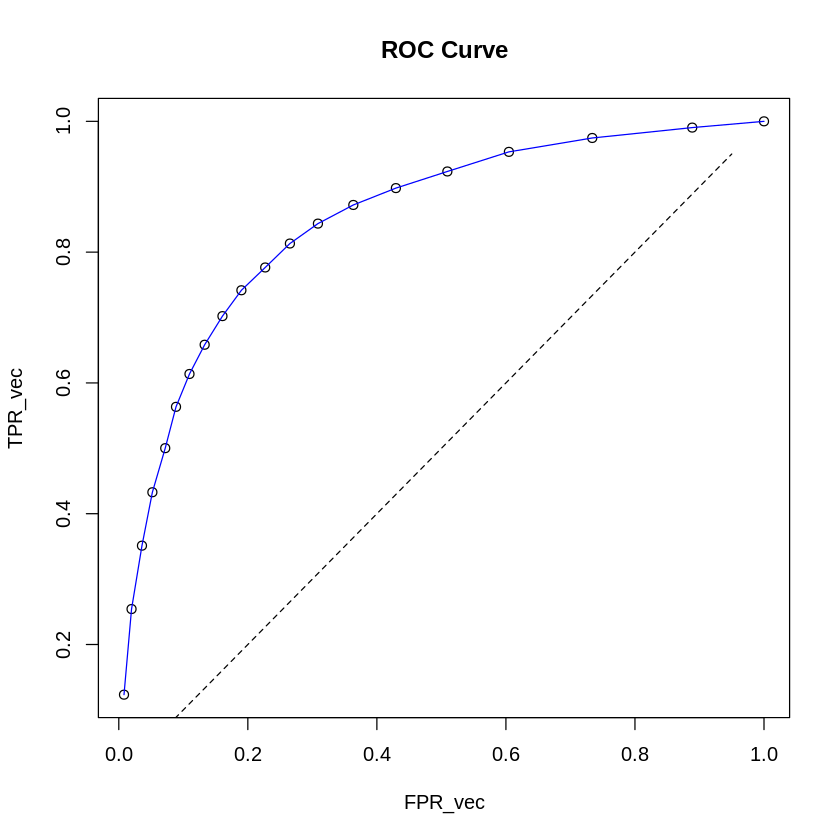

In [ ]:
# 4. PLOT OF ROC CURVE 
plot(FPR_vec,TPR_vec)

lines(FPR_vec,TPR_vec,col="blue")

lines(thresholds,thresholds,lty=2)

title("ROC Curve")

######  6.1.2.3.2.2 PR curve

Since the h1n1 output is really unbalanced, we prefered to plot the PR curve instead of the ROC curve.
  
1. Create the ANN model based on the train_set </br>


2. Predict the values of h1n1_vaccine on the val_set </br>


3. For threshold in range (0,0.99,0.05) 
 
  A. Compute Y_hat depending on the threshold
  
  B.  Compute the Precision (TP/(TP+FN))  and the Sensitivity (TPR=TP/(TP+FP)) 
     
  C.  Add Precision to Precision_vec and Sensitivity to Sensitivity_vec 
         


4. Plot y=Precision_vec  x=Sensitivity_vec


In [ ]:
# Range of thresholds

thresholds <- seq(0,0.99,0.05)

# Creation of Precision_vec and Sensitivity_vec

Precision_vec <- c()
Sensitivity_vec <- c()


                            # 1. CREATION OF NN BASED ON THE TRAIN_SET

model <- nnet(seasonal~., data=train_set, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)


                            # 2. PREDICTION OF H1N1_VACCINE ON THE VAL_SET

Y_pred<- predict(model,val_features)


                            # 3. FOR THRESHOLD IN THRESHOLDS

for(threshold in thresholds)
{
   
   # A. Compute Y_hat based on the threshold
    
   Y_hat <- ifelse(Y_pred[,1] > threshold,"1","0") 
    
   # B. Compute the Sensitivity and the Precision 
    
   confusion_matrix <- table(Y_hat,val_Y[,1])
    
   if(dim(confusion_matrix)[1] < 2)
   { 
       if(rownames(confusion_matrix) == "0")
       {
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           
           rownames(confusion_matrix)[2] <- "1"
       }
       if(rownames(confusion_matrix) == "1")
       {
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           
           rownames(confusion_matrix)[1] <- "0"
       }
   }
    
   TP <- confusion_matrix[2,2] 
    
   FN <- confusion_matrix[1,2] 
    
   FP <- confusion_matrix[2,1]
   
  
   # C. Add precision and sensitivity to their vectors
    
   Precision_vec <- c(Precision_vec,TP/(TP+FN))
    
   Sensitivity_vec <- c(Sensitivity_vec,TP/(TP+FP))
}
    

# weights:  143
initial  value 3392.982439 
iter  10 value 2533.518128
iter  20 value 2359.577051
iter  30 value 2230.662256
iter  40 value 2153.237058
iter  50 value 2103.509631
iter  60 value 2068.335689
iter  70 value 2046.614406
iter  80 value 2039.270521
iter  90 value 2036.443869
iter 100 value 2034.037154
iter 110 value 2031.518969
iter 120 value 2029.755085
iter 130 value 2028.502670
iter 140 value 2027.207022
iter 150 value 2026.783808
iter 160 value 2026.752233
iter 170 value 2026.702615
iter 180 value 2026.687287
iter 180 value 2026.687273
iter 180 value 2026.687273
final  value 2026.687273 
converged


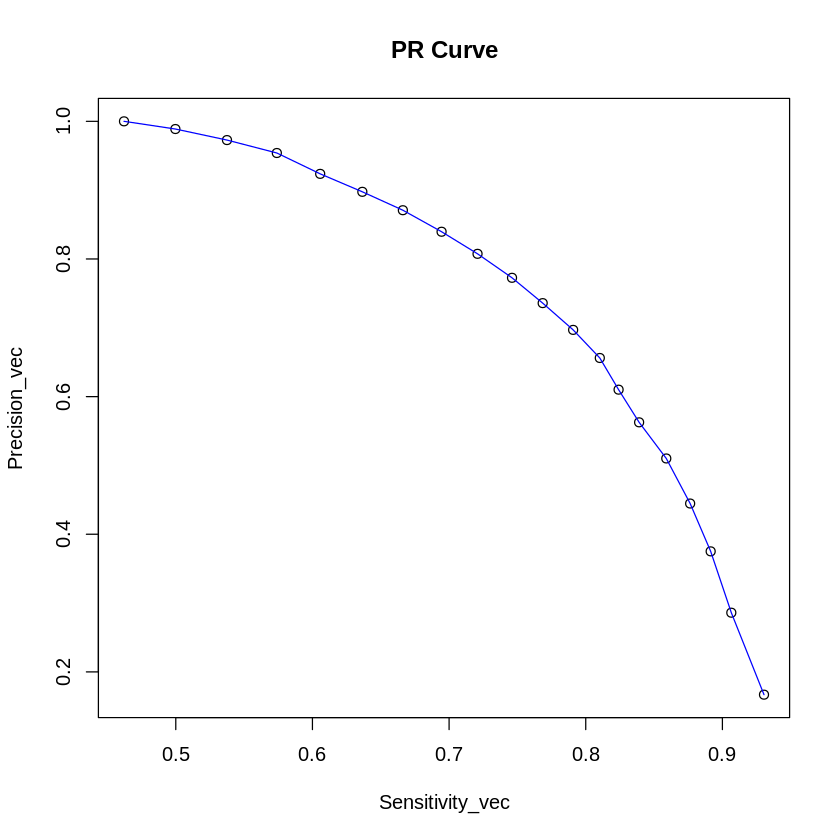

In [ ]:
 # 4. PLOT OF ROC CURVE 
plot(Sensitivity_vec,Precision_vec)

lines(Sensitivity_vec,Precision_vec,col="blue")

title("PR Curve")

### 6.1.3 Application to the test_set

In [ ]:
training_set_h1n1<-cbind(X_PCA_train_h1n1,h1n1=df_train_labels[,2])

training_set_seasonal<-cbind(X_PCA_train_seasonal,seasonal=df_train_labels[,3])

In [ ]:
# Visualization of different sets
head(training_set_h1n1)
head(X_PCA_test_h1n1)
head(training_set_seasonal)
head(X_PCA_test_seasonal)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,h1n1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-0.20328269,-0.06894103,-0.155777845,0.25242657,-0.06971625,0.1948388,0.05142186,-0.2856737,0.3380586,0
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,-0.01714583,0.15873955,-0.060636987,-0.13854293,-0.45340568,-0.5577081,-0.39491714,-0.6926476,0.3863742,0
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,-0.06738864,-0.21523263,0.062686805,-0.02090873,-0.30554022,-0.5626234,0.44451689,0.3142176,-0.2839355,0
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,0.70154282,-0.00458771,0.005408905,0.33790379,-0.55334451,0.3501466,-0.16343472,-0.3004997,-0.4156425,0
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-0.24879090,-0.05578605,-0.140938571,0.18720007,0.27190670,-0.1457682,-0.60041833,-0.4915466,-0.3452240,0
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,-0.07583087,-0.69276474,-0.374838617,-0.50510968,-0.29317742,0.1127710,-0.31550671,0.7410943,-0.3106621,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.004447549,0.5093997,0.6412036,-2.2582454,0.62746735,0.570591658,1.0996816,0.275111274,-0.8313661,-0.8098140,⋯,0.008647237,0.03902064,0.00558088,-0.40049850,0.29364353,0.1162872,0.3529866,-0.06992486,-0.03174422,0.03180003
2,2.237417571,-1.4095789,1.7886779,-1.0373440,0.45609442,-0.335920592,-0.6962013,0.002419384,0.9597222,0.1185543,⋯,0.057031082,-0.03180180,0.21753375,0.08537928,-0.10978806,-0.3774484,0.2310139,-0.02676143,0.27672619,-0.18360765
3,-0.787460877,1.8195859,-0.1420523,-0.6845134,-0.06110708,-0.477649997,-0.7774399,-1.234074463,-1.6506156,0.2161288,⋯,-0.073473152,-0.38504769,-0.17928328,0.24052740,-0.54717372,0.1591852,-0.1995261,0.04962458,-0.10899500,0.04453355
4,0.453846377,-1.0018149,-1.6756657,1.9788968,-0.71049711,0.001069321,-1.3238366,0.207744062,1.1483900,1.1265404,⋯,-0.035067213,-0.26452695,-0.35471978,0.45364148,-0.58158842,0.1970665,0.1803231,-0.25207423,-0.09661076,0.04525079
5,-1.433494638,1.3740700,1.8916325,0.4302602,0.24585164,0.563613480,0.3060152,-0.051895672,-0.1381700,0.8649201,⋯,0.382277707,0.11678955,-0.10942428,0.12766279,-0.08848933,0.3391955,-0.3968616,0.39414196,0.22047392,-0.08124763
6,-0.279204385,1.4439452,0.4893557,-0.5035121,1.01792579,1.089399429,1.0949642,0.467268410,-1.2390252,0.7216937,⋯,0.068244872,0.37931013,0.22408238,-0.19756895,0.09599775,-0.1488288,0.4597797,-0.19617123,-0.54604758,-0.11082627


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,seasonal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.06629965,-1.7550439,0.4560516,0.9145156,-0.2640433,0.1101078,0.35869539,0.0431124,-1.0503986,1.69043403,⋯,-0.20328269,-0.06894103,-0.155777845,0.25242657,-0.06971625,0.1948388,0.05142186,-0.2856737,0.3380586,0
2,-0.80338720,0.8410260,1.5955201,0.4328438,0.9820705,-0.2434999,0.04777638,-0.2529840,-0.8073817,-0.58701177,⋯,-0.01714583,0.15873955,-0.060636987,-0.13854293,-0.45340568,-0.5577081,-0.39491714,-0.6926476,0.3863742,1
3,1.79275735,-0.7849731,0.7524981,-0.5136917,0.5867261,0.2213132,-1.23537531,0.1562227,0.7616754,-0.23652061,⋯,-0.06738864,-0.21523263,0.062686805,-0.02090873,-0.30554022,-0.5626234,0.44451689,0.3142176,-0.2839355,0
4,-1.06989841,-1.8832755,-0.4370498,0.5137934,1.3054953,0.1281215,-0.23215137,-0.3096432,-0.1766521,0.09596213,⋯,0.70154282,-0.00458771,0.005408905,0.33790379,-0.55334451,0.3501466,-0.16343472,-0.3004997,-0.4156425,1
5,-0.30173264,1.3855316,0.5056804,0.2811942,-0.8308256,0.2205921,0.18201506,-0.8585494,-0.1945536,0.84993288,⋯,-0.24879090,-0.05578605,-0.140938571,0.18720007,0.27190670,-0.1457682,-0.60041833,-0.4915466,-0.3452240,0
6,0.36367065,0.5304617,-0.2934658,-0.5808671,0.7630276,-0.1669274,-0.71485088,-0.9336654,0.0972056,-1.52332101,⋯,-0.07583087,-0.69276474,-0.374838617,-0.50510968,-0.29317742,0.1127710,-0.31550671,0.7410943,-0.3106621,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.004447549,0.5093997,0.6412036,-2.2582454,0.62746735,0.570591658,1.0996816,0.275111274,-0.8313661,-0.8098140,⋯,0.008647237,0.03902064,0.00558088,-0.40049850,0.29364353,0.1162872,0.3529866,-0.06992486,-0.03174422,0.03180003
2,2.237417571,-1.4095789,1.7886779,-1.0373440,0.45609442,-0.335920592,-0.6962013,0.002419384,0.9597222,0.1185543,⋯,0.057031082,-0.03180180,0.21753375,0.08537928,-0.10978806,-0.3774484,0.2310139,-0.02676143,0.27672619,-0.18360765
3,-0.787460877,1.8195859,-0.1420523,-0.6845134,-0.06110708,-0.477649997,-0.7774399,-1.234074463,-1.6506156,0.2161288,⋯,-0.073473152,-0.38504769,-0.17928328,0.24052740,-0.54717372,0.1591852,-0.1995261,0.04962458,-0.10899500,0.04453355
4,0.453846377,-1.0018149,-1.6756657,1.9788968,-0.71049711,0.001069321,-1.3238366,0.207744062,1.1483900,1.1265404,⋯,-0.035067213,-0.26452695,-0.35471978,0.45364148,-0.58158842,0.1970665,0.1803231,-0.25207423,-0.09661076,0.04525079
5,-1.433494638,1.3740700,1.8916325,0.4302602,0.24585164,0.563613480,0.3060152,-0.051895672,-0.1381700,0.8649201,⋯,0.382277707,0.11678955,-0.10942428,0.12766279,-0.08848933,0.3391955,-0.3968616,0.39414196,0.22047392,-0.08124763
6,-0.279204385,1.4439452,0.4893557,-0.5035121,1.01792579,1.089399429,1.0949642,0.467268410,-1.2390252,0.7216937,⋯,0.068244872,0.37931013,0.22408238,-0.19756895,0.09599775,-0.1488288,0.4597797,-0.19617123,-0.54604758,-0.11082627


- Creation of the model based on the df_PCA_train_h1n1  (training)
- Creation of the model based on the df_PCA_train_seasonal (training)

In [ ]:
model_h1n1<-nnet(h1n1~., data=training_set_h1n1, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)
model_seasonal<-nnet(seasonal~., data=training_set_seasonal, size=1 , linout=FALSE, skip=TRUE,   maxit=1000, decay=0.001)

# weights:  143
initial  value 9030.347881 
iter  10 value 5621.688666
iter  20 value 5267.009070
iter  30 value 5187.277655
iter  40 value 5104.305500
iter  50 value 4910.613949
iter  60 value 4751.110634
iter  70 value 4657.935157
iter  80 value 4600.006647
iter  90 value 4506.753208
iter 100 value 4452.575903
iter 110 value 4408.603493
iter 120 value 4371.992796
iter 130 value 4335.371171
iter 140 value 4283.984556
iter 150 value 4241.808688
iter 160 value 4225.836233
iter 170 value 4190.258209
iter 180 value 4117.508365
iter 190 value 3821.918326
iter 200 value 3408.856038
iter 210 value 3236.452416
iter 220 value 3169.289754
iter 230 value 3141.604333
iter 240 value 3137.376192
iter 250 value 3137.057906
iter 260 value 3136.598086
iter 270 value 3135.716345
iter 280 value 3133.898073
iter 290 value 3131.288598
iter 300 value 3129.057475
iter 310 value 3128.762015
iter 320 value 3128.446455
iter 330 value 3127.950321
iter 340 value 3127.422349
iter 350 value 3126.863387
iter 360 va

- h1n1_vaccine predictions using df_PCA_test_h1n1
- seasonal_vaccine predictions using df_PCA_test_seasonal


In [ ]:
Y_pred_h1n1<-predict(model_h1n1,X_PCA_test_h1n1)
Y_pred_seasonal<-predict(model_seasonal,X_PCA_test_seasonal)
head(Y_pred_h1n1)
head(Y_pred_seasonal)

1,0.42666237
2,0.10117202
3,0.12733840
4,0.15690411
5,0.01237873
6,0.70647211


1,0.3303181
2,0.2987895
3,0.9449828
4,0.7930189
5,0.4108910
6,0.7545931


- Creation of csv file to submit

In [ ]:
res<-cbind("respondent_id"=id_test,"h1n1_vaccine"=1-Y_pred_h1n1,"seasonal_vaccine"=1-Y_pred_seasonal)
res<-data.frame(res)
colnames(res)<-c("respondent_id","h1n1_vaccine","seasonal_vaccine")
write.csv(res, "submission_Neural_Network_PCA.csv", row.names=FALSE)


In [ ]:
res

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<dbl>,<dbl>,<dbl>
1,26707,0.57333763,0.669681934
2,26708,0.89882798,0.701210549
3,26709,0.87266160,0.055017162
4,26710,0.84309589,0.206981084
5,26711,0.98762127,0.589109019
6,26712,0.29352789,0.245406871
7,26713,0.41966665,0.274744363
8,26714,0.87857972,0.676907394
9,26715,0.93767459,0.588333977


# Conclusions

---
For this project, a multilabel (label 1 = H1N1 VACCINE, label 2 = SEASONAL VACCINE) question concerning the prediction of the: <a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/"> "Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines" </a>, We first of all took a time to understand the different dataset available and also the questions about the project.

After, we started working by doing some data prepocessing though features engineering and features selections. In addition, we did some work on solving the missing values present by using the onehot principle and the mice package. Those two ways of dealing with missing values had enabled us to build two different kind of dataset on which we applied our model to better train them.

As for the job of prediction with the model, we apply separately the model on each label to find the probility for the specified label, then we build the submission table as speficified by the project by just putting in a table the result for each label.

Moreover, we used more than 04 models, for instance random forest, NN, Decision Trees, SVM, MLP, but the model having the best AUC value was the NN with a AUC value of **0.8468**.

--------
<h4>
  <center> 
    <b>Information about the model AUC result on the test set </b>
  </center>
  <table border="2">
    <tr>
      <th>Model </th><th>AUC result</th>
    </tr>
    <tr>
      <td><b>NN</b></td><td> <b>0.8468 </b></td>
    </tr>
    <tr>
      <td>MLP</td><td>0.8323</td>
    </tr>
    <tr>
      <td>Random Forest</td><td>0.8272</td>
    </tr>
    
  </table>
</h4>



---